# Calculation of Coupling Coefficients

In [2]:
%load_ext autoreload
%autoreload 2
# provide cell timings
%load_ext autotime
from qdef import *
%config Completer.use_jedi = False
import sympy as sp
# sp.init_session(quiet=True)
from itertools import product
import re
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

Reloading /Volumes/GoogleDrive/My Drive/Zia Lab/Codebase/qdef/data/CPGs.pkl ...


In [ ]:
counter = 0
for glabel in CPGs.all_group_labels:
    group = CPGs.get_group_by_label(glabel)
    num_irreps = len(group.irrep_labels)
    not_1d = num_irreps - list(group.irrep_dims.values()).count(1)
    if not_1d >= 1:
        print(glabel)
        printout = list(zip(group.irrep_labels, group.irrep_dims.values()))
        display(sp.Matrix(printout).T)
        counter += 1
print('%d/32' % counter)

In [3]:
# [glabel for glabel in CPGs.all_group_labels for glabel in CPGs.all_group_labels]


In [ ]:
for group_label in CPGs.all_group_labels:
    print(group_label)
    display(l_splitter(group_label,2).as_ket())

Given a point symmetry group and function bases $\phi(\Gamma_1 \gamma_i)$ and $\phi(\Gamma_2 \gamma_j)$ for two of its irreducible representations $\Gamma_1$ and $\Gamma_2$, the space of product functions that may be spanned with these two bases can be decomposed into a direct sum of subspaces each of which belongs to one of the irreducible representions obtained from the decomposition of the product $\Gamma_1 \otimes \Gamma_2$ into a direct sum $\Gamma_1 \otimes \Gamma_2 = \sum_j \Gamma_{3,j}$.

$\Psi(\Gamma_3 \gamma_3) = \sum_{\gamma_1, \gamma_2} \langle \Gamma_1\gamma_1 \Gamma_2\gamma_2 | \Gamma _3\gamma_3 \rangle \phi(\Gamma_1 \gamma_1) \phi(\Gamma_2 \gamma_2)$ with $(\Gamma_3, \gamma_3)$ one of the $(\Gamma_{3,j},\gamma_{3,j})$. 

These will be linear combinations of the simple products.

In other words, a new set of function bases may be created from the original ones, such that they transform as one of the irreducible representations ${\Gamma}_{3,j}$ contained in $\Gamma_1 \otimes \Gamma_2$.

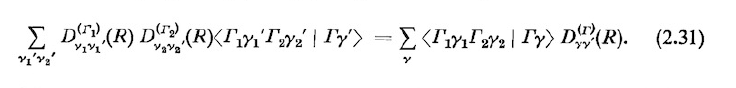

The Clebsch-Gordan coefficients are constrained by a set of linear constraints and a unitarity restriction.

The linear constraints are:

\begin{equation}
\sum_{\gamma_1', \gamma_2'} D_{\gamma_1 \gamma_1'}^{(\Gamma_1)}(R)\,D_{\gamma_2 \gamma_2'}^{(\Gamma_2)}(R) \langle \Gamma_1 \gamma_1' \Gamma_2 \gamma_2' | \Gamma_3 \gamma_3' \rangle = \sum_{\gamma_3} \langle \Gamma_1 \gamma_1 \Gamma_2 \gamma_2 | \Gamma_3 \gamma_3 \rangle D_{\gamma_3 \gamma_3'}^{(\Gamma_3)} \left(R\right) \,\,\,\,\textrm{(TSK 2.31)}
\end{equation}

Where each individual constraint is determined by a combination of $(R, \gamma_1(R), \gamma_2(R), \Gamma_3, \gamma_3'(R))$, where $R$ equals one of the group's generating elements (if other group elements are used, they provide redundant constraints).

The unitarity constraints are:

\begin{align}
\sum_{\gamma_1\gamma_2} \langle \Gamma_3 \gamma_3 | \Gamma_1 \gamma_1 \Gamma_2 \gamma_2 \rangle \langle \Gamma_1 \gamma_1 \Gamma_2 \gamma_2 | \Gamma_3' \gamma_3' \rangle &= \delta(\Gamma_3 \Gamma_3') \delta(\gamma_3 \gamma_3') \,\,\,\,\textrm{(TSK 2.28)}\\ 
\sum_{\Gamma_3 \gamma_3} \langle \Gamma_1 \gamma_1 \Gamma_2 \gamma_2 | \Gamma_3 \gamma_3 \rangle \langle \Gamma_3 \gamma_3 | \Gamma_1 \gamma_1' \Gamma_2 \gamma_2' \rangle &= \delta(\gamma_1\gamma_1')\delta(\gamma_2\gamma_2') \,\,\,\,\textrm{(TSK 2.29)}
\end{align}

Furthermore, one may also impose the condition that the coupling coefficients should be real.

These constraints, however, do not uniquely determine the coefficients. As one may see that for a given $\Gamma_1,\Gamma_2$ one may multiply all its related coefficients (i.e. for all components and for all $\Gamma_3'$) by a set of factors $N(\Gamma_1,\Gamma_2,\Gamma_3')$ and still preserve all the necessary constraints provided $N(\Gamma_1,\Gamma_2,\Gamma_3')^2 = 1$.

A more verbose expression of the coupling coefficients, which emphasizes the fact that $\Gamma_3$ may come from the reduction of $\Gamma_1\otimes\Gamma_2$ includes $\Gamma_1$ and $\Gamma_2$ in the right hand side of the braket like so: $\langle \Gamma_1\gamma_1 \Gamma_2\gamma_2 | \Gamma_1\Gamma_2\Gamma _3\gamma_3 \rangle$. One may also reorganize the irreducible representation symbols in the bra, so that one has $\langle \Gamma_1 \Gamma_2 \gamma_1 \gamma_2 | \Gamma_1\Gamma_2\Gamma _3\gamma_3 \rangle$.

Using this notation one defines the V coefficients (see Griffith (1962) eqn. 2.7) as

$V\binom{\Gamma_1 \Gamma_2 \Gamma_3}{\gamma_1 \gamma_2 \gamma_3} := \frac{1}{\sqrt{|\Gamma_3|}} \langle \Gamma_1 \Gamma_2 \gamma_1 \gamma_2 | \Gamma_1\Gamma_2\Gamma _3\gamma_3 \rangle$.

In terms of these, it may be shown on very general grounds, that for a given triple of irreducible representations $(\Gamma_1, \Gamma_2, \Gamma_3)$ that any permutation of the columns in its related V coefficients, may either remain equal (in which case it is called even) or may change occoding to the sign of the permutation (in which case it is called odd). To accomplish this a judicious choice of the $N(\Gamma_1,\Gamma_2,\Gamma_3)$ is necessary.

Note that some permutations will result in initially non-sensical combinations of $(\Gamma_1, \Gamma_2, \Gamma_3)$, in the sense that $\Gamma_3$ may not be in $\Gamma_1 \otimes \Gamma_2$. Whenever this occurs, the coupling coefficients are defined as zero.


In [15]:
group = CPGs.get_group_by_label('O')

In [16]:
irrep_combo = tuple(list(map(sp.Symbol, ['E','T_2','T_2'])))

In [17]:
all_components = [group.component_labels[ir] for ir in irrep_combo]

In [10]:
all_symbols = []
for component_combo in (product(*all_components)):
    all_symbols.extend(permutations(list(zip(*[irrep_combo,component_combo]))))
all_symbols = list(set(all_symbols))

In [14]:
for combo in all_symbols:
    top = ','.join([sp.latex(combo[0][0]), sp.latex(combo[1][0]), sp.latex(combo[2][0])])
    bottom = ','.join([sp.latex(combo[0][1]), sp.latex(combo[1][1]), sp.latex(combo[2][1])])
    display(Math(r'V\binom{%s}{%s}' % (top, bottom)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Symmetric V coefficients

### All groups (use after adding to qdef.py)

In [18]:
os.system('say "group %s" &' % group_label)

NameError: name 'group_label' is not defined

In [161]:
godly_Vs = {}
verbose = True
success = OrderedDict()
initial_bad_ones = OrderedDict()
final_bad_ones = OrderedDict()
for group_label in CPGs.all_group_labels:
    # if group_label != 'O':
    #     continue
    print(group_label)
#     os.system('say "group %s"&' % group_label)
    group = CPGs.get_group_by_label(group_label)
    if verbose: print("Initializing all V coefficients to zero ...")
    V_coeff_original = {}
    for irrep_symbols in product(*[group.irrep_labels]*3):
        component_symbols = [group.component_labels[ir] for ir in irrep_symbols]
        for comp_symbs in product(*component_symbols):
            V_coeff_original[tuple(irrep_symbols)+tuple(comp_symbs)] = 0
    if verbose: print("Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...")
    for k, v in group.CG_coefficients_partitioned.items():
        # they outer keys correspond to the first two slots
        for cg_k, cg_v in v.items():
            # the inner keys correspond to the last three slots
            # the third slot needs to be determined as the irrep to 
            # which the last component belongs to
            the_third = [ir_label for ir_label in group.irrep_labels if cg_k[-1] in group.component_labels[ir_label]]
            assert len(the_third) == 1
            the_third = the_third[0]
            V_arg = tuple(tuple(k) + (the_third,) + tuple(cg_k))
            V_coeff_original[V_arg] = sp.S(1)/sp.sqrt(group.irrep_dims[V_arg[2]])*cg_v


    Vg = V_coefficients.V_fixer(V_coeff_original, {}, group, verbose=verbose)
    combo_types = Vg['combo_types']
    all_permutation_comparisons = Vg['all_permutation_comparisons']
    even_ones = [k for k,v in combo_types.items() if v == 'even']
    singular_ones = [k for k,v in combo_types.items() if v == 'singular']
    odd_ones = [k for k,v in combo_types.items() if v == 'odd']
    faulty_ones = [k for k,v in combo_types.items() if v == 'neither']
    initial_bad_ones[group_label] = len(faulty_ones)
    
    if verbose:
        print("\n EVEN:")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
        print("\n ODD:")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
        print("\n NEITHER")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], faulty_ones))).T)

    if len(faulty_ones) != 0:
#         !say "Asymmetries found."
        if verbose: print("\nWorking out heuristic solution ...")

        # Run through the comparisons and collect the signs of 
        even_crypts = {}
        for k, v in all_permutation_comparisons['even'].items():
            head = tuple(k[:3])
            if head in faulty_ones:
                if  head not in even_crypts.values():
                    even_crypts[head] = []
                for item in v:
                    setvals = list(set(item.values()))
                    if len(setvals) == 1 and setvals[0] == 0:
                        continue
                    the_signs = [(k0[:3], sp.sign(v0)) for k0,v0 in item.items()]
                    even_crypts[head].append(the_signs)
        odd_crypts = {}
        for k, v in all_permutation_comparisons['odd'].items():
            head = tuple(k[:3])
            if head in faulty_ones:
                if  head not in odd_crypts.values():
                    odd_crypts[head] = []
                for item in v:
                    setvals = list(set(item.values()))
                    if len(setvals) == 1 and setvals[0] == 0:
                        continue
                    the_signs = [(k0[:3], sp.sign(v0)) for k0,v0 in item.items()]
                    odd_crypts[head].append(the_signs)

        if verbose: print("Setting up even and odd fixes...")
        problem_fixes = {'odd_fix':{}, 'even_fix':{}}
        for problem in faulty_ones:
            if problem in odd_crypts.keys():
                if len(odd_crypts[problem])>0:
                    odd_solution = odd_crypts[problem][0]
                    problem_fixes['odd_fix'].update(dict(odd_solution))
            if problem in even_crypts.keys():
                if len(even_crypts[problem])>0:
                    even_solution = even_crypts[problem][0]
                    problem_fixes['even_fix'].update(dict(even_solution))

        problems_solved = {}

        for solution_type, sign_changes in problem_fixes.items():
            if verbose: print("\nTrying out solution type: %s" % solution_type)
            Vg = V_coefficients.V_fixer(V_coeff_original, sign_changes, group, verbose=verbose)
            combo_types = Vg['combo_types']
            all_permutation_comparisons = Vg['all_permutation_comparisons']
            even_ones = [k for k,v in combo_types.items() if v == 'even']
            singular_ones = [k for k,v in combo_types.items() if v == 'singular']
            odd_ones = [k for k,v in combo_types.items() if v == 'odd']
            neither_ones = [k for k,v in combo_types.items() if v == 'neither']
            if verbose:
                print("\n EVEN:")
                display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
                print("\n ODD:")
                display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
                print("\n NEITHER")
                display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], neither_ones))).T)
            problems_solved[solution_type] = neither_ones

        unsolved = reduce(lambda x,y: set(x).intersection(set(y)), problems_solved.values())
        if len(unsolved) == 0:
#             !say "All asymmetries resolved."
            pass

        if verbose: print("\nCalculating end solution for sign changes.")
        final_solution = {}
        solved = []
        for problem in faulty_ones:
            for solution_type, solutions in problems_solved.items():
                if problem in solutions:
                    if problem not in solved:
                        good_reps = {k:v for k,v in problem_fixes[solution_type].items() if k in permutations(problem)}
                        final_solution.update(good_reps)
                        solved.append(problem)
    else:
#         !say "No asymmetries found."
        final_solution = {}
    Vg = V_coefficients.V_fixer(V_coeff_original, final_solution, group)
    combo_types = Vg['combo_types']
    all_permutation_comparisons = Vg['all_permutation_comparisons']
    even_ones = [k for k,v in combo_types.items() if v == 'even']
    singular_ones = [k for k,v in combo_types.items() if v == 'singular']
    odd_ones = [k for k,v in combo_types.items() if v == 'odd']
    neither_ones = [k for k,v in combo_types.items() if v == 'neither']
    final_bad_ones[group_label] = len(neither_ones)
    if len(neither_ones) == 0:
        success[group_label] = True
    else:
        success[group_label] = False
    if verbose:
        print("\n EVEN:")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
        print("\n ODD:")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
        print("\n NEITHER")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], neither_ones))).T)
    godly_Vs[group_label] = Vg

C_{1}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A**3]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix(0, 0, [])


 EVEN:


Matrix([[A**3]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix(0, 0, [])

C_{i}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{g}**3, A_{g}*A_{u}**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix(0, 0, [])


 EVEN:


Matrix([[A_{g}**3, A_{g}*A_{u}**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix(0, 0, [])

C_{2}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A**3, A*B**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix(0, 0, [])


 EVEN:


Matrix([[A**3, A*B**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix(0, 0, [])

C_{s}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A^'**3, A^'*A^{{''}}**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix(0, 0, [])


 EVEN:


Matrix([[A^'**3, A^'*A^{{''}}**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix(0, 0, [])

C_{2h}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{g}**3, A_{g}*B_{u}**2, A_{g}*A_{u}**2, A_{g}*B_{g}**2, A_{u}*B_{g}*B_{u}]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix(0, 0, [])


 EVEN:


Matrix([[A_{g}**3, A_{g}*B_{u}**2, A_{g}*A_{u}**2, A_{g}*B_{g}**2, A_{u}*B_{g}*B_{u}]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix(0, 0, [])

D_{2}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*B_1**2, A_1*B_2**2, A_1*B_3**2, B_1*B_2*B_3]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix(0, 0, [])


 EVEN:


Matrix([[A_1**3, A_1*B_1**2, A_1*B_2**2, A_1*B_3**2, B_1*B_2*B_3]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix(0, 0, [])

C_{2v}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*B_2**2, A_1*B_1**2, A_1*A_2**2, A_2*B_1*B_2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix(0, 0, [])


 EVEN:


Matrix([[A_1**3, A_1*B_2**2, A_1*B_1**2, A_1*A_2**2, A_2*B_1*B_2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix(0, 0, [])

D_{2h}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{{1g}}**3, A_{{1g}}*B_{{3u}}**2, A_{{1g}}*B_{{1u}}**2, A_{{1g}}*B_{{2u}}**2, A_{{1g}}*A_{{1u}}**2, A_{{1g}}*B_{{3g}}**2, A_{{1g}}*B_{{1g}}**2, A_{{1g}}*B_{{2g}}**2, B_{{1u}}*B_{{2g}}*B_{{3u}}, B_{{1g}}*B_{{2u}}*B_{{3u}}, A_{{1u}}*B_{{3g}}*B_{{3u}}, B_{{1u}}*B_{{2u}}*B_{{3g}}, A_{{1u}}*B_{{1g}}*B_{{1u}}, A_{{1u}}*B_{{2g}}*B_{{2u}}, B_{{1g}}*B_{{2g}}*B_{{3g}}]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix(0, 0, [])


 EVEN:


Matrix([[A_{{1g}}**3, A_{{1g}}*B_{{3u}}**2, A_{{1g}}*B_{{1u}}**2, A_{{1g}}*B_{{2u}}**2, A_{{1g}}*A_{{1u}}**2, A_{{1g}}*B_{{3g}}**2, A_{{1g}}*B_{{1g}}**2, A_{{1g}}*B_{{2g}}**2, B_{{1u}}*B_{{2g}}*B_{{3u}}, B_{{1g}}*B_{{2u}}*B_{{3u}}, A_{{1u}}*B_{{3g}}*B_{{3u}}, B_{{1u}}*B_{{2u}}*B_{{3g}}, A_{{1u}}*B_{{1g}}*B_{{1u}}, A_{{1u}}*B_{{2g}}*B_{{2u}}, B_{{1g}}*B_{{2g}}*B_{{3g}}]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix(0, 0, [])

C_{4}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A**3, A*B**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^1**2, A*E^1*E^2, A*E^2**2, B*E^1**2, B*E^1*E^2, B*E^2**2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A**3, A*B**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^1**2, A*E^1*E^2, A*E^2**2, B*E^1**2, B*E^1*E^2, B*E^2**2]])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A**3, A*B**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^1**2, A*E^1*E^2, A*E^2**2, B*E^1**2, B*E^1*E^2, B*E^2**2]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A**3, A*B**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^1**2, A*E^1*E^2, A*E^2**2, B*E^1**2, B*E^1*E^2, B*E^2**2]])

S_{4}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A**3, A*B**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^1**2, A*E^1*E^2, A*E^2**2, B*E^1**2, B*E^1*E^2, B*E^2**2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A**3, A*B**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^1**2, A*E^1*E^2, A*E^2**2, B*E^1**2, B*E^1*E^2, B*E^2**2]])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A**3, A*B**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^1**2, A*E^1*E^2, A*E^2**2, B*E^1**2, B*E^1*E^2, B*E^2**2]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A**3, A*B**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^1**2, A*E^1*E^2, A*E^2**2, B*E^1**2, B*E^1*E^2, B*E^2**2]])

C_{4h}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[\Gamma^1**3, \Gamma^1*\Gamma^4**2, \Gamma^1*\Gamma^5**2, \Gamma^1*\Gamma^8**2, \Gamma^4*\Gamma^5*\Gamma^8]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[\Gamma^1*\Gamma^2**2, \Gamma^1*\Gamma^2*\Gamma^3, \Gamma^1*\Gamma^3**2, \Gamma^1*\Gamma^6**2, \Gamma^1*\Gamma^6*\Gamma^7, \Gamma^1*\Gamma^7**2, \Gamma^2**2*\Gamma^8, \Gamma^2*\Gamma^3*\Gamma^8, \Gamma^2*\Gamma^4*\Gamma^6, \Gamma^2*\Gamma^4*\Gamma^7, \Gamma^2*\Gamma^5*\Gamma^6, \Gamma^2*\Gamma^5*\Gamma^7, \Gamma^3**2*\Gamma^8, \Gamma^3*\Gamma^4*\Gamma^6, \Gamma^3*\Gamma^4*\Gamma^7, \Gamma^3*\Gamma^5*\Gamma^6, \Gamma^3*\Gamma^5*\Gamma^7, \Gamma^6**2*\Gamma^8, \Gamma^6*\Gamma^7*\Gamma^8, \Gamma^7**2*\Gamma^8]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[\Gamma^1**3, \Gamma^1*\Gamma^4**2, \Gamma^1*\Gamma^5**2, \Gamma^1*\Gamma^8**2, \Gamma^4*\Gamma^5*\Gamma^8]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[\Gamma^1*\Gamma^2**2, \Gamma^1*\Gamma^2*\Gamma^3, \Gamma^1*\Gamma^3**2, \Gamma^1*\Gamma^6**2, \Gamma^1*\Gamma^6*\Gamma^7, \Gamma^1*\Gamma^7**2, \Gamma^2**2*\Gamma^8, \Gamma^2*\Gamma^3*\Gamma^8, \Gamma^2*\Gamma^4*\Gamma^6, \Gamma^2*\Gamma^4*\Gamma^7, \Gamma^2*\Gamma^5*\Gamma^6, \Gamma^2*\Gamma^5*\Gamma^7, \Gamma^3**2*\Gamma^8, \Gamma^3*\Gamma^4*\Gamma^6, \Gamma^3*\Gamma^4*\Gamma^7, \Gamma^3*\Gamma^5*\Gamma^6, \Gamma^3*\Gamma^5*\Gamma^7, \Gamma^6**2*\Gamma^8, \Gamma^6*\Gamma^7*\Gamma^8, \Gamma^7**2*\Gamma^8]])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[\Gamma^1**3, \Gamma^1*\Gamma^4**2, \Gamma^1*\Gamma^5**2, \Gamma^1*\Gamma^8**2, \Gamma^4*\Gamma^5*\Gamma^8]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[\Gamma^1*\Gamma^2**2, \Gamma^1*\Gamma^2*\Gamma^3, \Gamma^1*\Gamma^3**2, \Gamma^1*\Gamma^6**2, \Gamma^1*\Gamma^6*\Gamma^7, \Gamma^1*\Gamma^7**2, \Gamma^2**2*\Gamma^8, \Gamma^2*\Gamma^3*\Gamma^8, \Gamma^2*\Gamma^4*\Gamma^6, \Gamma^2*\Gamma^4*\Gamma^7, \Gamma^2*\Gamma^5*\Gamma^6, \Gamma^2*\Gamma^5*\Gamma^7, \Gamma^3**2*\Gamma^8, \Gamma^3*\Gamma^4*\Gamma^6, \Gamma^3*\Gamma^4*\Gamma^7, \Gamma^3*\Gamma^5*\Gamma^6, \Gamma^3*\Gamma^5*\Gamma^7, \Gamma^6**2*\Gamma^8, \Gamma^6*\Gamma^7*\Gamma^8, \Gamma^7**2*\Gamma^8]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[\Gamma^1**3, \Gamma^1*\Gamma^4**2, \Gamma^1*\Gamma^5**2, \Gamma^1*\Gamma^8**2, \Gamma^4*\Gamma^5*\Gamma^8]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[\Gamma^1*\Gamma^2**2, \Gamma^1*\Gamma^2*\Gamma^3, \Gamma^1*\Gamma^3**2, \Gamma^1*\Gamma^6**2, \Gamma^1*\Gamma^6*\Gamma^7, \Gamma^1*\Gamma^7**2, \Gamma^2**2*\Gamma^8, \Gamma^2*\Gamma^3*\Gamma^8, \Gamma^2*\Gamma^4*\Gamma^6, \Gamma^2*\Gamma^4*\Gamma^7, \Gamma^2*\Gamma^5*\Gamma^6, \Gamma^2*\Gamma^5*\Gamma^7, \Gamma^3**2*\Gamma^8, \Gamma^3*\Gamma^4*\Gamma^6, \Gamma^3*\Gamma^4*\Gamma^7, \Gamma^3*\Gamma^5*\Gamma^6, \Gamma^3*\Gamma^5*\Gamma^7, \Gamma^6**2*\Gamma^8, \Gamma^6*\Gamma^7*\Gamma^8, \Gamma^7**2*\Gamma^8]])

D_{4}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*B_2**2, A_1*B_1**2, A_1*E**2, A_2*B_1*B_2, B_2*E**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A_2*E**2, B_1*E**2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*B_2**2, A_1*B_1**2, A_1*E**2, A_2*B_1*B_2, B_2*E**2, B_1*E**2]])


 ODD:


Matrix([[A_2*E**2]])


 NEITHER


Matrix(0, 0, [])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*B_2**2, A_1*B_1**2, A_1*E**2, A_2*B_1*B_2, B_2*E**2]])


 ODD:


Matrix([[A_2*E**2]])


 NEITHER


Matrix([[B_1*E**2]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*B_2**2, A_1*B_1**2, A_1*E**2, A_2*B_1*B_2, B_2*E**2, B_1*E**2]])


 ODD:


Matrix([[A_2*E**2]])


 NEITHER


Matrix(0, 0, [])

C_{4v}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*B_2**2, A_1*B_1**2, A_1*E**2, A_2*B_1*B_2, B_2*E**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A_2*E**2, B_1*E**2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*B_2**2, A_1*B_1**2, A_1*E**2, A_2*B_1*B_2, B_2*E**2, B_1*E**2]])


 ODD:


Matrix([[A_2*E**2]])


 NEITHER


Matrix(0, 0, [])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*B_2**2, A_1*B_1**2, A_1*E**2, A_2*B_1*B_2, B_2*E**2]])


 ODD:


Matrix([[A_2*E**2]])


 NEITHER


Matrix([[B_1*E**2]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*B_2**2, A_1*B_1**2, A_1*E**2, A_2*B_1*B_2, B_2*E**2, B_1*E**2]])


 ODD:


Matrix([[A_2*E**2]])


 NEITHER


Matrix(0, 0, [])

D_{2d}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*B_1**2, A_1*A_2**2, A_1*B_2**2, A_1*E**2, A_2*B_1*B_2, B_1*E**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A_2*E**2, B_2*E**2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*B_1**2, A_1*A_2**2, A_1*B_2**2, A_1*E**2, A_2*B_1*B_2, B_1*E**2, B_2*E**2]])


 ODD:


Matrix([[A_2*E**2]])


 NEITHER


Matrix(0, 0, [])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*B_1**2, A_1*A_2**2, A_1*B_2**2, A_1*E**2, A_2*B_1*B_2, B_1*E**2]])


 ODD:


Matrix([[A_2*E**2]])


 NEITHER


Matrix([[B_2*E**2]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A_1**3, A_1*B_1**2, A_1*A_2**2, A_1*B_2**2, A_1*E**2, A_2*B_1*B_2, B_1*E**2, B_2*E**2]])


 ODD:


Matrix([[A_2*E**2]])


 NEITHER


Matrix(0, 0, [])

D_{4h}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{{1g}}**3, A_{{1g}}*A_{{2g}}**2, A_{{1g}}*B_{{2g}}**2, A_{{1g}}*A_{{2u}}**2, A_{{1g}}*B_{{2u}}**2, A_{{1g}}*B_{{1u}}**2, A_{{1g}}*A_{{1u}}**2, A_{{1g}}*B_{{1g}}**2, A_{{1g}}*E_{u}**2, A_{{1g}}*E_{g}**2, A_{{2g}}*B_{{1g}}*B_{{2g}}, A_{{1u}}*A_{{2g}}*A_{{2u}}, A_{{2g}}*B_{{1u}}*B_{{2u}}, A_{{2u}}*B_{{1u}}*B_{{2g}}, A_{{1u}}*B_{{2g}}*B_{{2u}}, B_{{2g}}*E_{u}**2, B_{{2g}}*E_{g}**2, A_{{2u}}*B_{{1g}}*B_{{2u}}, A_{{2u}}*E_{g}*E_{u}, A_{{1u}}*B_{{1g}}*B_{{1u}}, B_{{1u}}*E_{g}*E_{u}]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A_{{2g}}*E_{u}**2, A_{{2g}}*E_{g}**2, B_{{2u}}*E_{g}*E_{u}, A_{{1u}}*E_{g}*E_{u}, B_{{1g}}*E_{u}**2, B_{{1g}}*E_{g}**2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{{1g}}**3, A_{{1g}}*A_{{2g}}**2, A_{{1g}}*B_{{2g}}**2, A_{{1g}}*A_{{2u}}**2, A_{{1g}}*B_{{2u}}**2, A_{{1g}}*B_{{1u}}**2, A_{{1g}}*A_{{1u}}**2, A_{{1g}}*B_{{1g}}**2, A_{{1g}}*E_{u}**2, A_{{1g}}*E_{g}**2, A_{{2g}}*B_{{1g}}*B_{{2g}}, A_{{1u}}*A_{{2g}}*A_{{2u}}, A_{{2g}}*B_{{1u}}*B_{{2u}}, A_{{2u}}*B_{{1u}}*B_{{2g}}, A_{{1u}}*B_{{2g}}*B_{{2u}}, B_{{2g}}*E_{u}**2, B_{{2g}}*E_{g}**2, A_{{2u}}*B_{{1g}}*B_{{2u}}, A_{{2u}}*E_{g}*E_{u}, A_{{1u}}*B_{{1g}}*B_{{1u}}, B_{{1u}}*E_{g}*E_{u}, B_{{1g}}*E_{u}**2, B_{{1g}}*E_{g}**2]])


 ODD:


Matrix([[A_{{2g}}*E_{u}**2, A_{{2g}}*E_{g}**2, B_{{2u}}*E_{g}*E_{u}, A_{{1u}}*E_{g}*E_{u}]])


 NEITHER


Matrix(0, 0, [])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{{1g}}**3, A_{{1g}}*A_{{2g}}**2, A_{{1g}}*B_{{2g}}**2, A_{{1g}}*A_{{2u}}**2, A_{{1g}}*B_{{2u}}**2, A_{{1g}}*B_{{1u}}**2, A_{{1g}}*A_{{1u}}**2, A_{{1g}}*B_{{1g}}**2, A_{{1g}}*E_{u}**2, A_{{1g}}*E_{g}**2, A_{{2g}}*B_{{1g}}*B_{{2g}}, A_{{1u}}*A_{{2g}}*A_{{2u}}, A_{{2g}}*B_{{1u}}*B_{{2u}}, A_{{2u}}*B_{{1u}}*B_{{2g}}, A_{{1u}}*B_{{2g}}*B_{{2u}}, B_{{2g}}*E_{u}**2, B_{{2g}}*E_{g}**2, A_{{2u}}*B_{{1g}}*B_{{2u}}, A_{{2u}}*E_{g}*E_{u}, A_{{1u}}*B_{{1g}}*B_{{1u}}, B_{{1u}}*E_{g}*E_{u}]])


 ODD:


Matrix([[A_{{2g}}*E_{u}**2, A_{{2g}}*E_{g}**2]])


 NEITHER


Matrix([[B_{{2u}}*E_{g}*E_{u}, A_{{1u}}*E_{g}*E_{u}, B_{{1g}}*E_{u}**2, B_{{1g}}*E_{g}**2]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A_{{1g}}**3, A_{{1g}}*A_{{2g}}**2, A_{{1g}}*B_{{2g}}**2, A_{{1g}}*A_{{2u}}**2, A_{{1g}}*B_{{2u}}**2, A_{{1g}}*B_{{1u}}**2, A_{{1g}}*A_{{1u}}**2, A_{{1g}}*B_{{1g}}**2, A_{{1g}}*E_{u}**2, A_{{1g}}*E_{g}**2, A_{{2g}}*B_{{1g}}*B_{{2g}}, A_{{1u}}*A_{{2g}}*A_{{2u}}, A_{{2g}}*B_{{1u}}*B_{{2u}}, A_{{2u}}*B_{{1u}}*B_{{2g}}, A_{{1u}}*B_{{2g}}*B_{{2u}}, B_{{2g}}*E_{u}**2, B_{{2g}}*E_{g}**2, A_{{2u}}*B_{{1g}}*B_{{2u}}, A_{{2u}}*E_{g}*E_{u}, A_{{1u}}*B_{{1g}}*B_{{1u}}, B_{{1u}}*E_{g}*E_{u}, B_{{1g}}*E_{u}**2, B_{{1g}}*E_{g}**2]])


 ODD:


Matrix([[A_{{2g}}*E_{u}**2, A_{{2g}}*E_{g}**2, B_{{2u}}*E_{g}*E_{u}, A_{{1u}}*E_{g}*E_{u}]])


 NEITHER


Matrix(0, 0, [])

C_{3}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A**3]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^1**2, A*E^1*E^2, A*E^2**2, E^1**2*E^2, E^1*E^2**2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A**3]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^1**2, A*E^1*E^2, A*E^2**2, E^1**2*E^2, E^1*E^2**2]])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A**3]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^1**2, A*E^1*E^2, A*E^2**2, E^1**2*E^2, E^1*E^2**2]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A**3]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^1**2, A*E^1*E^2, A*E^2**2, E^1**2*E^2, E^1*E^2**2]])

S_{6}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{g}**3, A_{g}*A_{u}**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A_{g}*E_{u}^1**2, A_{g}*E_{u}^1*E_{u}^2, A_{g}*E_{u}^2**2, A_{g}*E_{g}^2**2, A_{g}*E_{g}^1*E_{g}^2, A_{g}*E_{g}^1**2, A_{u}*E_{g}^2*E_{u}^1, A_{u}*E_{g}^1*E_{u}^1, A_{u}*E_{g}^2*E_{u}^2, A_{u}*E_{g}^1*E_{u}^2, E_{g}^1*E_{u}^1**2, E_{g}^2*E_{u}^1*E_{u}^2, E_{g}^1*E_{u}^1*E_{u}^2, E_{g}^2*E_{u}^2**2, E_{g}^1*E_{g}^2**2, E_{g}^1**2*E_{g}^2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{g}**3, A_{g}*A_{u}**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A_{g}*E_{u}^1**2, A_{g}*E_{u}^1*E_{u}^2, A_{g}*E_{u}^2**2, A_{g}*E_{g}^2**2, A_{g}*E_{g}^1*E_{g}^2, A_{g}*E_{g}^1**2, A_{u}*E_{g}^2*E_{u}^1, A_{u}*E_{g}^1*E_{u}^1, A_{u}*E_{g}^2*E_{u}^2, A_{u}*E_{g}^1*E_{u}^2, E_{g}^1*E_{u}^1**2, E_{g}^2*E_{u}^1*E_{u}^2, E_{g}^1*E_{u}^1*E_{u}^2, E_{g}^2*E_{u}^2**2, E_{g}^1*E_{g}^2**2, E_{g}^1**2*E_{g}^2]])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{g}**3, A_{g}*A_{u}**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A_{g}*E_{u}^1**2, A_{g}*E_{u}^1*E_{u}^2, A_{g}*E_{u}^2**2, A_{g}*E_{g}^2**2, A_{g}*E_{g}^1*E_{g}^2, A_{g}*E_{g}^1**2, A_{u}*E_{g}^2*E_{u}^1, A_{u}*E_{g}^1*E_{u}^1, A_{u}*E_{g}^2*E_{u}^2, A_{u}*E_{g}^1*E_{u}^2, E_{g}^1*E_{u}^1**2, E_{g}^2*E_{u}^1*E_{u}^2, E_{g}^1*E_{u}^1*E_{u}^2, E_{g}^2*E_{u}^2**2, E_{g}^1*E_{g}^2**2, E_{g}^1**2*E_{g}^2]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A_{g}**3, A_{g}*A_{u}**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A_{g}*E_{u}^1**2, A_{g}*E_{u}^1*E_{u}^2, A_{g}*E_{u}^2**2, A_{g}*E_{g}^2**2, A_{g}*E_{g}^1*E_{g}^2, A_{g}*E_{g}^1**2, A_{u}*E_{g}^2*E_{u}^1, A_{u}*E_{g}^1*E_{u}^1, A_{u}*E_{g}^2*E_{u}^2, A_{u}*E_{g}^1*E_{u}^2, E_{g}^1*E_{u}^1**2, E_{g}^2*E_{u}^1*E_{u}^2, E_{g}^1*E_{u}^1*E_{u}^2, E_{g}^2*E_{u}^2**2, E_{g}^1*E_{g}^2**2, E_{g}^1**2*E_{g}^2]])

D_{3}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, E**3]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A_2*E**2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, E**3]])


 ODD:


Matrix([[A_2*E**2]])


 NEITHER


Matrix(0, 0, [])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, E**3]])


 ODD:


Matrix([[A_2*E**2]])


 NEITHER


Matrix(0, 0, [])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, E**3]])


 ODD:


Matrix([[A_2*E**2]])


 NEITHER


Matrix(0, 0, [])

C_{3v}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, E**3]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A_2*E**2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, E**3]])


 ODD:


Matrix([[A_2*E**2]])


 NEITHER


Matrix(0, 0, [])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, E**3]])


 ODD:


Matrix([[A_2*E**2]])


 NEITHER


Matrix(0, 0, [])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, E**3]])


 ODD:


Matrix([[A_2*E**2]])


 NEITHER


Matrix(0, 0, [])

D_{3d}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{{1g}}**3, A_{{1g}}*A_{{1u}}**2, A_{{1g}}*A_{{2u}}**2, A_{{1g}}*A_{{2g}}**2, A_{{1g}}*E_{g}**2, A_{{1g}}*E_{u}**2, A_{{1u}}*A_{{2g}}*A_{{2u}}, A_{{2u}}*E_{g}*E_{u}, E_{g}**3, E_{g}*E_{u}**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A_{{1u}}*E_{g}*E_{u}, A_{{2g}}*E_{g}**2, A_{{2g}}*E_{u}**2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{{1g}}**3, A_{{1g}}*A_{{1u}}**2, A_{{1g}}*A_{{2u}}**2, A_{{1g}}*A_{{2g}}**2, A_{{1g}}*E_{g}**2, A_{{1g}}*E_{u}**2, A_{{1u}}*A_{{2g}}*A_{{2u}}, A_{{2u}}*E_{g}*E_{u}, E_{g}**3, E_{g}*E_{u}**2]])


 ODD:


Matrix([[A_{{1u}}*E_{g}*E_{u}, A_{{2g}}*E_{g}**2, A_{{2g}}*E_{u}**2]])


 NEITHER


Matrix(0, 0, [])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{{1g}}**3, A_{{1g}}*A_{{1u}}**2, A_{{1g}}*A_{{2u}}**2, A_{{1g}}*A_{{2g}}**2, A_{{1g}}*E_{g}**2, A_{{1g}}*E_{u}**2, A_{{1u}}*A_{{2g}}*A_{{2u}}, A_{{2u}}*E_{g}*E_{u}, E_{g}**3, E_{g}*E_{u}**2]])


 ODD:


Matrix([[A_{{2g}}*E_{g}**2, A_{{2g}}*E_{u}**2]])


 NEITHER


Matrix([[A_{{1u}}*E_{g}*E_{u}]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A_{{1g}}**3, A_{{1g}}*A_{{1u}}**2, A_{{1g}}*A_{{2u}}**2, A_{{1g}}*A_{{2g}}**2, A_{{1g}}*E_{g}**2, A_{{1g}}*E_{u}**2, A_{{1u}}*A_{{2g}}*A_{{2u}}, A_{{2u}}*E_{g}*E_{u}, E_{g}**3, E_{g}*E_{u}**2]])


 ODD:


Matrix([[A_{{1u}}*E_{g}*E_{u}, A_{{2g}}*E_{g}**2, A_{{2g}}*E_{u}**2]])


 NEITHER


Matrix(0, 0, [])

C_{6}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A**3, A*B**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^{{'1}}**2, A*E^{{'1}}*E^{{'2}}, A*E^{{'2}}**2, A*E^{{''2}}**2, A*E^{{''1}}*E^{{''2}}, A*E^{{''1}}**2, B*E^{{''2}}*E^{{'1}}, B*E^{{''1}}*E^{{'1}}, B*E^{{''2}}*E^{{'2}}, B*E^{{''1}}*E^{{'2}}, E^{{''1}}*E^{{'1}}**2, E^{{''2}}*E^{{'1}}*E^{{'2}}, E^{{''1}}*E^{{'1}}*E^{{'2}}, E^{{''2}}*E^{{'2}}**2, E^{{''1}}*E^{{''2}}**2, E^{{''1}}**2*E^{{''2}}]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A**3, A*B**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^{{'1}}**2, A*E^{{'1}}*E^{{'2}}, A*E^{{'2}}**2, A*E^{{''2}}**2, A*E^{{''1}}*E^{{''2}}, A*E^{{''1}}**2, B*E^{{''2}}*E^{{'1}}, B*E^{{''1}}*E^{{'1}}, B*E^{{''2}}*E^{{'2}}, B*E^{{''1}}*E^{{'2}}, E^{{''1}}*E^{{'1}}**2, E^{{''2}}*E^{{'1}}*E^{{'2}}, E^{{''1}}*E^{{'1}}*E^{{'2}}, E^{{''2}}*E^{{'2}}**2, E^{{''1}}*E^{{''2}}**2, E^{{''1}}**2*E^{{''2}}]])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A**3, A*B**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^{{'1}}**2, A*E^{{'1}}*E^{{'2}}, A*E^{{'2}}**2, A*E^{{''2}}**2, A*E^{{''1}}*E^{{''2}}, A*E^{{''1}}**2, B*E^{{''2}}*E^{{'1}}, B*E^{{''1}}*E^{{'1}}, B*E^{{''2}}*E^{{'2}}, B*E^{{''1}}*E^{{'2}}, E^{{''1}}*E^{{'1}}**2, E^{{''2}}*E^{{'1}}*E^{{'2}}, E^{{''1}}*E^{{'1}}*E^{{'2}}, E^{{''2}}*E^{{'2}}**2, E^{{''1}}*E^{{''2}}**2, E^{{''1}}**2*E^{{''2}}]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A**3, A*B**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^{{'1}}**2, A*E^{{'1}}*E^{{'2}}, A*E^{{'2}}**2, A*E^{{''2}}**2, A*E^{{''1}}*E^{{''2}}, A*E^{{''1}}**2, B*E^{{''2}}*E^{{'1}}, B*E^{{''1}}*E^{{'1}}, B*E^{{''2}}*E^{{'2}}, B*E^{{''1}}*E^{{'2}}, E^{{''1}}*E^{{'1}}**2, E^{{''2}}*E^{{'1}}*E^{{'2}}, E^{{''1}}*E^{{'1}}*E^{{'2}}, E^{{''2}}*E^{{'2}}**2, E^{{''1}}*E^{{''2}}**2, E^{{''1}}**2*E^{{''2}}]])

C_{3h}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A^'**3, A^'*A^{{''}}**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A^'*E^{{''2}}**2, A^'*E^{{''1}}*E^{{''2}}, A^'*E^{{''1}}**2, A^'*E^{{'2}}**2, A^'*E^{{'1}}*E^{{'2}}, A^'*E^{{'1}}**2, A^{{''}}*E^{{''2}}*E^{{'2}}, A^{{''}}*E^{{''2}}*E^{{'1}}, A^{{''}}*E^{{''1}}*E^{{'2}}, A^{{''}}*E^{{''1}}*E^{{'1}}, E^{{''2}}**2*E^{{'2}}, E^{{''1}}*E^{{''2}}*E^{{'2}}, E^{{''1}}*E^{{''2}}*E^{{'1}}, E^{{''1}}**2*E^{{'1}}, E^{{'1}}*E^{{'2}}**2, E^{{'1}}**2*E^{{'2}}]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A^'**3, A^'*A^{{''}}**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A^'*E^{{''2}}**2, A^'*E^{{''1}}*E^{{''2}}, A^'*E^{{''1}}**2, A^'*E^{{'2}}**2, A^'*E^{{'1}}*E^{{'2}}, A^'*E^{{'1}}**2, A^{{''}}*E^{{''2}}*E^{{'2}}, A^{{''}}*E^{{''2}}*E^{{'1}}, A^{{''}}*E^{{''1}}*E^{{'2}}, A^{{''}}*E^{{''1}}*E^{{'1}}, E^{{''2}}**2*E^{{'2}}, E^{{''1}}*E^{{''2}}*E^{{'2}}, E^{{''1}}*E^{{''2}}*E^{{'1}}, E^{{''1}}**2*E^{{'1}}, E^{{'1}}*E^{{'2}}**2, E^{{'1}}**2*E^{{'2}}]])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A^'**3, A^'*A^{{''}}**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A^'*E^{{''2}}**2, A^'*E^{{''1}}*E^{{''2}}, A^'*E^{{''1}}**2, A^'*E^{{'2}}**2, A^'*E^{{'1}}*E^{{'2}}, A^'*E^{{'1}}**2, A^{{''}}*E^{{''2}}*E^{{'2}}, A^{{''}}*E^{{''2}}*E^{{'1}}, A^{{''}}*E^{{''1}}*E^{{'2}}, A^{{''}}*E^{{''1}}*E^{{'1}}, E^{{''2}}**2*E^{{'2}}, E^{{''1}}*E^{{''2}}*E^{{'2}}, E^{{''1}}*E^{{''2}}*E^{{'1}}, E^{{''1}}**2*E^{{'1}}, E^{{'1}}*E^{{'2}}**2, E^{{'1}}**2*E^{{'2}}]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A^'**3, A^'*A^{{''}}**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A^'*E^{{''2}}**2, A^'*E^{{''1}}*E^{{''2}}, A^'*E^{{''1}}**2, A^'*E^{{'2}}**2, A^'*E^{{'1}}*E^{{'2}}, A^'*E^{{'1}}**2, A^{{''}}*E^{{''2}}*E^{{'2}}, A^{{''}}*E^{{''2}}*E^{{'1}}, A^{{''}}*E^{{''1}}*E^{{'2}}, A^{{''}}*E^{{''1}}*E^{{'1}}, E^{{''2}}**2*E^{{'2}}, E^{{''1}}*E^{{''2}}*E^{{'2}}, E^{{''1}}*E^{{''2}}*E^{{'1}}, E^{{''1}}**2*E^{{'1}}, E^{{'1}}*E^{{'2}}**2, E^{{'1}}**2*E^{{'2}}]])

C_{6h}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[\Gamma^1**3, \Gamma^1*\Gamma^2**2, \Gamma^1*\Gamma^5**2, \Gamma^1*\Gamma^8**2, \Gamma^2*\Gamma^5*\Gamma^8]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[\Gamma^1*\Gamma^3**2, \Gamma^1*\Gamma^3*\Gamma^4, \Gamma^1*\Gamma^4**2, \Gamma^1*\Gamma^6**2, \Gamma^1*\Gamma^6*\Gamma^7, \Gamma^1*\Gamma^7**2, \Gamma^1*\Gamma^9**2, \Gamma^1*\Gamma^9*\Gamma^{10}, \Gamma^1*\Gamma^{10}**2, \Gamma^1*\Gamma^{11}**2, \Gamma^1*\Gamma^{11}*\Gamma^{12}, \Gamma^1*\Gamma^{12}**2, \Gamma^2*\Gamma^3*\Gamma^{11}, \Gamma^2*\Gamma^3*\Gamma^{12}, \Gamma^2*\Gamma^4*\Gamma^{11}, \Gamma^2*\Gamma^4*\Gamma^{12}, \Gamma^2*\Gamma^6*\Gamma^9, \Gamma^2*\Gamma^6*\Gamma^{10}, \Gamma^2*\Gamma^7*\Gamma^9, \Gamma^2*\Gamma^7*\Gamma^{10}, \Gamma^3**2*\Gamma^{12}, \Gamma^3*\Gamma^4*\Gamma^{11}, \Gamma^3*\Gamma^4*\Gamma^{12}, \Gamma^3*\Gamma^5*\Gamma^9, \Gamma^3*\Gamma^5*\Gamma^{10}, \Gamma^3*\Gamma^6*\Gamma^8, \Gamma^3*\Gamma^6*\Gamma^9, \Gamma^3*\Gamma^6*\Gamma^{10}, \Gamma^3*\Gamma^7*\Gamma^8, \Gamma^3*\Gamma^7*\Gamma^9, \Gamma^4**2*\Gamma^{11}, \Gamma^4*\Gamma^5*\Gamma^9, \Gamma^4*\Gamma^5*\Gamma^{10}, \Gamma^4*\Gamma^6*\Gamma^8, \Gamma^4*\Gamma^6*\Gamma^{10}, \Gamma^4*\G


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[\Gamma^1**3, \Gamma^1*\Gamma^2**2, \Gamma^1*\Gamma^5**2, \Gamma^1*\Gamma^8**2, \Gamma^2*\Gamma^5*\Gamma^8]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[\Gamma^1*\Gamma^3**2, \Gamma^1*\Gamma^3*\Gamma^4, \Gamma^1*\Gamma^4**2, \Gamma^1*\Gamma^6**2, \Gamma^1*\Gamma^6*\Gamma^7, \Gamma^1*\Gamma^7**2, \Gamma^1*\Gamma^9**2, \Gamma^1*\Gamma^9*\Gamma^{10}, \Gamma^1*\Gamma^{10}**2, \Gamma^1*\Gamma^{11}**2, \Gamma^1*\Gamma^{11}*\Gamma^{12}, \Gamma^1*\Gamma^{12}**2, \Gamma^2*\Gamma^3*\Gamma^{11}, \Gamma^2*\Gamma^3*\Gamma^{12}, \Gamma^2*\Gamma^4*\Gamma^{11}, \Gamma^2*\Gamma^4*\Gamma^{12}, \Gamma^2*\Gamma^6*\Gamma^9, \Gamma^2*\Gamma^6*\Gamma^{10}, \Gamma^2*\Gamma^7*\Gamma^9, \Gamma^2*\Gamma^7*\Gamma^{10}, \Gamma^3**2*\Gamma^{12}, \Gamma^3*\Gamma^4*\Gamma^{11}, \Gamma^3*\Gamma^4*\Gamma^{12}, \Gamma^3*\Gamma^5*\Gamma^9, \Gamma^3*\Gamma^5*\Gamma^{10}, \Gamma^3*\Gamma^6*\Gamma^8, \Gamma^3*\Gamma^6*\Gamma^9, \Gamma^3*\Gamma^6*\Gamma^{10}, \Gamma^3*\Gamma^7*\Gamma^8, \Gamma^3*\Gamma^7*\Gamma^9, \Gamma^4**2*\Gamma^{11}, \Gamma^4*\Gamma^5*\Gamma^9, \Gamma^4*\Gamma^5*\Gamma^{10}, \Gamma^4*\Gamma^6*\Gamma^8, \Gamma^4*\Gamma^6*\Gamma^{10}, \Gamma^4*\G


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[\Gamma^1**3, \Gamma^1*\Gamma^2**2, \Gamma^1*\Gamma^5**2, \Gamma^1*\Gamma^8**2, \Gamma^2*\Gamma^5*\Gamma^8]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[\Gamma^1*\Gamma^3**2, \Gamma^1*\Gamma^3*\Gamma^4, \Gamma^1*\Gamma^4**2, \Gamma^1*\Gamma^6**2, \Gamma^1*\Gamma^6*\Gamma^7, \Gamma^1*\Gamma^7**2, \Gamma^1*\Gamma^9**2, \Gamma^1*\Gamma^9*\Gamma^{10}, \Gamma^1*\Gamma^{10}**2, \Gamma^1*\Gamma^{11}**2, \Gamma^1*\Gamma^{11}*\Gamma^{12}, \Gamma^1*\Gamma^{12}**2, \Gamma^2*\Gamma^3*\Gamma^{11}, \Gamma^2*\Gamma^3*\Gamma^{12}, \Gamma^2*\Gamma^4*\Gamma^{11}, \Gamma^2*\Gamma^4*\Gamma^{12}, \Gamma^2*\Gamma^6*\Gamma^9, \Gamma^2*\Gamma^6*\Gamma^{10}, \Gamma^2*\Gamma^7*\Gamma^9, \Gamma^2*\Gamma^7*\Gamma^{10}, \Gamma^3**2*\Gamma^{12}, \Gamma^3*\Gamma^4*\Gamma^{11}, \Gamma^3*\Gamma^4*\Gamma^{12}, \Gamma^3*\Gamma^5*\Gamma^9, \Gamma^3*\Gamma^5*\Gamma^{10}, \Gamma^3*\Gamma^6*\Gamma^8, \Gamma^3*\Gamma^6*\Gamma^9, \Gamma^3*\Gamma^6*\Gamma^{10}, \Gamma^3*\Gamma^7*\Gamma^8, \Gamma^3*\Gamma^7*\Gamma^9, \Gamma^4**2*\Gamma^{11}, \Gamma^4*\Gamma^5*\Gamma^9, \Gamma^4*\Gamma^5*\Gamma^{10}, \Gamma^4*\Gamma^6*\Gamma^8, \Gamma^4*\Gamma^6*\Gamma^{10}, \Gamma^4*\G


Calculating end solution for sign changes.

 EVEN:


Matrix([[\Gamma^1**3, \Gamma^1*\Gamma^2**2, \Gamma^1*\Gamma^5**2, \Gamma^1*\Gamma^8**2, \Gamma^2*\Gamma^5*\Gamma^8]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[\Gamma^1*\Gamma^3**2, \Gamma^1*\Gamma^3*\Gamma^4, \Gamma^1*\Gamma^4**2, \Gamma^1*\Gamma^6**2, \Gamma^1*\Gamma^6*\Gamma^7, \Gamma^1*\Gamma^7**2, \Gamma^1*\Gamma^9**2, \Gamma^1*\Gamma^9*\Gamma^{10}, \Gamma^1*\Gamma^{10}**2, \Gamma^1*\Gamma^{11}**2, \Gamma^1*\Gamma^{11}*\Gamma^{12}, \Gamma^1*\Gamma^{12}**2, \Gamma^2*\Gamma^3*\Gamma^{11}, \Gamma^2*\Gamma^3*\Gamma^{12}, \Gamma^2*\Gamma^4*\Gamma^{11}, \Gamma^2*\Gamma^4*\Gamma^{12}, \Gamma^2*\Gamma^6*\Gamma^9, \Gamma^2*\Gamma^6*\Gamma^{10}, \Gamma^2*\Gamma^7*\Gamma^9, \Gamma^2*\Gamma^7*\Gamma^{10}, \Gamma^3**2*\Gamma^{12}, \Gamma^3*\Gamma^4*\Gamma^{11}, \Gamma^3*\Gamma^4*\Gamma^{12}, \Gamma^3*\Gamma^5*\Gamma^9, \Gamma^3*\Gamma^5*\Gamma^{10}, \Gamma^3*\Gamma^6*\Gamma^8, \Gamma^3*\Gamma^6*\Gamma^9, \Gamma^3*\Gamma^6*\Gamma^{10}, \Gamma^3*\Gamma^7*\Gamma^8, \Gamma^3*\Gamma^7*\Gamma^9, \Gamma^4**2*\Gamma^{11}, \Gamma^4*\Gamma^5*\Gamma^9, \Gamma^4*\Gamma^5*\Gamma^{10}, \Gamma^4*\Gamma^6*\Gamma^8, \Gamma^4*\Gamma^6*\Gamma^{10}, \Gamma^4*\G

D_{6}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*B_1**2, A_1*B_2**2, A_1*A_2**2, A_1*E_2**2, A_1*E_1**2, A_2*B_1*B_2, B_2*E_1*E_2, E_2**3]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[B_1*E_1*E_2, A_2*E_2**2, A_2*E_1**2, E_1**2*E_2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*B_1**2, A_1*B_2**2, A_1*A_2**2, A_1*E_2**2, A_1*E_1**2, A_2*B_1*B_2, B_2*E_1*E_2, E_2**3]])


 ODD:


Matrix([[B_1*E_1*E_2, A_2*E_2**2, A_2*E_1**2]])


 NEITHER


Matrix([[E_1**2*E_2]])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*B_1**2, A_1*B_2**2, A_1*A_2**2, A_1*E_2**2, A_1*E_1**2, A_2*B_1*B_2, B_2*E_1*E_2, E_2**3]])


 ODD:


Matrix([[A_2*E_2**2, A_2*E_1**2]])


 NEITHER


Matrix([[B_1*E_1*E_2, E_1**2*E_2]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A_1**3, A_1*B_1**2, A_1*B_2**2, A_1*A_2**2, A_1*E_2**2, A_1*E_1**2, A_2*B_1*B_2, B_2*E_1*E_2, E_2**3, E_1**2*E_2]])


 ODD:


Matrix([[B_1*E_1*E_2, A_2*E_2**2, A_2*E_1**2]])


 NEITHER


Matrix(0, 0, [])

C_{6v}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*B_2**2, A_1*B_1**2, A_1*A_2**2, A_1*E_2**2, A_1*E_1**2, A_2*B_1*B_2, B_1*E_1*E_2, E_2**3]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[B_2*E_1*E_2, A_2*E_2**2, A_2*E_1**2, E_1**2*E_2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*B_2**2, A_1*B_1**2, A_1*A_2**2, A_1*E_2**2, A_1*E_1**2, A_2*B_1*B_2, B_1*E_1*E_2, E_2**3]])


 ODD:


Matrix([[B_2*E_1*E_2, A_2*E_2**2, A_2*E_1**2]])


 NEITHER


Matrix([[E_1**2*E_2]])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*B_2**2, A_1*B_1**2, A_1*A_2**2, A_1*E_2**2, A_1*E_1**2, A_2*B_1*B_2, B_1*E_1*E_2, E_2**3]])


 ODD:


Matrix([[A_2*E_2**2, A_2*E_1**2]])


 NEITHER


Matrix([[B_2*E_1*E_2, E_1**2*E_2]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A_1**3, A_1*B_2**2, A_1*B_1**2, A_1*A_2**2, A_1*E_2**2, A_1*E_1**2, A_2*B_1*B_2, B_1*E_1*E_2, E_2**3, E_1**2*E_2]])


 ODD:


Matrix([[B_2*E_1*E_2, A_2*E_2**2, A_2*E_1**2]])


 NEITHER


Matrix(0, 0, [])

D_{3h}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1^'**3, A_1^'*A_2^{{''}}**2, A_1^'*A_1^{{''}}**2, A_1^'*A_2^'**2, A_1^'*E^'**2, A_1^'*E^{{''}}**2, A_1^{{''}}*A_2^'*A_2^{{''}}, A_2^{{''}}*E^'*E^{{''}}, E^'**3, E^'*E^{{''}}**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A_1^{{''}}*E^'*E^{{''}}, A_2^'*E^'**2, A_2^'*E^{{''}}**2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1^'**3, A_1^'*A_2^{{''}}**2, A_1^'*A_1^{{''}}**2, A_1^'*A_2^'**2, A_1^'*E^'**2, A_1^'*E^{{''}}**2, A_1^{{''}}*A_2^'*A_2^{{''}}, A_2^{{''}}*E^'*E^{{''}}, E^'**3, E^'*E^{{''}}**2]])


 ODD:


Matrix([[A_1^{{''}}*E^'*E^{{''}}, A_2^'*E^'**2, A_2^'*E^{{''}}**2]])


 NEITHER


Matrix(0, 0, [])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1^'**3, A_1^'*A_2^{{''}}**2, A_1^'*A_1^{{''}}**2, A_1^'*A_2^'**2, A_1^'*E^'**2, A_1^'*E^{{''}}**2, A_1^{{''}}*A_2^'*A_2^{{''}}, A_2^{{''}}*E^'*E^{{''}}, E^'**3, E^'*E^{{''}}**2]])


 ODD:


Matrix([[A_2^'*E^'**2, A_2^'*E^{{''}}**2]])


 NEITHER


Matrix([[A_1^{{''}}*E^'*E^{{''}}]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A_1^'**3, A_1^'*A_2^{{''}}**2, A_1^'*A_1^{{''}}**2, A_1^'*A_2^'**2, A_1^'*E^'**2, A_1^'*E^{{''}}**2, A_1^{{''}}*A_2^'*A_2^{{''}}, A_2^{{''}}*E^'*E^{{''}}, E^'**3, E^'*E^{{''}}**2]])


 ODD:


Matrix([[A_1^{{''}}*E^'*E^{{''}}, A_2^'*E^'**2, A_2^'*E^{{''}}**2]])


 NEITHER


Matrix(0, 0, [])

D_{6h}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{{1g}}**3, A_{{1g}}*A_{{2u}}**2, A_{{1g}}*A_{{1u}}**2, A_{{1g}}*B_{{1g}}**2, A_{{1g}}*B_{{2g}}**2, A_{{1g}}*B_{{1u}}**2, A_{{1g}}*B_{{2u}}**2, A_{{1g}}*A_{{2g}}**2, A_{{1g}}*E_{{2g}}**2, A_{{1g}}*E_{{1u}}**2, A_{{1g}}*E_{{1g}}**2, A_{{1g}}*E_{{2u}}**2, A_{{1u}}*A_{{2g}}*A_{{2u}}, A_{{2u}}*B_{{1g}}*B_{{2u}}, A_{{2u}}*B_{{1u}}*B_{{2g}}, A_{{2u}}*E_{{2g}}*E_{{2u}}, A_{{2u}}*E_{{1g}}*E_{{1u}}, A_{{1u}}*B_{{1g}}*B_{{1u}}, A_{{1u}}*B_{{2g}}*B_{{2u}}, A_{{2g}}*B_{{1g}}*B_{{2g}}, B_{{1g}}*E_{{1g}}*E_{{2g}}, B_{{1g}}*E_{{1u}}*E_{{2u}}, A_{{2g}}*B_{{1u}}*B_{{2u}}, B_{{2u}}*E_{{1u}}*E_{{2g}}, B_{{2u}}*E_{{1g}}*E_{{2u}}, E_{{2g}}**3, E_{{2g}}*E_{{2u}}**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A_{{1u}}*E_{{2g}}*E_{{2u}}, A_{{1u}}*E_{{1g}}*E_{{1u}}, B_{{2g}}*E_{{1g}}*E_{{2g}}, B_{{2g}}*E_{{1u}}*E_{{2u}}, B_{{1u}}*E_{{1u}}*E_{{2g}}, B_{{1u}}*E_{{1g}}*E_{{2u}}, A_{{2g}}*E_{{2g}}**2, A_{{2g}}*E_{{1u}}**2, A_{{2g}}*E_{{1g}}**2, A_{{2g}}*E_{{2u}}**2, E_{{1u}}**2*E_{{2g}}, E_{{1g}}**2*E_{{2g}}, E_{{1g}}*E_{{1u}}*E_{{2u}}]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{{1g}}**3, A_{{1g}}*A_{{2u}}**2, A_{{1g}}*A_{{1u}}**2, A_{{1g}}*B_{{1g}}**2, A_{{1g}}*B_{{2g}}**2, A_{{1g}}*B_{{1u}}**2, A_{{1g}}*B_{{2u}}**2, A_{{1g}}*A_{{2g}}**2, A_{{1g}}*E_{{2g}}**2, A_{{1g}}*E_{{1u}}**2, A_{{1g}}*E_{{1g}}**2, A_{{1g}}*E_{{2u}}**2, A_{{1u}}*A_{{2g}}*A_{{2u}}, A_{{2u}}*B_{{1g}}*B_{{2u}}, A_{{2u}}*B_{{1u}}*B_{{2g}}, A_{{2u}}*E_{{2g}}*E_{{2u}}, A_{{2u}}*E_{{1g}}*E_{{1u}}, A_{{1u}}*B_{{1g}}*B_{{1u}}, A_{{1u}}*B_{{2g}}*B_{{2u}}, A_{{2g}}*B_{{1g}}*B_{{2g}}, B_{{1g}}*E_{{1g}}*E_{{2g}}, B_{{1g}}*E_{{1u}}*E_{{2u}}, A_{{2g}}*B_{{1u}}*B_{{2u}}, B_{{2u}}*E_{{1u}}*E_{{2g}}, B_{{2u}}*E_{{1g}}*E_{{2u}}, E_{{2g}}**3, E_{{2g}}*E_{{2u}}**2]])


 ODD:


Matrix([[A_{{1u}}*E_{{2g}}*E_{{2u}}, A_{{1u}}*E_{{1g}}*E_{{1u}}, B_{{2g}}*E_{{1g}}*E_{{2g}}, B_{{2g}}*E_{{1u}}*E_{{2u}}, B_{{1u}}*E_{{1u}}*E_{{2g}}, B_{{1u}}*E_{{1g}}*E_{{2u}}, A_{{2g}}*E_{{2g}}**2, A_{{2g}}*E_{{1u}}**2, A_{{2g}}*E_{{1g}}**2, A_{{2g}}*E_{{2u}}**2, E_{{1g}}*E_{{1u}}*E_{{2u}}]])


 NEITHER


Matrix([[E_{{1u}}**2*E_{{2g}}, E_{{1g}}**2*E_{{2g}}]])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{{1g}}**3, A_{{1g}}*A_{{2u}}**2, A_{{1g}}*A_{{1u}}**2, A_{{1g}}*B_{{1g}}**2, A_{{1g}}*B_{{2g}}**2, A_{{1g}}*B_{{1u}}**2, A_{{1g}}*B_{{2u}}**2, A_{{1g}}*A_{{2g}}**2, A_{{1g}}*E_{{2g}}**2, A_{{1g}}*E_{{1u}}**2, A_{{1g}}*E_{{1g}}**2, A_{{1g}}*E_{{2u}}**2, A_{{1u}}*A_{{2g}}*A_{{2u}}, A_{{2u}}*B_{{1g}}*B_{{2u}}, A_{{2u}}*B_{{1u}}*B_{{2g}}, A_{{2u}}*E_{{2g}}*E_{{2u}}, A_{{2u}}*E_{{1g}}*E_{{1u}}, A_{{1u}}*B_{{1g}}*B_{{1u}}, A_{{1u}}*B_{{2g}}*B_{{2u}}, A_{{2g}}*B_{{1g}}*B_{{2g}}, B_{{1g}}*E_{{1g}}*E_{{2g}}, B_{{1g}}*E_{{1u}}*E_{{2u}}, A_{{2g}}*B_{{1u}}*B_{{2u}}, B_{{2u}}*E_{{1u}}*E_{{2g}}, B_{{2u}}*E_{{1g}}*E_{{2u}}, E_{{2g}}**3, E_{{2g}}*E_{{2u}}**2]])


 ODD:


Matrix([[A_{{2g}}*E_{{2g}}**2, A_{{2g}}*E_{{1u}}**2, A_{{2g}}*E_{{1g}}**2, A_{{2g}}*E_{{2u}}**2]])


 NEITHER


Matrix([[A_{{1u}}*E_{{2g}}*E_{{2u}}, A_{{1u}}*E_{{1g}}*E_{{1u}}, B_{{2g}}*E_{{1g}}*E_{{2g}}, B_{{2g}}*E_{{1u}}*E_{{2u}}, B_{{1u}}*E_{{1u}}*E_{{2g}}, B_{{1u}}*E_{{1g}}*E_{{2u}}, E_{{1u}}**2*E_{{2g}}, E_{{1g}}**2*E_{{2g}}, E_{{1g}}*E_{{1u}}*E_{{2u}}]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A_{{1g}}**3, A_{{1g}}*A_{{2u}}**2, A_{{1g}}*A_{{1u}}**2, A_{{1g}}*B_{{1g}}**2, A_{{1g}}*B_{{2g}}**2, A_{{1g}}*B_{{1u}}**2, A_{{1g}}*B_{{2u}}**2, A_{{1g}}*A_{{2g}}**2, A_{{1g}}*E_{{2g}}**2, A_{{1g}}*E_{{1u}}**2, A_{{1g}}*E_{{1g}}**2, A_{{1g}}*E_{{2u}}**2, A_{{1u}}*A_{{2g}}*A_{{2u}}, A_{{2u}}*B_{{1g}}*B_{{2u}}, A_{{2u}}*B_{{1u}}*B_{{2g}}, A_{{2u}}*E_{{2g}}*E_{{2u}}, A_{{2u}}*E_{{1g}}*E_{{1u}}, A_{{1u}}*B_{{1g}}*B_{{1u}}, A_{{1u}}*B_{{2g}}*B_{{2u}}, A_{{2g}}*B_{{1g}}*B_{{2g}}, B_{{1g}}*E_{{1g}}*E_{{2g}}, B_{{1g}}*E_{{1u}}*E_{{2u}}, A_{{2g}}*B_{{1u}}*B_{{2u}}, B_{{2u}}*E_{{1u}}*E_{{2g}}, B_{{2u}}*E_{{1g}}*E_{{2u}}, E_{{2g}}**3, E_{{1u}}**2*E_{{2g}}, E_{{1g}}**2*E_{{2g}}, E_{{2g}}*E_{{2u}}**2]])


 ODD:


Matrix([[A_{{1u}}*E_{{2g}}*E_{{2u}}, A_{{1u}}*E_{{1g}}*E_{{1u}}, B_{{2g}}*E_{{1g}}*E_{{2g}}, B_{{2g}}*E_{{1u}}*E_{{2u}}, B_{{1u}}*E_{{1u}}*E_{{2g}}, B_{{1u}}*E_{{1g}}*E_{{2u}}, A_{{2g}}*E_{{2g}}**2, A_{{2g}}*E_{{1u}}**2, A_{{2g}}*E_{{1g}}**2, A_{{2g}}*E_{{2u}}**2, E_{{1g}}*E_{{1u}}*E_{{2u}}]])


 NEITHER


Matrix(0, 0, [])

T
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A**3, A*T**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^1**2, A*E^1*E^2, A*E^2**2, E^1**2*E^2, E^1*E^2**2, E^1*T**2, E^2*T**2, T**3]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A**3, A*T**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^1**2, A*E^1*E^2, A*E^2**2, E^1**2*E^2, E^1*E^2**2, E^1*T**2, E^2*T**2, T**3]])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A**3, A*T**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^1**2, A*E^1*E^2, A*E^2**2, E^1**2*E^2, E^1*E^2**2, E^1*T**2, E^2*T**2, T**3]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A**3, A*T**2]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A*E^1**2, A*E^1*E^2, A*E^2**2, E^1**2*E^2, E^1*E^2**2, E^1*T**2, E^2*T**2, T**3]])

T_{h}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{g}**3, A_{g}*A_{u}**2, A_{g}*T_{g}**2, A_{g}*T_{u}**2, A_{u}*T_{g}*T_{u}]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A_{g}*E_{u}^1**2, A_{g}*E_{u}^1*E_{u}^2, A_{g}*E_{u}^2**2, A_{g}*E_{g}^2**2, A_{g}*E_{g}^1*E_{g}^2, A_{g}*E_{g}^1**2, A_{u}*E_{g}^2*E_{u}^1, A_{u}*E_{g}^1*E_{u}^1, A_{u}*E_{g}^2*E_{u}^2, A_{u}*E_{g}^1*E_{u}^2, E_{g}^2*E_{u}^1**2, E_{g}^2*E_{u}^1*E_{u}^2, E_{g}^1*E_{u}^1*E_{u}^2, E_{u}^1*T_{g}*T_{u}, E_{g}^1*E_{u}^2**2, E_{u}^2*T_{g}*T_{u}, E_{g}^1*E_{g}^2**2, E_{g}^1**2*E_{g}^2, E_{g}^2*T_{g}**2, E_{g}^2*T_{u}**2, E_{g}^1*T_{g}**2, E_{g}^1*T_{u}**2, T_{g}**3, T_{g}*T_{u}**2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{g}**3, A_{g}*A_{u}**2, A_{g}*T_{g}**2, A_{g}*T_{u}**2, A_{u}*T_{g}*T_{u}]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A_{g}*E_{u}^1**2, A_{g}*E_{u}^1*E_{u}^2, A_{g}*E_{u}^2**2, A_{g}*E_{g}^2**2, A_{g}*E_{g}^1*E_{g}^2, A_{g}*E_{g}^1**2, A_{u}*E_{g}^2*E_{u}^1, A_{u}*E_{g}^1*E_{u}^1, A_{u}*E_{g}^2*E_{u}^2, A_{u}*E_{g}^1*E_{u}^2, E_{g}^2*E_{u}^1**2, E_{g}^2*E_{u}^1*E_{u}^2, E_{g}^1*E_{u}^1*E_{u}^2, E_{u}^1*T_{g}*T_{u}, E_{g}^1*E_{u}^2**2, E_{u}^2*T_{g}*T_{u}, E_{g}^1*E_{g}^2**2, E_{g}^1**2*E_{g}^2, E_{g}^2*T_{g}**2, E_{g}^2*T_{u}**2, E_{g}^1*T_{g}**2, E_{g}^1*T_{u}**2, T_{g}**3, T_{g}*T_{u}**2]])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{g}**3, A_{g}*A_{u}**2, A_{g}*T_{g}**2, A_{g}*T_{u}**2, A_{u}*T_{g}*T_{u}]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A_{g}*E_{u}^1**2, A_{g}*E_{u}^1*E_{u}^2, A_{g}*E_{u}^2**2, A_{g}*E_{g}^2**2, A_{g}*E_{g}^1*E_{g}^2, A_{g}*E_{g}^1**2, A_{u}*E_{g}^2*E_{u}^1, A_{u}*E_{g}^1*E_{u}^1, A_{u}*E_{g}^2*E_{u}^2, A_{u}*E_{g}^1*E_{u}^2, E_{g}^2*E_{u}^1**2, E_{g}^2*E_{u}^1*E_{u}^2, E_{g}^1*E_{u}^1*E_{u}^2, E_{u}^1*T_{g}*T_{u}, E_{g}^1*E_{u}^2**2, E_{u}^2*T_{g}*T_{u}, E_{g}^1*E_{g}^2**2, E_{g}^1**2*E_{g}^2, E_{g}^2*T_{g}**2, E_{g}^2*T_{u}**2, E_{g}^1*T_{g}**2, E_{g}^1*T_{u}**2, T_{g}**3, T_{g}*T_{u}**2]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A_{g}**3, A_{g}*A_{u}**2, A_{g}*T_{g}**2, A_{g}*T_{u}**2, A_{u}*T_{g}*T_{u}]])


 ODD:


Matrix(0, 0, [])


 NEITHER


Matrix([[A_{g}*E_{u}^1**2, A_{g}*E_{u}^1*E_{u}^2, A_{g}*E_{u}^2**2, A_{g}*E_{g}^2**2, A_{g}*E_{g}^1*E_{g}^2, A_{g}*E_{g}^1**2, A_{u}*E_{g}^2*E_{u}^1, A_{u}*E_{g}^1*E_{u}^1, A_{u}*E_{g}^2*E_{u}^2, A_{u}*E_{g}^1*E_{u}^2, E_{g}^2*E_{u}^1**2, E_{g}^2*E_{u}^1*E_{u}^2, E_{g}^1*E_{u}^1*E_{u}^2, E_{u}^1*T_{g}*T_{u}, E_{g}^1*E_{u}^2**2, E_{u}^2*T_{g}*T_{u}, E_{g}^1*E_{g}^2**2, E_{g}^1**2*E_{g}^2, E_{g}^2*T_{g}**2, E_{g}^2*T_{u}**2, E_{g}^1*T_{g}**2, E_{g}^1*T_{u}**2, T_{g}**3, T_{g}*T_{u}**2]])

O
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, A_1*T_1**2, A_1*T_2**2, A_2*T_1*T_2, E**3, E*T_1**2, T_1**2*T_2, T_2**3]])


 ODD:


Matrix([[T_1**3]])


 NEITHER


Matrix([[A_2*E**2, E*T_1*T_2, E*T_2**2, T_1*T_2**2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, A_1*T_1**2, A_1*T_2**2, A_2*T_1*T_2, E**3, E*T_1**2, E*T_2**2, T_1**2*T_2, T_2**3]])


 ODD:


Matrix([[A_2*E**2, E*T_1*T_2, T_1**3, T_1*T_2**2]])


 NEITHER


Matrix(0, 0, [])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, A_1*T_1**2, A_1*T_2**2, A_2*T_1*T_2, E**3, E*T_1**2, T_1**2*T_2, T_2**3]])


 ODD:


Matrix([[A_2*E**2, T_1**3]])


 NEITHER


Matrix([[E*T_1*T_2, E*T_2**2, T_1*T_2**2]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, A_1*T_1**2, A_1*T_2**2, A_2*T_1*T_2, E**3, E*T_1**2, E*T_2**2, T_1**2*T_2, T_2**3]])


 ODD:


Matrix([[A_2*E**2, E*T_1*T_2, T_1**3, T_1*T_2**2]])


 NEITHER


Matrix(0, 0, [])

T_{d}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*T_2**2, A_1*T_1**2, A_2*T_1*T_2, T_2**3, T_1**2*T_2]])


 ODD:


Matrix([[T_1*T_2**2, T_1**3]])


 NEITHER


Matrix([[A_1*E**2, A_2*E**2, E**3, E*T_2**2, E*T_1*T_2, E*T_1**2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*T_2**2, A_1*T_1**2, A_2*T_1*T_2, T_2**3, T_1**2*T_2]])


 ODD:


Matrix([[T_1*T_2**2, T_1**3]])


 NEITHER


Matrix([[A_1*E**2, A_2*E**2, E*T_2**2, E*T_1*T_2, E*T_1**2]])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*T_2**2, A_1*T_1**2, A_2*T_1*T_2, T_2**3, T_1**2*T_2]])


 ODD:


Matrix([[T_1*T_2**2, T_1**3]])


 NEITHER


Matrix([[A_1*E**2, A_2*E**2, E*T_2**2, E*T_1*T_2, E*T_1**2]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*T_2**2, A_1*T_1**2, A_2*T_1*T_2, T_2**3, T_1**2*T_2]])


 ODD:


Matrix([[T_1*T_2**2, T_1**3]])


 NEITHER


Matrix([[A_1*E**2, A_2*E**2, E*T_2**2, E*T_1*T_2, E*T_1**2]])

O_{h}
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{{1g}}**3, A_{{1g}}*A_{{2u}}**2, A_{{1g}}*A_{{1u}}**2, A_{{1g}}*A_{{2g}}**2, A_{{1g}}*T_{{1g}}**2, A_{{1g}}*T_{{2g}}**2, A_{{1g}}*T_{{1u}}**2, A_{{1g}}*T_{{2u}}**2, A_{{1u}}*A_{{2g}}*A_{{2u}}, A_{{2u}}*T_{{1g}}*T_{{2u}}, A_{{2u}}*T_{{1u}}*T_{{2g}}, A_{{1u}}*T_{{1g}}*T_{{1u}}, A_{{1u}}*T_{{2g}}*T_{{2u}}, A_{{2g}}*T_{{1g}}*T_{{2g}}, A_{{2g}}*T_{{1u}}*T_{{2u}}, T_{{1g}}**2*T_{{2g}}, T_{{1g}}*T_{{1u}}*T_{{2u}}, T_{{2g}}**3, T_{{1u}}**2*T_{{2g}}, T_{{2g}}*T_{{2u}}**2]])


 ODD:


Matrix([[T_{{1g}}**3, T_{{1g}}*T_{{2g}}**2, T_{{1g}}*T_{{1u}}**2, T_{{1g}}*T_{{2u}}**2, T_{{1u}}*T_{{2g}}*T_{{2u}}]])


 NEITHER


Matrix([[A_{{1g}}*E_{u}**2, A_{{1g}}*E_{g}**2, A_{{2u}}*E_{g}*E_{u}, A_{{1u}}*E_{g}*E_{u}, A_{{2g}}*E_{u}**2, A_{{2g}}*E_{g}**2, E_{g}*E_{u}**2, E_{u}*T_{{1g}}*T_{{1u}}, E_{u}*T_{{1g}}*T_{{2u}}, E_{u}*T_{{1u}}*T_{{2g}}, E_{u}*T_{{2g}}*T_{{2u}}, E_{g}**3, E_{g}*T_{{1g}}**2, E_{g}*T_{{1g}}*T_{{2g}}, E_{g}*T_{{2g}}**2, E_{g}*T_{{1u}}**2, E_{g}*T_{{1u}}*T_{{2u}}, E_{g}*T_{{2u}}**2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{{1g}}**3, A_{{1g}}*A_{{2u}}**2, A_{{1g}}*A_{{1u}}**2, A_{{1g}}*A_{{2g}}**2, A_{{1g}}*T_{{1g}}**2, A_{{1g}}*T_{{2g}}**2, A_{{1g}}*T_{{1u}}**2, A_{{1g}}*T_{{2u}}**2, A_{{1u}}*A_{{2g}}*A_{{2u}}, A_{{2u}}*T_{{1g}}*T_{{2u}}, A_{{2u}}*T_{{1u}}*T_{{2g}}, A_{{1u}}*T_{{1g}}*T_{{1u}}, A_{{1u}}*T_{{2g}}*T_{{2u}}, A_{{2g}}*T_{{1g}}*T_{{2g}}, A_{{2g}}*T_{{1u}}*T_{{2u}}, T_{{1g}}**2*T_{{2g}}, T_{{1g}}*T_{{1u}}*T_{{2u}}, T_{{2g}}**3, T_{{1u}}**2*T_{{2g}}, T_{{2g}}*T_{{2u}}**2]])


 ODD:


Matrix([[T_{{1g}}**3, T_{{1g}}*T_{{2g}}**2, T_{{1g}}*T_{{1u}}**2, T_{{1g}}*T_{{2u}}**2, T_{{1u}}*T_{{2g}}*T_{{2u}}]])


 NEITHER


Matrix([[A_{{1g}}*E_{u}**2, A_{{1g}}*E_{g}**2, A_{{2u}}*E_{g}*E_{u}, A_{{1u}}*E_{g}*E_{u}, A_{{2g}}*E_{u}**2, A_{{2g}}*E_{g}**2, E_{g}*E_{u}**2, E_{u}*T_{{1g}}*T_{{1u}}, E_{u}*T_{{1g}}*T_{{2u}}, E_{u}*T_{{1u}}*T_{{2g}}, E_{u}*T_{{2g}}*T_{{2u}}, E_{g}*T_{{1g}}**2, E_{g}*T_{{1g}}*T_{{2g}}, E_{g}*T_{{2g}}**2, E_{g}*T_{{1u}}**2, E_{g}*T_{{1u}}*T_{{2u}}, E_{g}*T_{{2u}}**2]])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_{{1g}}**3, A_{{1g}}*A_{{2u}}**2, A_{{1g}}*A_{{1u}}**2, A_{{1g}}*A_{{2g}}**2, A_{{1g}}*T_{{1g}}**2, A_{{1g}}*T_{{2g}}**2, A_{{1g}}*T_{{1u}}**2, A_{{1g}}*T_{{2u}}**2, A_{{1u}}*A_{{2g}}*A_{{2u}}, A_{{2u}}*T_{{1g}}*T_{{2u}}, A_{{2u}}*T_{{1u}}*T_{{2g}}, A_{{1u}}*T_{{1g}}*T_{{1u}}, A_{{1u}}*T_{{2g}}*T_{{2u}}, A_{{2g}}*T_{{1g}}*T_{{2g}}, A_{{2g}}*T_{{1u}}*T_{{2u}}, T_{{1g}}**2*T_{{2g}}, T_{{1g}}*T_{{1u}}*T_{{2u}}, T_{{2g}}**3, T_{{1u}}**2*T_{{2g}}, T_{{2g}}*T_{{2u}}**2]])


 ODD:


Matrix([[T_{{1g}}**3, T_{{1g}}*T_{{2g}}**2, T_{{1g}}*T_{{1u}}**2, T_{{1g}}*T_{{2u}}**2, T_{{1u}}*T_{{2g}}*T_{{2u}}]])


 NEITHER


Matrix([[A_{{1g}}*E_{u}**2, A_{{1g}}*E_{g}**2, A_{{2u}}*E_{g}*E_{u}, A_{{1u}}*E_{g}*E_{u}, A_{{2g}}*E_{u}**2, A_{{2g}}*E_{g}**2, E_{g}*E_{u}**2, E_{u}*T_{{1g}}*T_{{1u}}, E_{u}*T_{{1g}}*T_{{2u}}, E_{u}*T_{{1u}}*T_{{2g}}, E_{u}*T_{{2g}}*T_{{2u}}, E_{g}*T_{{1g}}**2, E_{g}*T_{{1g}}*T_{{2g}}, E_{g}*T_{{2g}}**2, E_{g}*T_{{1u}}**2, E_{g}*T_{{1u}}*T_{{2u}}, E_{g}*T_{{2u}}**2]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A_{{1g}}**3, A_{{1g}}*A_{{2u}}**2, A_{{1g}}*A_{{1u}}**2, A_{{1g}}*A_{{2g}}**2, A_{{1g}}*T_{{1g}}**2, A_{{1g}}*T_{{2g}}**2, A_{{1g}}*T_{{1u}}**2, A_{{1g}}*T_{{2u}}**2, A_{{1u}}*A_{{2g}}*A_{{2u}}, A_{{2u}}*T_{{1g}}*T_{{2u}}, A_{{2u}}*T_{{1u}}*T_{{2g}}, A_{{1u}}*T_{{1g}}*T_{{1u}}, A_{{1u}}*T_{{2g}}*T_{{2u}}, A_{{2g}}*T_{{1g}}*T_{{2g}}, A_{{2g}}*T_{{1u}}*T_{{2u}}, T_{{1g}}**2*T_{{2g}}, T_{{1g}}*T_{{1u}}*T_{{2u}}, T_{{2g}}**3, T_{{1u}}**2*T_{{2g}}, T_{{2g}}*T_{{2u}}**2]])


 ODD:


Matrix([[T_{{1g}}**3, T_{{1g}}*T_{{2g}}**2, T_{{1g}}*T_{{1u}}**2, T_{{1g}}*T_{{2u}}**2, T_{{1u}}*T_{{2g}}*T_{{2u}}]])


 NEITHER


Matrix([[A_{{1g}}*E_{u}**2, A_{{1g}}*E_{g}**2, A_{{2u}}*E_{g}*E_{u}, A_{{1u}}*E_{g}*E_{u}, A_{{2g}}*E_{u}**2, A_{{2g}}*E_{g}**2, E_{g}*E_{u}**2, E_{u}*T_{{1g}}*T_{{1u}}, E_{u}*T_{{1g}}*T_{{2u}}, E_{u}*T_{{1u}}*T_{{2g}}, E_{u}*T_{{2g}}*T_{{2u}}, E_{g}*T_{{1g}}**2, E_{g}*T_{{1g}}*T_{{2g}}, E_{g}*T_{{2g}}**2, E_{g}*T_{{1u}}**2, E_{g}*T_{{1u}}*T_{{2u}}, E_{g}*T_{{2u}}**2]])

In [164]:
for group_label in CPGs.all_group_labels:
    print(group_label,initial_bad_ones[group_label],final_bad_ones[group_label],end=' || ')

C_{1} 0 0 || C_{i} 0 0 || C_{2} 0 0 || C_{s} 0 0 || C_{2h} 0 0 || D_{2} 0 0 || C_{2v} 0 0 || D_{2h} 0 0 || C_{4} 6 6 || S_{4} 6 6 || C_{4h} 20 20 || D_{4} 2 0 || C_{4v} 2 0 || D_{2d} 2 0 || D_{4h} 6 0 || C_{3} 5 5 || S_{6} 16 16 || D_{3} 1 0 || C_{3v} 1 0 || D_{3d} 3 0 || C_{6} 16 16 || C_{3h} 16 16 || C_{6h} 56 56 || D_{6} 4 0 || C_{6v} 4 0 || D_{3h} 3 0 || D_{6h} 13 0 || T 8 8 || T_{h} 24 24 || O 4 0 || T_{d} 6 5 || O_{h} 18 17 || 

In [62]:
# godly_Vs = {}
# verbose = True
# group_label = 'O'

# print(group_label)
# #     os.system('say "group %s"&' % group_label)
# group = CPGs.get_group_by_label(group_label)
# if verbose: print("Initializing all V coefficients to zero ...")
# V_coeff_original = {}
# for irrep_symbols in product(*[group.irrep_labels]*3):
#     component_symbols = [group.component_labels[ir] for ir in irrep_symbols]
#     for comp_symbs in product(*component_symbols):
#         V_coeff_original[tuple(irrep_symbols)+tuple(comp_symbs)] = 0
# if verbose: print("Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...")
# for k, v in group.CG_coefficients_partitioned.items():
#     # they outer keys correspond to the first two slots
#     for cg_k, cg_v in v.items():
#         # the inner keys correspond to the last three slots
#         # the third slot needs to be determined as the irrep to 
#         # which the last component belongs to
#         the_third = [ir_label for ir_label in group.irrep_labels if cg_k[-1] in group.component_labels[ir_label]]
#         assert len(the_third) == 1
#         the_third = the_third[0]
#         V_arg = tuple(tuple(k) + (the_third,) + tuple(cg_k))
#         V_coeff_original[V_arg] = sp.S(1)/sp.sqrt(group.irrep_dims[V_arg[2]])*cg_v


# Vg = V_coefficients.V_fixer(V_coeff_original, {}, group, verbose=verbose)
# combo_types = Vg['combo_types']
# all_permutation_comparisons = Vg['all_permutation_comparisons']
# even_ones = [k for k,v in combo_types.items() if v == 'even']
# singular_ones = [k for k,v in combo_types.items() if v == 'singular']
# odd_ones = [k for k,v in combo_types.items() if v == 'odd']
# faulty_ones = [k for k,v in combo_types.items() if v == 'neither']
# if verbose:
#     print("\n EVEN:")
#     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
#     print("\n ODD:")
#     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
#     print("\n NEITHER")
#     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], faulty_ones))).T)


# # Run through the comparisons and collect the signs of 
# even_crypts = {}
# # the structure of all_permutation_comparisons['even'] is a dictionary
# # keyed by triples of irrep symbols and whose values are lists whose values
# # are OrderedDict whose keys are 6-tuples of irrep symbols and irrep componenets
# # and whose values are the corresponding V_coeff
# # in all_permutation_comparisons["odd"] the structure is the same
# # but the value in the OrderedDict is the value of the V_coeff multiplied by
# # the sign of the corresponding permutation

# unrecoverable = set()
# for k, v in all_permutation_comparisons['even'].items():
#     # this extracts the symbols for the three irreps
#     head = tuple(k[:3])
#     if head in faulty_ones:
#         if  head not in even_crypts.values():
#             even_crypts[head] = []
#         # this iterates over the OrderedDict contained therein
#         for item in v:
#             # collect all the values and keep only the different ones
#             setvals = list(set(item.values()))
#             # if there's only one different value and it's zero
#             # for a triple to be recoverable
#             # all the values have to be either zero or equal in absolute value
#             if len(setvals) == 1 and setvals[0] == 0:
#                 # that means that this sector is singular
#                 # and nothing need to be done for it
#                 continue
#             # the singular case is covered in the above conditional
#             else:
#                 # collect the signs of the values
#                 # and store them in a list of tuples
#                 the_signs = [(k0[:3], sp.sign(v0)) for k0,v0 in item.items()]
#                 even_crypts[head].append(the_signs)
#             if len(list(set(list(map(sp.Abs,item.values()))))) != 1:
#                 unrecoverable.add(head)

# odd_crypts = {}
# for k, v in all_permutation_comparisons['odd'].items():
#     head = tuple(k[:3])
#     if head in faulty_ones:
#         if  head not in odd_crypts.values():
#             odd_crypts[head] = []
#         for item in v:
#             setvals = list(set(item.values()))
#             if len(setvals) == 1 and setvals[0] == 0:
#                 continue
#             the_signs = [(k0[:3], sp.sign(v0)) for k0,v0 in item.items()]
#             odd_crypts[head].append(the_signs)
#             if len(list(set(list(map(sp.Abs,item.values()))))) != 1:
#                 unrecoverable.add(head)


# if verbose: print("Setting up even and odd fixes...")
# problem_fixes = {'odd_fix':{}, 'even_fix':{}}
# for problem in faulty_ones:
#     if problem in odd_crypts.keys():
#         if len(odd_crypts[problem])>0:
#             odd_solution = odd_crypts[problem][0]
#             problem_fixes['odd_fix'].update(dict(odd_solution))
#     if problem in even_crypts.keys():
#         if len(even_crypts[problem])>0:
#             even_solution = even_crypts[problem][0]
#             problem_fixes['even_fix'].update(dict(even_solution))


# problems_solved = {}

# for solution_type, sign_changes in problem_fixes.items():
#     if verbose: print("\nTrying out solution type: %s" % solution_type)
#     Vg = V_coefficients.V_fixer(V_coeff_original, sign_changes, group, verbose=verbose)
#     combo_types = Vg['combo_types']
#     all_permutation_comparisons = Vg['all_permutation_comparisons']
#     even_ones = [k for k,v in combo_types.items() if v == 'even']
#     singular_ones = [k for k,v in combo_types.items() if v == 'singular']
#     odd_ones = [k for k,v in combo_types.items() if v == 'odd']
#     neither_ones = [k for k,v in combo_types.items() if v == 'neither']
#     if verbose:
#         print("\n EVEN:")
#         display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
#         print("\n ODD:")
#         display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
#         print("\n NEITHER")
#         display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], neither_ones))).T)
#     problems_solved[solution_type] = neither_ones

# unsolved = reduce(lambda x,y: set(x).intersection(set(y)), problems_solved.values())
# if len(unsolved) == 0:
# #             !say "All asymmetries resolved."
#     pass

# if verbose: print("\nCalculating end solution for sign changes.")
# final_solution = {}
# solved = []
# for problem in faulty_ones:
#     for solution_type, solutions in problems_solved.items():
#         if problem in solutions:
#             if problem not in solved:
#                 good_reps = {k:v for k,v in problem_fixes[solution_type].items() if k in permutations(problem)}
#                 final_solution.update(good_reps)
#                 solved.append(problem)
# else:
#     pass
# #         !say "No asymmetries found."
# final_solution = {}
# Vg = V_coefficients.V_fixer(V_coeff_original, final_solution, group)
# combo_types = Vg['combo_types']
# all_permutation_comparisons = Vg['all_permutation_comparisons']
# even_ones = [k for k,v in combo_types.items() if v == 'even']
# singular_ones = [k for k,v in combo_types.items() if v == 'singular']
# odd_ones = [k for k,v in combo_types.items() if v == 'odd']
# neither_ones = [k for k,v in combo_types.items() if v == 'neither']
# if verbose:
#     print("\n EVEN:")
#     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
#     print("\n ODD:")
#     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
#     print("\n NEITHER")
#     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], neither_ones))).T)
# godly_Vs[group_label] = Vg


O
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, A_1*T_1**2, A_1*T_2**2, A_2*T_1*T_2, E**3, E*T_1**2, T_1**2*T_2, T_2**3]])


 ODD:


Matrix([[T_1**3]])


 NEITHER


Matrix([[A_2*E**2, E*T_1*T_2, E*T_2**2, T_1*T_2**2]])

Setting up even and odd fixes...

Trying out solution type: odd_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, A_1*T_1**2, A_1*T_2**2, A_2*T_1*T_2, E**3, E*T_1**2, E*T_2**2, T_1**2*T_2, T_2**3]])


 ODD:


Matrix([[A_2*E**2, E*T_1*T_2, T_1**3, T_1*T_2**2]])


 NEITHER


Matrix(0, 0, [])


Trying out solution type: even_fix
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, A_1*T_1**2, A_1*T_2**2, A_2*T_1*T_2, E**3, E*T_1**2, T_1**2*T_2, T_2**3]])


 ODD:


Matrix([[A_2*E**2, T_1**3]])


 NEITHER


Matrix([[E*T_1*T_2, E*T_2**2, T_1*T_2**2]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, A_1*T_1**2, A_1*T_2**2, A_2*T_1*T_2, E**3, E*T_1**2, T_1**2*T_2, T_2**3]])


 ODD:


Matrix([[A_2*E**2, T_1**3]])


 NEITHER


Matrix([[E*T_1*T_2, E*T_2**2, T_1*T_2**2]])

In [63]:
# godly_Vs = {}
# verbose = True
# group_label = 'O'

# print(group_label)
# #     os.system('say "group %s"&' % group_label)
# group = CPGs.get_group_by_label(group_label)
# if verbose: print("Initializing all V coefficients to zero ...")
# V_coeff_original = {}
# for irrep_symbols in product(*[group.irrep_labels]*3):
#     component_symbols = [group.component_labels[ir] for ir in irrep_symbols]
#     for comp_symbs in product(*component_symbols):
#         V_coeff_original[tuple(irrep_symbols)+tuple(comp_symbs)] = 0
# if verbose: print("Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...")
# for k, v in group.CG_coefficients_partitioned.items():
#     # they outer keys correspond to the first two slots
#     for cg_k, cg_v in v.items():
#         # the inner keys correspond to the last three slots
#         # the third slot needs to be determined as the irrep to 
#         # which the last component belongs to
#         the_third = [ir_label for ir_label in group.irrep_labels if cg_k[-1] in group.component_labels[ir_label]]
#         assert len(the_third) == 1
#         the_third = the_third[0]
#         V_arg = tuple(tuple(k) + (the_third,) + tuple(cg_k))
#         V_coeff_original[V_arg] = sp.S(1)/sp.sqrt(group.irrep_dims[V_arg[2]])*cg_v


# Vg = V_coefficients.V_fixer(V_coeff_original, {}, group, verbose=verbose)
# combo_types = Vg['combo_types']
# all_permutation_comparisons = Vg['all_permutation_comparisons']
# even_ones = [k for k,v in combo_types.items() if v == 'even']
# singular_ones = [k for k,v in combo_types.items() if v == 'singular']
# odd_ones = [k for k,v in combo_types.items() if v == 'odd']
# faulty_ones = [k for k,v in combo_types.items() if v == 'neither']
# if verbose:
#     print("\n EVEN:")
#     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
#     print("\n ODD:")
#     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
#     print("\n NEITHER")
#     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], faulty_ones))).T)


O
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, A_1*T_1**2, A_1*T_2**2, A_2*T_1*T_2, E**3, E*T_1**2, T_1**2*T_2, T_2**3]])


 ODD:


Matrix([[T_1**3]])


 NEITHER


Matrix([[A_2*E**2, E*T_1*T_2, E*T_2**2, T_1*T_2**2]])

O
Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...
Performing requested changes of sign ...
Determining triples of irreducible representations ...
Making comparisons across permutations of columns...


In [165]:
godly_Vs = OrderedDict()
success = OrderedDict()
verbose = False
initial_bad_ones = OrderedDict()
final_bad_ones = OrderedDict()
never_surrender = True
for group_label in CPGs.all_group_labels:
    print(group_label)
    # os.system('say "group %s"&' % group_label)
    group = CPGs.get_group_by_label(group_label)
    if verbose: print("Initializing all V coefficients to zero ...")
    V_coeff_original = {}
    for irrep_symbols in product(*[group.irrep_labels]*3):
        component_symbols = [group.component_labels[ir] for ir in irrep_symbols]
        for comp_symbs in product(*component_symbols):
            V_coeff_original[tuple(irrep_symbols)+tuple(comp_symbs)] = 0
    if verbose: print("Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...")
    for k, v in group.CG_coefficients_partitioned.items():
        # they outer keys correspond to the first two slots
        for cg_k, cg_v in v.items():
            # the inner keys correspond to the last three slots
            # the third slot needs to be determined as the irrep to 
            # which the last component belongs to
            the_third = [ir_label for ir_label in group.irrep_labels if cg_k[-1] in group.component_labels[ir_label]]
            assert len(the_third) == 1
            the_third = the_third[0]
            V_arg = tuple(tuple(k) + (the_third,) + tuple(cg_k))
            V_coeff_original[V_arg] = sp.S(1)/sp.sqrt(group.irrep_dims[V_arg[2]])*cg_v

    Vg = V_coefficients.V_fixer(dict(V_coeff_original), {}, group, verbose=verbose)
    combo_types = Vg['combo_types']
    all_permutation_comparisons = Vg['all_permutation_comparisons']
    even_ones = [k for k,v in combo_types.items() if v == 'even']
    singular_ones = [k for k,v in combo_types.items() if v == 'singular']
    odd_ones = [k for k,v in combo_types.items() if v == 'odd']
    faulty_ones = [k for k,v in combo_types.items() if v == 'neither']
    initial_bad_ones[group_label] = len(faulty_ones)

    if verbose:
        print("\n EVEN:")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
        print("\n ODD:")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
        print("\n NEITHER")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], faulty_ones))).T)

    bf_solution = {}
    for faulty in faulty_ones:
        print(faulty)
        solution_pieces = list(set(permutations(faulty)))
        for fixing_signs in product(*([[-1,1]]*len(solution_pieces))):
            a_solution = dict(zip(solution_pieces, fixing_signs))
            Vg = V_coefficients.V_fixer(dict(V_coeff_original), a_solution, group, verbose=False)
            combo_types = Vg['combo_types']
            all_permutation_comparisons = Vg['all_permutation_comparisons']
            even_ones = [k for k,v in combo_types.items() if v == 'even']
            singular_ones = [k for k,v in combo_types.items() if v == 'singular']
            odd_ones = [k for k,v in combo_types.items() if v == 'odd']
            neither_ones = [k for k,v in combo_types.items() if v == 'neither']
            if faulty not in (neither_ones):
                print("Found solution!")
                bf_solution.update(a_solution)
                break
        else:
            print("Found NO solution.")
            if not never_surrender:
                break

    Vg = V_coefficients.V_fixer(dict(V_coeff_original), bf_solution, group, verbose=False)
    combo_types = Vg['combo_types']
    all_permutation_comparisons = Vg['all_permutation_comparisons']
    even_ones = [k for k,v in combo_types.items() if v == 'even']
    singular_ones = [k for k,v in combo_types.items() if v == 'singular']
    odd_ones = [k for k,v in combo_types.items() if v == 'odd']
    neither_ones = [k for k,v in combo_types.items() if v == 'neither']
    final_bad_ones[group_label] = len(neither_ones)
    if verbose:
        print("\n EVEN:")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
        print("\n ODD:")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
        print("\n NEITHER")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], neither_ones))).T)
    if len(neither_ones) == 0:
        success[group_label] = True
    else:
        success[group_label] = False
    godly_Vs[group_label] = dict(Vg)
        

C_{1}
C_{i}
C_{2}
C_{s}
C_{2h}
D_{2}
C_{2v}
D_{2h}
C_{4}
(A, E^1, E^1)
Found NO solution.
(A, E^1, E^2)
Found NO solution.
(A, E^2, E^2)
Found NO solution.
(E^1, E^1, B)
Found NO solution.
(E^1, E^2, B)
Found NO solution.
(E^2, E^2, B)
Found NO solution.
S_{4}
(A, E^1, E^1)
Found NO solution.
(A, E^1, E^2)
Found NO solution.
(A, E^2, E^2)
Found NO solution.
(E^1, E^1, B)
Found NO solution.
(E^1, E^2, B)
Found NO solution.
(E^2, E^2, B)
Found NO solution.
C_{4h}
(\Gamma^1, \Gamma^2, \Gamma^2)
Found NO solution.
(\Gamma^1, \Gamma^2, \Gamma^3)
Found NO solution.
(\Gamma^1, \Gamma^3, \Gamma^3)
Found NO solution.
(\Gamma^1, \Gamma^6, \Gamma^6)
Found NO solution.
(\Gamma^1, \Gamma^6, \Gamma^7)
Found NO solution.
(\Gamma^1, \Gamma^7, \Gamma^7)
Found NO solution.
(\Gamma^2, \Gamma^2, \Gamma^8)
Found NO solution.
(\Gamma^2, \Gamma^3, \Gamma^8)
Found NO solution.
(\Gamma^2, \Gamma^4, \Gamma^6)
Found NO solution.
(\Gamma^2, \Gamma^4, \Gamma^7)
Found NO solution.
(\Gamma^2, \Gamma^5, \Gamma^6)
Fou

In [166]:
print('FIXED:',sum(success.values()))
for group_label in CPGs.all_group_labels:
    print(group_label,initial_bad_ones[group_label],final_bad_ones[group_label],end=' || ')

FIXED: 20
C_{1} 0 0 || C_{i} 0 0 || C_{2} 0 0 || C_{s} 0 0 || C_{2h} 0 0 || D_{2} 0 0 || C_{2v} 0 0 || D_{2h} 0 0 || C_{4} 6 6 || S_{4} 6 6 || C_{4h} 20 20 || D_{4} 2 0 || C_{4v} 2 0 || D_{2d} 2 0 || D_{4h} 6 0 || C_{3} 5 5 || S_{6} 16 16 || D_{3} 1 0 || C_{3v} 1 0 || D_{3d} 3 0 || C_{6} 16 16 || C_{3h} 16 16 || C_{6h} 56 56 || D_{6} 4 0 || C_{6v} 4 0 || D_{3h} 3 0 || D_{6h} 13 0 || T 8 8 || T_{h} 24 24 || O 4 0 || T_{d} 6 6 || O_{h} 18 18 || 

In [167]:
!beep silent

silence


In [152]:
for group_label, status in success.items():
    print(group_label, status, end=' | ')

C_{1} True | C_{i} True | C_{2} True | C_{s} True | C_{2h} True | D_{2} True | C_{2v} True | D_{2h} True | C_{4} False | S_{4} False | C_{4h} False | D_{4} True | C_{4v} True | D_{2d} True | D_{4h} True | C_{3} False | S_{6} False | D_{3} True | C_{3v} True | D_{3d} True | C_{6} False | C_{3h} False | C_{6h} False | D_{6} True | C_{6v} True | D_{3h} True | D_{6h} True | T False | T_{h} False | O True | T_{d} False | O_{h} False | 

In [142]:
!beep silent

silence


In [ ]:


# Run through the comparisons and collect the signs of 
even_crypts = {}
# the structure of all_permutation_comparisons['even'] is a dictionary
# keyed by triples of irrep symbols and whose values are lists whose values
# are OrderedDict whose keys are 6-tuples of irrep symbols and irrep componenets
# and whose values are the corresponding V_coeff
# in all_permutation_comparisons["odd"] the structure is the same
# but the value in the OrderedDict is the value of the V_coeff multiplied by
# the sign of the corresponding permutation

unrecoverable = set()
for k, v in all_permutation_comparisons['even'].items():
    # this extracts the symbols for the three irreps
    head = tuple(k[:3])
    if head in faulty_ones:
        if  head not in even_crypts.values():
            even_crypts[head] = []
        # this iterates over the OrderedDict contained therein
        for item in v:
            # collect all the values and keep only the different ones
            setvals = list(set(item.values()))
            # if there's only one different value and it's zero
            # for a triple to be recoverable
            # all the values have to be either zero or equal in absolute value
            if len(setvals) == 1 and setvals[0] == 0:
                # that means that this sector is singular
                # and nothing need to be done for it
                continue
            # the singular case is covered in the above conditional
            else:
                # collect the signs of the values
                # and store them in a list of tuples
                the_signs = [(k0[:3], sp.sign(v0)) for k0,v0 in item.items()]
                even_crypts[head].append(the_signs)
            if len(list(set(list(map(sp.Abs,item.values()))))) != 1:
                unrecoverable.add(head)

odd_crypts = {}
for k, v in all_permutation_comparisons['odd'].items():
    head = tuple(k[:3])
    if head in faulty_ones:
        if  head not in odd_crypts.values():
            odd_crypts[head] = []
        for item in v:
            setvals = list(set(item.values()))
            if len(setvals) == 1 and setvals[0] == 0:
                continue
            the_signs = [(k0[:3], sp.sign(v0)) for k0,v0 in item.items()]
            odd_crypts[head].append(the_signs)
            if len(list(set(list(map(sp.Abs,item.values()))))) != 1:
                unrecoverable.add(head)


if verbose: print("Setting up even and odd fixes...")
problem_fixes = {'odd_fix':{}, 'even_fix':{}}
for problem in faulty_ones:
    if problem in odd_crypts.keys():
        if len(odd_crypts[problem])>0:
            odd_solution = odd_crypts[problem][0]
            problem_fixes['odd_fix'].update(dict(odd_solution))
    if problem in even_crypts.keys():
        if len(even_crypts[problem])>0:
            even_solution = even_crypts[problem][0]
            problem_fixes['even_fix'].update(dict(even_solution))


problems_solved = {}

for solution_type, sign_changes in problem_fixes.items():
    if verbose: print("\nTrying out solution type: %s" % solution_type)
    Vg = V_coefficients.V_fixer(V_coeff_original, sign_changes, group, verbose=verbose)
    combo_types = Vg['combo_types']
    all_permutation_comparisons = Vg['all_permutation_comparisons']
    even_ones = [k for k,v in combo_types.items() if v == 'even']
    singular_ones = [k for k,v in combo_types.items() if v == 'singular']
    odd_ones = [k for k,v in combo_types.items() if v == 'odd']
    neither_ones = [k for k,v in combo_types.items() if v == 'neither']
    if verbose:
        print("\n EVEN:")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
        print("\n ODD:")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
        print("\n NEITHER")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], neither_ones))).T)
    problems_solved[solution_type] = neither_ones

unsolved = reduce(lambda x,y: set(x).intersection(set(y)), problems_solved.values())
if len(unsolved) == 0:
#             !say "All asymmetries resolved."
    pass

if verbose: print("\nCalculating end solution for sign changes.")
final_solution = {}
solved = []
for problem in faulty_ones:
    for solution_type, solutions in problems_solved.items():
        if problem in solutions:
            if problem not in solved:
                good_reps = {k:v for k,v in problem_fixes[solution_type].items() if k in permutations(problem)}
                final_solution.update(good_reps)
                solved.append(problem)
else:
    pass
#         !say "No asymmetries found."
final_solution = {}
Vg = V_coefficients.V_fixer(V_coeff_original, final_solution, group)
combo_types = Vg['combo_types']
all_permutation_comparisons = Vg['all_permutation_comparisons']
even_ones = [k for k,v in combo_types.items() if v == 'even']
singular_ones = [k for k,v in combo_types.items() if v == 'singular']
odd_ones = [k for k,v in combo_types.items() if v == 'odd']
neither_ones = [k for k,v in combo_types.items() if v == 'neither']
if verbose:
    print("\n EVEN:")
    display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
    print("\n ODD:")
    display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
    print("\n NEITHER")
    display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], neither_ones))).T)
godly_Vs[group_label] = Vg


In [154]:
v.keys()

dict_keys(['V_coeff', 'combo_types', 'all_permutation_comparisons'])

In [155]:
alright = 0
vee_export = {}
for k, v in godly_Vs.items():
    end_results = list(v['combo_types'].values())
    print(k, not('neither' in end_results))
    if  not('neither' in end_results):
        alright += 1
        vee_export[k] = v['V_coeff']
print("%d / 32 coefficients succesfully symmetrized!" % alright)

C_{1} True
C_{i} True
C_{2} True
C_{s} True
C_{2h} True
D_{2} True
C_{2v} True
D_{2h} True
C_{4} False
S_{4} False
C_{4h} False
D_{4} True
C_{4v} True
D_{2d} True
D_{4h} True
C_{3} False
S_{6} False
D_{3} True
C_{3v} True
D_{3d} True
C_{6} False
C_{3h} False
C_{6h} False
D_{6} True
C_{6v} True
D_{3h} True
D_{6h} True
T False
T_{h} False
O True
T_{d} False
O_{h} False
20 / 32 coefficients succesfully symmetrized!


In [163]:
pickle.dump(vee_export, open(os.path.join(module_dir,'data','Vcoeffs.pkl'),'wb'))

In [162]:
! open ./data

In [161]:
! ls ./data | grep V

Vcoeffs.pkl


In [158]:
module_dir

'/Volumes/GoogleDrive/My Drive/Zia Lab/Codebase/qdef'

In [20]:
v.keys()

dict_keys(['V_coeff', 'combo_types', 'all_permutation_comparisons'])

### Single group (use after adding to qdef.py)

In [2]:
group = CPGs.get_group_by_label('O')

In [4]:
vcoeffs.keys()

dict_keys(['C_{1}', 'C_{i}', 'C_{2}', 'C_{s}', 'C_{2h}', 'D_{2}', 'C_{2v}', 'D_{2h}', 'D_{4}', 'C_{4v}', 'D_{2d}', 'D_{4h}', 'D_{3}', 'C_{3v}', 'D_{3d}', 'D_{6}', 'C_{6v}', 'D_{3h}', 'D_{6h}', 'O'])

In [3]:
group.V_coefficients

{(A_1, A_1, A_1, a_{A_1}, a_{A_1}, a_{A_1}): 1,
 (A_1, A_1, A_2, a_{A_1}, a_{A_1}, a_{A_2}): 0,
 (A_1, A_1, E, a_{A_1}, a_{A_1}, u_{E}): 0,
 (A_1, A_1, E, a_{A_1}, a_{A_1}, v_{E}): 0,
 (A_1, A_1, T_1, a_{A_1}, a_{A_1}, x_{T_1}): 0,
 (A_1, A_1, T_1, a_{A_1}, a_{A_1}, y_{T_1}): 0,
 (A_1, A_1, T_1, a_{A_1}, a_{A_1}, z_{T_1}): 0,
 (A_1, A_1, T_2, a_{A_1}, a_{A_1}, x_{T_2}): 0,
 (A_1, A_1, T_2, a_{A_1}, a_{A_1}, y_{T_2}): 0,
 (A_1, A_1, T_2, a_{A_1}, a_{A_1}, z_{T_2}): 0,
 (A_1, A_2, A_1, a_{A_1}, a_{A_2}, a_{A_1}): 0,
 (A_1, A_2, A_2, a_{A_1}, a_{A_2}, a_{A_2}): 1,
 (A_1, A_2, E, a_{A_1}, a_{A_2}, u_{E}): 0,
 (A_1, A_2, E, a_{A_1}, a_{A_2}, v_{E}): 0,
 (A_1, A_2, T_1, a_{A_1}, a_{A_2}, x_{T_1}): 0,
 (A_1, A_2, T_1, a_{A_1}, a_{A_2}, y_{T_1}): 0,
 (A_1, A_2, T_1, a_{A_1}, a_{A_2}, z_{T_1}): 0,
 (A_1, A_2, T_2, a_{A_1}, a_{A_2}, x_{T_2}): 0,
 (A_1, A_2, T_2, a_{A_1}, a_{A_2}, y_{T_2}): 0,
 (A_1, A_2, T_2, a_{A_1}, a_{A_2}, z_{T_2}): 0,
 (A_1, E, A_1, a_{A_1}, u_{E}, a_{A_1}): 0,
 (A_1, E, A_

In [16]:
!beep

In [136]:
list(V_coeff_original.values()).count(0)

836

In [147]:
v_vanilla = pickle.load(open(vcoeffs_fname,'rb'))

In [149]:
v_vanilla = {(*k[::2],*k[1::2]):v for k,v in v_vanilla.items()}

In [151]:
pickle.dump(v_vanilla, open(vcoeffs_fname,'wb'))

In [24]:
len(list(combinations_with_replacement([1,2,3,4,5],3)))

35

In [139]:
group = CPGs.get_group_by_label('O')
# group = CPGs.get_group_by_label('O')
print("Initializing all V coefficients to zero ...")
V_coeff_original = {}
for irrep_symbols in product(*[group.irrep_labels]*3):
    component_symbols = [group.component_labels[ir] for ir in irrep_symbols]
    for comp_symbs in product(*component_symbols):
        V_coeff_original[tuple(irrep_symbols)+tuple(comp_symbs)] = 0
print("Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...")
for k, v in group.CG_coefficients_partitioned.items():
    # they outer keys correspond to the first two slots
    for cg_k, cg_v in v.items():
        # the inner keys correspond to the last three slots
        # the third slot needs to be determined as the irrep to 
        # which the lats component belongs to
        the_third = [ir_label for ir_label in group.irrep_labels if cg_k[-1] in group.component_labels[ir_label]]
        assert len(the_third) == 1
        the_third = the_third[0]
        V_arg = tuple(tuple(k) + (the_third,) + tuple(cg_k))
        V_coeff_original[V_arg] = sp.S(1)/sp.sqrt(group.irrep_dims[V_arg[2]])*cg_v


Vg = V_coefficients.V_fixer(V_coeff_original, {}, group)
combo_types = Vg['combo_types']
all_permutation_comparisons = Vg['all_permutation_comparisons']
even_ones = [k for k,v in combo_types.items() if v == 'even']
singular_ones = [k for k,v in combo_types.items() if v == 'singular']
odd_ones = [k for k,v in combo_types.items() if v == 'odd']
faulty_ones = [k for k,v in combo_types.items() if v == 'neither']
print("\n EVEN:")
display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
print("\n ODD:")
display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
print("\n NEITHER")
display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], faulty_ones))).T)
# print("\n SINGULAR:")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], singular_ones))).T)
if len(faulty_ones) != 0:
    !say "Asymmetries found."
    print("\nWorking out heuristic solution ...")

    # Run through the comparisons and collect the signs of 
    even_crypts = {}
    for k, v in all_permutation_comparisons['even'].items():
        head = tuple(k[:3])
        if head in faulty_ones:
            if  head not in even_crypts.values():
                even_crypts[head] = []
            for item in v:
                setvals = list(set(item.values()))
                if len(setvals) == 1 and setvals[0] == 0:
                    continue
                the_signs = [(k0[:3], sp.sign(v0)) for k0,v0 in item.items()]
                even_crypts[head].append(the_signs)
    odd_crypts = {}
    for k, v in all_permutation_comparisons['odd'].items():
        head = tuple(k[:3])
        if head in faulty_ones:
            if  head not in odd_crypts.values():
                odd_crypts[head] = []
            for item in v:
                setvals = list(set(item.values()))
                if len(setvals) == 1 and setvals[0] == 0:
                    continue
                the_signs = [(k0[:3], sp.sign(v0)) for k0,v0 in item.items()]
                odd_crypts[head].append(the_signs)

    print("Setting up even and odd fixes...")
    problem_fixes = {'odd_fix':{}, 'even_fix':{}}
    for problem in faulty_ones:
        if problem in odd_crypts.keys():
            if len(odd_crypts[problem])>0:
                odd_solution = odd_crypts[problem][0]
                problem_fixes['odd_fix'].update(dict(odd_solution))
        if problem in even_crypts.keys():
            if len(even_crypts[problem])>0:
                even_solution = even_crypts[problem][0]
                problem_fixes['even_fix'].update(dict(even_solution))

    problems_solved = {}

    for solution_type, sign_changes in problem_fixes.items():
        print("\nTrying out solution type: %s" % solution_type)
        Vg = V_coefficients.V_fixer(V_coeff_original, sign_changes, group)
        combo_types = Vg['combo_types']
        all_permutation_comparisons = Vg['all_permutation_comparisons']
        even_ones = [k for k,v in combo_types.items() if v == 'even']
        singular_ones = [k for k,v in combo_types.items() if v == 'singular']
        odd_ones = [k for k,v in combo_types.items() if v == 'odd']
        neither_ones = [k for k,v in combo_types.items() if v == 'neither']
        print("\n EVEN:")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
        print("\n ODD:")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
        print("\n NEITHER")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], neither_ones))).T)
    #     print("\n SINGULAR:")
    #     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], singular_ones))).T)
        problems_solved[solution_type] = neither_ones

    unsolved = reduce(lambda x,y: set(x).intersection(set(y)), problems_solved.values())
    if len(unsolved) == 0:
        !say "All asymmetries resolved."

    print("\nCalculating end solution for sign changes.")
    final_solution = {}
    solved = []
    for problem in faulty_ones:
        for solution_type, solutions in problems_solved.items():
            if problem in solutions:
                if problem not in solved:
                    good_reps = {k:v for k,v in problem_fixes[solution_type].items() if k in permutations(problem)}
                    final_solution.update(good_reps)
                    solved.append(problem)
else:
    !say "No asymmetries found."
    final_solution = {}
Vg = V_coefficients.V_fixer(V_coeff_original, final_solution, group)
combo_types = Vg['combo_types']
all_permutation_comparisons = Vg['all_permutation_comparisons']
even_ones = [k for k,v in combo_types.items() if v == 'even']
singular_ones = [k for k,v in combo_types.items() if v == 'singular']
odd_ones = [k for k,v in combo_types.items() if v == 'odd']
neither_ones = [k for k,v in combo_types.items() if v == 'neither']
print("\n EVEN:")
display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
print("\n ODD:")
display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
print("\n NEITHER")
display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], neither_ones))).T)
V_coeff_final = Vg['V_coeff']

Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, A_1*T_1**2, A_1*T_2**2, A_2*T_1*T_2, E**3, E*T_1**2, T_1**2*T_2, T_2**3]])


 ODD:


Matrix([[T_1**3]])


 NEITHER


Matrix([[A_2*E**2, E*T_1*T_2, E*T_2**2, T_1*T_2**2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, A_1*T_1**2, A_1*T_2**2, A_2*T_1*T_2, E**3, E*T_1**2, E*T_2**2, T_1**2*T_2, T_2**3]])


 ODD:


Matrix([[A_2*E**2, E*T_1*T_2, T_1**3, T_1*T_2**2]])


 NEITHER


Matrix(0, 0, [])


Trying out solution type: even_fix

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, A_1*T_1**2, A_1*T_2**2, A_2*T_1*T_2, E**3, E*T_1**2, T_1**2*T_2, T_2**3]])


 ODD:


Matrix([[A_2*E**2, T_1**3]])


 NEITHER


Matrix([[E*T_1*T_2, E*T_2**2, T_1*T_2**2]])


Calculating end solution for sign changes.

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, A_1*T_1**2, A_1*T_2**2, A_2*T_1*T_2, E**3, E*T_1**2, E*T_2**2, T_1**2*T_2, T_2**3]])


 ODD:


Matrix([[A_2*E**2, E*T_1*T_2, T_1**3, T_1*T_2**2]])


 NEITHER


Matrix(0, 0, [])

## problem_fixes['odd_fix']

In [124]:
odd_keys = list(problem_fixes['odd_fix'].keys())
odd_signs = {}
for odd_key in odd_keys:
    odd_signs[odd_key]

In [125]:
odd_keys

[(A_2, E, E),
 (E, A_2, E),
 (E, E, A_2),
 (E, T_1, T_2),
 (E, T_2, T_1),
 (T_1, E, T_2),
 (T_1, T_2, E),
 (T_2, E, T_1),
 (T_2, T_1, E),
 (E, T_2, T_2),
 (T_2, E, T_2),
 (T_2, T_2, E),
 (T_1, T_2, T_2),
 (T_2, T_1, T_2),
 (T_2, T_2, T_1)]

In [120]:
[(k[-1], v) for k,v in problem_fixes['odd_fix'].items()]

[(E, -1),
 (E, 1),
 (A_2, -1),
 (T_2, 1),
 (T_1, 1),
 (T_2, -1),
 (E, -1),
 (T_1, -1),
 (E, -1),
 (T_2, 1),
 (T_2, 1),
 (E, -1),
 (T_2, 1),
 (T_2, -1),
 (T_1, -1)]

In [58]:
for k, v in all_permutation_comparisons['even'].items():
    if k[:3] == faulty_ones[1]:
        for item in v:
            for key, val in item.items():
                display(sp.Matrix((*key,val)).T)
            print('--')

Matrix([[\Gamma^1, \Gamma^3, \Gamma^4, a_{\Gamma^1}, a_{\Gamma^3}, a_{\Gamma^4}, 0]])

Matrix([[\Gamma^1, \Gamma^4, \Gamma^3, a_{\Gamma^1}, a_{\Gamma^4}, a_{\Gamma^3}, 0]])

Matrix([[\Gamma^3, \Gamma^1, \Gamma^4, a_{\Gamma^3}, a_{\Gamma^1}, a_{\Gamma^4}, 0]])

Matrix([[\Gamma^3, \Gamma^4, \Gamma^1, a_{\Gamma^3}, a_{\Gamma^4}, a_{\Gamma^1}, 1]])

Matrix([[\Gamma^4, \Gamma^1, \Gamma^3, a_{\Gamma^4}, a_{\Gamma^1}, a_{\Gamma^3}, 0]])

Matrix([[\Gamma^4, \Gamma^3, \Gamma^1, a_{\Gamma^4}, a_{\Gamma^3}, a_{\Gamma^1}, 1]])

--


In [43]:
group.irrep_dims

{\Gamma^1: 1,
 \Gamma^2: 1,
 \Gamma^3: 1,
 \Gamma^4: 1,
 \Gamma^5: 1,
 \Gamma^6: 1,
 \Gamma^7: 1,
 \Gamma^8: 1,
 \Gamma^9: 1,
 \Gamma^{10}: 1,
 \Gamma^{11}: 1,
 \Gamma^{12}: 1}

### O group (development)

The code developed here resulted in the V_coefficients class and its associated functions

In [531]:
group = CPGs.get_group_by_label('O')
irreps = group.irrep_labels

In [532]:
from sympy.combinatorics.permutations import Permutation
from itertools import combinations, permutations, combinations_with_replacement
from functools import reduce

In [533]:
def type_of_combo(irrep_combo, V_coeff):
    trio_types = ['singular', 'even', 'odd', 'neither']
    irrep_combo = tuple(irrep_combo)
    all_components = [group.component_labels[ir] for ir in irrep_combo]
    standard_permutation_signs = [(1-2*Permutation(x).parity()) for x in list(permutations([0,1,2]))]
    all_values = []
    even_chunks, even_checks = [], []
    odd_chunks, odd_checks = [], []
    for components in product(*all_components):
        columns = list(zip(irrep_combo, components))
        column_permutations = list(permutations(columns))
        for column_permutation in column_permutations:
            arg_0, arg_1 = list(zip(*column_permutation))
            V_arg = tuple(arg_0 + arg_1)
            all_values.append(V_coeff[V_arg])
    for components in product(*all_components):
        columns = list(zip(irrep_combo, components))
        column_permutations = list(permutations(columns))
        signed_permutted_values = []
        permutted_values = []
        permutation_signs = list(standard_permutation_signs)
        even_sector = OrderedDict()
        odd_sector = OrderedDict()
        if len(set(columns)) < 3:
                permutation_signs = [1 for x in list(permutations([0,1,2]))]
        for column_permutation, perm_sign in zip(column_permutations, permutation_signs):
            arg_0, arg_1 = list(zip(*column_permutation))
            V_arg = tuple(arg_0 + arg_1)
            signed_permutted_values.append(perm_sign*V_coeff[V_arg])
            permutted_values.append(V_coeff[V_arg])
            all_values.append(V_coeff[V_arg])
            even_sector[V_arg] = V_coeff[V_arg]
            odd_sector[V_arg] = perm_sign*V_coeff[V_arg]
        odd_chunks.append(odd_sector)
        even_chunks.append(even_sector)
        odd_checks.append(len(set(signed_permutted_values)) == 1)
        even_checks.append(len(set(permutted_values)) == 1)
    all_values = list(set(all_values))
    is_singular = (len(all_values) == 1 and all_values[0] == 0)
    is_even = (all(even_checks) and not is_singular)
    is_odd = (all(odd_checks) and not is_singular)
    if is_even and is_odd:
        is_odd = False
    is_neither = (not is_singular) and (not is_even) and (not is_odd)
    assert sum([is_singular, is_even, is_odd, is_neither]) == 1
    true_index = [is_singular, is_even, is_odd, is_neither].index(True)
    the_type = trio_types[true_index]
    return {'type': the_type, 'even_comparisons': even_chunks, 'odd_comparisons': odd_chunks}

In [534]:
def V_gym(V_coeff = None, sign_changes = {}, verbose=False):
    '''
    This  function takes a dictionary of sign changes, and a dictionary of
    V_coefficients.  After  implementing  the  sign  changes  on the given
    coefficient   it   then   determines   which  triples  of  irreducible
    representations are even, which are odd, and which are neither.

    It  assumes  that  group  is  defined  in the namespace of the current
    session.
    
    Parameters
    ----------
    
    V_coeff      (dict): 
                        all V coefficients for the current group.
    sign_changes (dict): 
                        keys  are  triples  of  irreps  and values are the
                        associated  multiplier  such  that  every  V_coeff
                        whose  top  row  is  the key, is multiplied by the
                        given  multiplier.  In principle this values could
                        only  be negative, in practice having values which
                        are +1 may be good for accounting.
    verbose.     (bool):
                        Print or not progress messages.
                         
    Returns
    -------
    
    (dict):
        {'V_coeff'     (dict): 
                        The  V  coefficients  as changed by the given sign
                        changes.
         'combo_types' (dict): 
                        Keys equal triples of irreps values are type which
                        it is.
         'all_permutation_comparison' (dict): 
                        For  each outer key ('even' or 'odd') this gives a
                        dictionary  whose keys are irrep triples and whose
                        values  are  lists  of  OrderedDict whose keys are
                        V_arg  and  whose  values  are  the  corresponding
                        coefficients.   These  are  useful  to  track  the
                        evaluation of the type of each irrep triple.
                         }
    '''
    if verbose: print("Performing requested changes of sign ...") 
    for V_arg in V_coeff.keys():
        head = V_arg[:3]
        if head in sign_changes.keys():
            V_coeff[V_arg] = V_coeff[V_arg]*sign_changes[head]
    if verbose: print("Determining triples of irreducible representations ...")
    irrep_combos = list(combinations_with_replacement(group.irrep_labels,3))
    if verbose: print("Making comparisons across permutations of columns...")
    all_permutation_comparisons = {'even': {}, 'odd': {}}
    combo_types = {}
    for irrep_combo in irrep_combos:
        combify = type_of_combo(irrep_combo, V_coeff)
        combo_types[irrep_combo] = combify['type']
        all_permutation_comparisons['even'][irrep_combo] = combify['even_comparisons']
        all_permutation_comparisons['odd'][irrep_combo] = combify['odd_comparisons']
    return {'V_coeff': V_coeff, 'combo_types': combo_types, 'all_permutation_comparisons':all_permutation_comparisons}

In [536]:
print("Initializing all V coefficients to zero ...")
V_coeff_original = {}
for irrep_symbols in product(*[group.irrep_labels]*3):
    component_symbols = [group.component_labels[ir] for ir in irrep_symbols]
    for comp_symbs in product(*component_symbols):
        V_coeff_original[tuple(irrep_symbols)+tuple(comp_symbs)] = 0
print("Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...")
for k, v in group.CG_coefficients_partitioned.items():
    # they outer keys correspond to the first two slots
    for cg_k, cg_v in v.items():
        # the inner keys correspond to the last three slots
        # the third slot needs to be determined as the irrep to 
        # which the lats component belongs to
        the_third = [ir_label for ir_label in group.irrep_labels if cg_k[-1] in group.component_labels[ir_label]]
        assert len(the_third) == 1
        the_third = the_third[0]
        V_arg = tuple(tuple(k) + (the_third,) + tuple(cg_k))
        V_coeff_original[V_arg] = sp.S(1)/sp.sqrt(group.irrep_dims[V_arg[2]])*cg_v


Vg = V_gym(V_coeff_original, {})
combo_types = Vg['combo_types']
all_permutation_comparisons = Vg['all_permutation_comparisons']
even_ones = [k for k,v in combo_types.items() if v == 'even']
singular_ones = [k for k,v in combo_types.items() if v == 'singular']
odd_ones = [k for k,v in combo_types.items() if v == 'odd']
faulty_ones = [k for k,v in combo_types.items() if v == 'neither']
print("\n EVEN:")
display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
print("\n ODD:")
display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
print("\n NEITHER")
display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], faulty_ones))).T)
# print("\n SINGULAR:")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], singular_ones))).T)

if len(faulty_ones) != 0:
    !say "Asymmetries found."
    print("\nWorking out heuristic solution ...")

    # Run through the comparisons and collect the signs of 
    even_crypts = {}
    for k, v in all_permutation_comparisons['even'].items():
        head = tuple(k[:3])
        if head in faulty_ones:
            if  head not in even_crypts.values():
                even_crypts[head] = []
            for item in v:
                setvals = list(set(item.values()))
                if len(setvals) == 1 and setvals[0] == 0:
                    continue
                the_signs = [(k0[:3], sp.sign(v0)) for k0,v0 in item.items()]
                even_crypts[head].append(the_signs)
    odd_crypts = {}
    for k, v in all_permutation_comparisons['odd'].items():
        head = tuple(k[:3])
        if head in faulty_ones:
            if  head not in odd_crypts.values():
                odd_crypts[head] = []
            for item in v:
                setvals = list(set(item.values()))
                if len(setvals) == 1 and setvals[0] == 0:
                    continue
                the_signs = [(k0[:3], sp.sign(v0)) for k0,v0 in item.items()]
                odd_crypts[head].append(the_signs)

    print("Setting up even and odd fixes...")
    problem_fixes = {'odd_fix':{}, 'even_fix':{}}
    for problem in faulty_ones:
        if problem in odd_crypts.keys():
            if len(odd_crypts[problem])>0:
                odd_solution = odd_crypts[problem][0]
                problem_fixes['odd_fix'].update(dict(odd_solution))
        if problem in even_crypts.keys():
            if len(even_crypts[problem])>0:
                even_solution = even_crypts[problem][0]
                problem_fixes['even_fix'].update(dict(even_solution))

    problems_solved = {}

    for solution_type, sign_changes in problem_fixes.items():
        print("\nTrying out solution type: %s" % solution_type)
        Vg = V_gym(V_coeff_original, sign_changes)
        combo_types = Vg['combo_types']
        all_permutation_comparisons = Vg['all_permutation_comparisons']
        even_ones = [k for k,v in combo_types.items() if v == 'even']
        singular_ones = [k for k,v in combo_types.items() if v == 'singular']
        odd_ones = [k for k,v in combo_types.items() if v == 'odd']
        neither_ones = [k for k,v in combo_types.items() if v == 'neither']
        print("\n EVEN:")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
        print("\n ODD:")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
        print("\n NEITHER")
        display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], neither_ones))).T)
    #     print("\n SINGULAR:")
    #     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], singular_ones))).T)
        problems_solved[solution_type] = neither_ones

    unsolved = reduce(lambda x,y: set(x).intersection(set(y)), problems_solved.values())
    if len(unsolved) == 0:
        !say "All asymmetries resolved."

    print("Calculating end solution for sign changes.")
    final_solution = {}
    solved = []
    for problem in faulty_ones:
        for solution_type, solutions in problems_solved.items():
            if problem in solutions:
                if problem not in solved:
                    good_reps = {k:v for k,v in problem_fixes[solution_type].items() if k in permutations(problem)}
                    final_solution.update(good_reps)
                    solved.append(problem)
else:
    !say "No asymmetries found."
    final_solution = {}
Vg = V_gym(V_coeff_original, final_solution)
combo_types = Vg['combo_types']
all_permutation_comparisons = Vg['all_permutation_comparisons']
even_ones = [k for k,v in combo_types.items() if v == 'even']
singular_ones = [k for k,v in combo_types.items() if v == 'singular']
odd_ones = [k for k,v in combo_types.items() if v == 'odd']
neither_ones = [k for k,v in combo_types.items() if v == 'neither']
print("\n EVEN:")
display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
print("\n ODD:")
display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
print("\n NEITHER")
display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], neither_ones))).T)
V_coeff_final = Vg['V_coeff']

Initializing all V coefficients to zero ...
Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, A_1*T_1**2, A_1*T_2**2, A_2*T_1*T_2, E**3, E*T_1**2, T_1**2*T_2, T_2**3]])


 ODD:


Matrix([[T_1**3]])


 NEITHER


Matrix([[A_2*E**2, E*T_1*T_2, E*T_2**2, T_1*T_2**2]])


Working out heuristic solution ...
Setting up even and odd fixes...

Trying out solution type: odd_fix

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, A_1*T_1**2, A_1*T_2**2, A_2*T_1*T_2, E**3, E*T_1**2, E*T_2**2, T_1**2*T_2, T_2**3]])


 ODD:


Matrix([[A_2*E**2, E*T_1*T_2, T_1**3, T_1*T_2**2]])


 NEITHER


Matrix(0, 0, [])


Trying out solution type: even_fix

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, A_1*T_1**2, A_1*T_2**2, A_2*T_1*T_2, E**3, E*T_1**2, T_1**2*T_2, T_2**3]])


 ODD:


Matrix([[A_2*E**2, T_1**3]])


 NEITHER


Matrix([[E*T_1*T_2, E*T_2**2, T_1*T_2**2]])

Calculating end solution for sign changes.

 EVEN:


Matrix([[A_1**3, A_1*A_2**2, A_1*E**2, A_1*T_1**2, A_1*T_2**2, A_2*T_1*T_2, E**3, E*T_1**2, E*T_2**2, T_1**2*T_2, T_2**3]])


 ODD:


Matrix([[A_2*E**2, E*T_1*T_2, T_1**3, T_1*T_2**2]])


 NEITHER


Matrix(0, 0, [])

In [548]:
! nohup ~/Scripts/simon.sh "hello my aold friend friend friend friend friend friend "
# ! nohup ~/Scripts/simon.sh "hello my aold friend friend friend friend friend friend "

appending output to nohup.out


### O group scratchpad

In [225]:
# irrep_symbs = group.irrep_labels
# trios = list(product(*[irrep_symbs,irrep_symbs,irrep_symbs]))
# grouped_trios = {}
# for trio in trios:
#     sortedtrio = tuple(sorted(trio, key = lambda x: str(x)))
#     atlas = {ir:idx for idx, ir in enumerate(sortedtrio)}
#     standard_order = [atlas[t] for t in sortedtrio]
#     if sortedtrio not in grouped_trios.keys():
#         grouped_trios[sortedtrio] = []
#     trio_order = [atlas[t] for t in trio]
#     trio_sign = 0
#     if len(trio_order) == len(set(trio_order)):
#         trio_sign = Permutation(trio_order).parity()
#     grouped_trios[sortedtrio].append(trio+(trio_sign,trio_order))

In [226]:
# trio_permutation = Permutation(trio_order)
# inverse_permutation = ~trio_permutation

In [898]:
# def irrep_trios(irrep_symbs):
#     trios = list(product(*[irrep_symbs,irrep_symbs,irrep_symbs]))
#     grouped_trios = {}
#     for trio in trios:
#         sortedtrio = tuple(sorted(trio, key = lambda x: str(x)))
#         atlas = {ir:idx for idx, ir in enumerate(sortedtrio)}
#         standard_order = [atlas[t] for t in sortedtrio]
#         if sortedtrio not in grouped_trios.keys():
#             grouped_trios[sortedtrio] = []
#         trio_order = [atlas[t] for t in trio]
#         trio_sign = 0
#         if len(trio_order) == len(set(trio_order)):
#             trio_sign = Permutation(trio_order).parity()
#         grouped_trios[sortedtrio].append(trio+(trio_sign,trio_order))
#     return grouped_triosint("Setting all V coefficients to zero ...")
# V_coeff = {}
# for irrep_symbols in product(*[group.irrep_labels]*3):
#     component_symbols = [group.component_labels[ir] for ir in irrep_symbols]
#     for comp_symbs in product(*component_symbols):
#         V_coeff[tuple(irrep_symbols)+tuple(comp_symbs)] = 0
# print("Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...")
# for k, v in group.CG_coefficients_partitioned.items():
#     # they outer keys correspond to the first two slots
#     for cg_k, cg_v in v.items():
#         # the inner keys correspond to the last three slots
#         # the third slot needs to be determined as the irrep to 
#         # which the lats component belongs to
#         the_third = [ir_label for ir_label in group.irrep_labels if cg_k[-1] in group.component_labels[ir_label]][0]
#         V_arg = tuple(tuple(k) + (the_third,) + tuple(cg_k))
#         V_coeff[V_arg] = sp.S(1)/sp.sqrt(group.irrep_dims[V_arg[2]])*cg_v
# print("Determining triples of irreducible representations and their corresponding permutations ...")
# trios = irrep_trios(group.irrep_labels)
# print("Gathering values within these triples ...")
# all_chunks = {}
# for trio_key, trio_values in trios.items():
#     all_chunks[trio_key] = {}
#     for ir_triple in trio_values:
#         ir_triple, parity, trio_order = ir_triple[:3], ir_triple[3], ir_triple[4]
#         sign = 1
#         if parity == 1:
#             sign = -1
#         all_components = [group.component_labels[ir] for ir in ir_triple]
#         all_chunks[trio_key][ir_triple] = {'parity_corrected': {},
#                                            'raw': {}}
#         for components in product(*all_components):
#             V_arg = ir_triple + components
#             all_chunks[trio_key][ir_triple]['parity_corrected'][components] = (sign*V_coeff[V_arg])
#             all_chunks[trio_key][ir_triple]['raw'][components] = (V_coeff[V_arg])
# print("Making comparison across permutations...")
# for trio_key, trio_values in trios.items():
#     for k in all_chunks[trio_key][trio_key]['parity_corrected']:
#         row_pc = []
#         row_raw = []
#         base_order = None
#         for ir_triple in trio_values:
#             if base_order == None:
#                 base_order = ir_triple[4]
#             ir_triple, parity, trio_order = ir_triple[:3], ir_triple[3], ir_triple[4]
#             if len(trio_order) == len(set(trio_order)):
#                 reordered_k = tuple(Permutation(trio_order)(k))
#                 row.append( all_chunks[trio_key][ir_triple]['parity_corrected'][reordered_k])
#             elif len(set(trio_order)) == 2:
#                 # find the element that occurs only once
#                 post = [k for k in trio_order if trio_order.count(k) == 1][0]
#                 # determine its position in the current instance
#                 post_location = trio_order.index(post)
#                 # and also in the base order
#                 original_location = base_order.index(post)
#                 reordered_k = list(k)
#                 # switch those two positions
#                 reordered_k[post_location], reordered_k[original_location] = reordered_k[original_location], reordered_k[post_location]
#                 reordered_k = tuple(reordered_k)
#                 row_pc.append(all_chunks[trio_key][ir_triple]['parity_corrected'][reordered_k])
#                 row_raw.append(all_chunks[trio_key][ir_triple]['raw'][reordered_k])
#         if len(set(row_pc)) > 1 or len(set(row_raw)) > 1:
#             print('-'*10)
#             print([k[:3] for k in trio_values])
#             print(k)
#             print(row_pc)
#             print(row_raw)

In [899]:
# print("Setting all V coefficients to zero ...")
# V_coeff = {}
# sign_changes = {(sp.Symbol('E'),sp.Symbol('E'),sp.Symbol('A_2')): -1,
#                (sp.Symbol('T_2'), sp.Symbol('T_2'), sp.Symbol('E')): -1}
# for irrep_symbols in product(*[group.irrep_labels]*3):
#     component_symbols = [group.component_labels[ir] for ir in irrep_symbols]
#     for comp_symbs in product(*component_symbols):
#         V_coeff[tuple(irrep_symbols)+tuple(comp_symbs)] = 0
# print("Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...")
# for k, v in group.CG_coefficients_partitioned.items():
#     # they outer keys correspond to the first two slots
#     for cg_k, cg_v in v.items():
#         # the inner keys correspond to the last three slots
#         # the third slot needs to be determined as the irrep to 
#         # which the lats component belongs to
#         the_third = [ir_label for ir_label in group.irrep_labels if cg_k[-1] in group.component_labels[ir_label]][0]
#         V_arg = tuple(tuple(k) + (the_third,) + tuple(cg_k))
#         if V_arg[:3]  in sign_changes.keys():
#             sign_change = sign_changes[V_arg[:3]]
#         else:
#             sign_change = 1
#         V_coeff[V_arg] = sign_change*sp.S(1)/sp.sqrt(group.irrep_dims[V_arg[2]])*cg_v
# print("Determining triples of irreducible representations and their corresponding permutations ...")
# trios = irrep_trios(group.irrep_labels)
# print("Gathering values within these triples ...")
# all_chunks = {}
# for trio_key, trio_values in trios.items():
# #     print('---------------')
#     all_chunks[trio_key] = {}
#     for ir_triple in trio_values:
#         ir_triple, parity, trio_order = ir_triple[:3], ir_triple[3], ir_triple[4]
#         sign = 1
#         if parity == 1:
#             sign = -1
#         all_components = [group.component_labels[ir] for ir in ir_triple]
#         all_chunks[trio_key][ir_triple] = {'parity_corrected': {},
#                                            'raw': {}}
#         for components in product(*all_components):
#             V_arg = ir_triple + components
#             all_chunks[trio_key][ir_triple]['parity_corrected'][components] = (sign*V_coeff[V_arg])
#             all_chunks[trio_key][ir_triple]['raw'][components] = (V_coeff[V_arg])
# print("Making comparison across permutations...")
# odd_counter = 0
# for trio_key, trio_values in trios.items():
#     for k in all_chunks[trio_key][trio_key]['parity_corrected']:
#         row_pc = []
#         row_raw = []
#         base_order = None
#         for ir_triple in trio_values:
#             if base_order == None:
#                 base_order = ir_triple[4]
#             ir_triple, parity, trio_order = ir_triple[:3], ir_triple[3], ir_triple[4]
#             if len(trio_order) == len(set(trio_order)):
#                 reordered_k = tuple(Permutation(trio_order)(k))
#                 row.append( all_chunks[trio_key][ir_triple]['parity_corrected'][reordered_k])
#             elif len(set(trio_order)) == 2:
#                 # find the element that occurs only once
#                 post = [k for k in trio_order if trio_order.count(k) == 1][0]
#                 # determine its position in the current instance
#                 post_location = trio_order.index(post)
#                 # and also in the base order
#                 original_location = base_order.index(post)
#                 reordered_k = list(k)
#                 # switch those two positions
#                 reordered_k[post_location], reordered_k[original_location] = reordered_k[original_location], reordered_k[post_location]
#                 reordered_k = tuple(reordered_k)
#                 row_pc.append(all_chunks[trio_key][ir_triple]['parity_corrected'][reordered_k])
#                 row_raw.append(all_chunks[trio_key][ir_triple]['raw'][reordered_k])
#         if len(set(row_pc)) > 1 or len(set(row_raw)) > 1:
#             print('-'*10)
#             print([k[:3] for k in trio_values])
#             print(k)
#             print(row_pc)
#             print(row_raw)
#             odd_counter += 1
# if odd_counter == 0:
#     print("V is good.")

In [900]:
# print("Initializing all V coefficients to zero ...")
# V_coeff = {}
# for irrep_symbols in product(*[group.irrep_labels]*3):
#     component_symbols = [group.component_labels[ir] for ir in irrep_symbols]
#     for comp_symbs in product(*component_symbols):
#         V_coeff[tuple(irrep_symbols)+tuple(comp_symbs)] = 0
# print("Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...")
# for k, v in group.CG_coefficients_partitioned.items():
#     # they outer keys correspond to the first two slots
#     for cg_k, cg_v in v.items():
#         # the inner keys correspond to the last three slots
#         # the third slot needs to be determined as the irrep to 
#         # which the lats component belongs to
#         the_third = [ir_label for ir_label in group.irrep_labels if cg_k[-1] in group.component_labels[ir_label]][0]
#         V_arg = tuple(tuple(k) + (the_third,) + tuple(cg_k))
#         V_coeff[V_arg] = sp.S(1)/sp.sqrt(group.irrep_dims[V_arg[2]])*cg_v
# print("Determining triples of irreducible representations ...")
# # irrep_trios = list(product(*([group.irrep_labels]*3)))
# irrep_combos = list(combinations_with_replacement(group.irrep_labels,3))
# print("Making comparison across permutations of columns...")
# all_permutation_comparisons = {'even': {}, 'odd': {}}
# for irrep_combo in irrep_combos:
#     all_components = [group.component_labels[ir] for ir in irrep_combo]
#     for components in product(*all_components):
#         columns = list(zip(irrep_combo, components))
#         column_permutations = list(permutations(columns))
#         permutation_signs = [(1-2*Permutation(x).parity()) for x in list(permutations([0,1,2]))]
#         mark = True
#         for column_permutation, perm_sign in zip(column_permutations, permutation_signs):
#             arg_0, arg_1 = list(zip(*column_permutation))
#             V_arg = tuple(arg_0 + arg_1)
#             if mark:
#                 Vkey = tuple(V_arg)
#                 mark = False
#             if Vkey not in all_permutation_comparisons['even'].keys():
#                 all_permutation_comparisons['even'][Vkey] = OrderedDict()
#                 all_permutation_comparisons['odd'][Vkey] = OrderedDict()
#             all_permutation_comparisons['even'][Vkey][V_arg] = (V_coeff[V_arg])
#             all_permutation_comparisons['odd'][Vkey][V_arg] = (perm_sign*V_coeff[V_arg])
# even_ones = []
# not_even_ones = []
# print("\n-------------------\nPerforming even checks...")
# for k, v in all_permutation_comparisons['even'].items():
#     if len(set(v.values())) > 1:
# #         print('-'*15)
# #         print(k)
# #         print(list(v.values()))
#         not_even_ones.append(k[:3])
#     else:
#         even_ones.append(k[:3])
# odd_ones = []
# not_odd_ones = []
# print("\n\n-------------------\nPerforming odd checks...")
# for k, v in all_permutation_comparisons['odd'].items():
#     if len(set(v.values())) > 1:
# #         print('-'*15)
# #         print(k)
# #         print(list(v.values()))
#         not_odd_ones.append(k[:3])
#     else:
#         odd_ones.append(k[:3])
# not_odd_ones = set(not_odd_ones)
# not_even_ones = set(not_even_ones)
# odd_ones = set(odd_ones)
# even_ones = set(even_ones)

# print("\n-----------\nPrinting ones that are neither even nor odd...\n")
# for k in (not_odd_ones.intersection(not_even_ones)):
#     print(k)
# print("\n-----------\nPrinting ones that are only even...\n")
# for k in (even_ones.difference(odd_ones)):
#     print(k)
# print("\n-----------\nPrinting ones that are only odd...\n")
# for k in (odd_ones.difference(even_ones)):
#     print(k)
# print("\n-----------\nPrinting ones that are either even or odd...\n")
# for k in (odd_ones):
#     print(k)

In [ ]:
#     for irrep_combo in irrep_combos:
#         # get the components for all the three irreps
#         all_components = [group.component_labels[ir] for ir in irrep_combo]
#         # to iterate through all the Vees iterate over the cartesian product of all_components
#         for components in product(*all_components):
#             columns = list(zip(irrep_combo, components))
#             # CAUTION: this might not handle correctly cases that have equal columns
#             column_permutations = list(permutations(columns))
#             permutation_signs = [(1-2*Permutation(x).parity()) for x in list(permutations([0,1,2]))]
#             # This fixes spurious signs when there are repeated columns
#             # if there are two repeated columns then all permutations are of even parity
#             # and if all of them are then all permutations are equal to the identity
#             # this needs to be baked in because the permutations function is agnostic
#             # to its arguments being identical or not
#             if len(set(columns)) < 3:
#                 permutation_signs = [1 for x in list(permutations([0,1,2]))]
#             permutation_idx = 0
#             even_chunks = {}
#             odd_chunks = {}
#             Vkey = irrep_combo
#             for column_permutation, perm_sign in zip(column_permutations, permutation_signs):
#                 arg_0, arg_1 = list(zip(*column_permutation))
#                 V_arg = tuple(arg_0 + arg_1)
#                 # if it's goin for even, just save the coefficient
#                 even_chunks[V_arg] = (V_coeff[V_arg]) 
#                 # if it's goin for odd, multiply by the sign of the permutation
#                 odd_chunks[V_arg] = (perm_sign*V_coeff[V_arg])

# #             if len(set(columns)) == 3:
#             if Vkey not in all_permutation_comparisons['even'].keys():
#                         all_permutation_comparisons['even'][Vkey] = []
#             if Vkey not in all_permutation_comparisons['odd'].keys():
#                         all_permutation_comparisons['odd'][Vkey] = []
#             all_permutation_comparisons['even'][Vkey].append(even_chunks)
#             all_permutation_comparisons['odd'][Vkey].append(odd_chunks)

In [347]:
# def is_singular(irrep_combo, V_coeff):
#     irrep_combo = tuple(irrep_combo)
#     all_components = [group.component_labels[ir] for ir in irrep_combo]
#     all_values = []
#     for components in product(*all_components):
#         columns = list(zip(irrep_combo, components))
#         column_permutations = list(permutations(columns))
#         for column_permutation in column_permutations:
#             arg_0, arg_1 = list(zip(*column_permutation))
#             V_arg = tuple(arg_0 + arg_1)
#             all_values.append(V_coeff[V_arg])
#     all_values = list(set(all_values))
#     return (len(all_values) == 1 and all_values[0] == 0)
# def is_even(irrep_combo, V_coeff):
#     irrep_combo = tuple(irrep_combo)
#     all_components = [group.component_labels[ir] for ir in irrep_combo]
#     even_chunks = []
#     even_checks = []
#     for components in product(*all_components):
#         columns = list(zip(irrep_combo, components))
#         column_permutations = list(permutations(columns))
#         permutted_values = []
#         for column_permutation in column_permutations:
#             arg_0, arg_1 = list(zip(*column_permutation))
#             V_arg = tuple(arg_0 + arg_1)
#             permutted_values.append(V_coeff[V_arg])
#         even_chunks.append(permutted_values)
#         if len(set(permutted_values)) == 1:
#             even_checks.append(True)
#         else:
#             even_checks.append(False)
#     even_check = all(even_checks)
#     if even_check and not is_singular(irrep_combo, V_coeff):
#         return True
#     else:
#         return False
# def is_odd(irrep_combo, V_coeff):
#     irrep_combo = tuple(irrep_combo)
#     all_components = [group.component_labels[ir] for ir in irrep_combo]
#     odd_chunks = []
#     odd_checks = []
#     standard_permutation_signs = [(1-2*Permutation(x).parity()) for x in list(permutations([0,1,2]))]
#     for components in product(*all_components):
#         columns = list(zip(irrep_combo, components))
#         column_permutations = list(permutations(columns))
#         permutted_values = []
#         permutation_signs = list(standard_permutation_signs)
#         if len(set(columns)) < 3:
#                 permutation_signs = [1 for x in list(permutations([0,1,2]))]
#         for column_permutation, perm_sign in zip(column_permutations, permutation_signs):
#             arg_0, arg_1 = list(zip(*column_permutation))
#             V_arg = tuple(arg_0 + arg_1)
#             permutted_values.append(perm_sign*V_coeff[V_arg])
#         odd_chunks.append(permutted_values)
#         if len(set(permutted_values)) == 1:
#             odd_checks.append(True)
#         else:
#             odd_checks.append(False)
#     odd_check = all(odd_checks)
#     if odd_check and not is_singular(irrep_combo, V_coeff):
#         return True
#     else:
#         return False

In [414]:
# def type_of_combo(irrep_combo, V_coeff):
#     trio_types = ['singular', 'even', 'odd', 'neither']
#     irrep_combo = tuple(irrep_combo)
#     all_components = [group.component_labels[ir] for ir in irrep_combo]
#     standard_permutation_signs = [(1-2*Permutation(x).parity()) for x in list(permutations([0,1,2]))]
#     all_values = []
#     even_chunks, even_checks = [], []
#     odd_chunks, odd_checks = [], []
#     for components in product(*all_components):
#         columns = list(zip(irrep_combo, components))
#         column_permutations = list(permutations(columns))
#         for column_permutation in column_permutations:
#             arg_0, arg_1 = list(zip(*column_permutation))
#             V_arg = tuple(arg_0 + arg_1)
#             all_values.append(V_coeff[V_arg])
#     for components in product(*all_components):
#         columns = list(zip(irrep_combo, components))
#         column_permutations = list(permutations(columns))
#         signed_permutted_values = []
#         permutted_values = []
#         permutation_signs = list(standard_permutation_signs)
#         even_sector = OrderedDict()
#         odd_sector = OrderedDict()
#         if len(set(columns)) < 3:
#                 permutation_signs = [1 for x in list(permutations([0,1,2]))]
#         for column_permutation, perm_sign in zip(column_permutations, permutation_signs):
#             arg_0, arg_1 = list(zip(*column_permutation))
#             V_arg = tuple(arg_0 + arg_1)
#             signed_permutted_values.append(perm_sign*V_coeff[V_arg])
#             permutted_values.append(V_coeff[V_arg])
#             all_values.append(V_coeff[V_arg])
#             even_sector[V_arg] = V_coeff[V_arg]
#             odd_sector[V_arg] = perm_sign*V_coeff[V_arg]
#         odd_chunks.append(odd_sector)
#         even_chunks.append(even_sector)
#         odd_checks.append(len(set(signed_permutted_values)) == 1)
#         even_checks.append(len(set(permutted_values)) == 1)
#     all_values = list(set(all_values))
#     is_singular = (len(all_values) == 1 and all_values[0] == 0)
#     is_even = (all(even_checks) and not is_singular)
#     is_odd = (all(odd_checks) and not is_singular)
#     if is_even and is_odd:
#         is_odd = False
#     is_neither = (not is_singular) and (not is_even) and (not is_odd)
#     assert sum([is_singular, is_even, is_odd, is_neither]) == 1
#     true_index = [is_singular, is_even, is_odd, is_neither].index(True)
#     the_type = trio_types[true_index]
#     return {'type': the_type, 'even_comparisons': even_chunks, 'odd_comparisons': odd_chunks}

In [477]:
# def V_gym(V_coeff = None, sign_changes = {}, verbose=False):
#     '''
#     This  function takes a dictionary of sign changes, and a dictionary of
#     V_coefficients.  After  implementing  the  sign  changes  on the given
#     coefficient   it   then   determines   which  triples  of  irreducible
#     representations are even, which are odd, and which are neither.

#     It  assumes  that  group  is  defined  in the namespace of the current
#     session.
    
#     Parameters
#     ----------
    
#     V_coeff      (dict): 
#                         all V coefficients for the current group.
#     sign_changes (dict): 
#                         keys  are  triples  of  irreps  and values are the
#                         associated  multiplier  such  that  every  V_coeff
#                         whose  top  row  is  the key, is multiplied by the
#                         given  multiplier.  In principle this values could
#                         only  be negative, in practice having values which
#                         are +1 may be good for accounting.
#     verbose.     (bool):
#                         Print or not progress messages.
                         
#     Returns
#     -------
    
#     (dict):
#         {'V_coeff'     (dict): 
#                         The  V  coefficients  as changed by the given sign
#                         changes.
#          'combo_types' (dict): 
#                         Keys equal triples of irreps values are type which
#                         it is.
#          'all_permutation_comparison' (dict): 
#                         For  each outer key ('even' or 'odd') this gives a
#                         dictionary  whose keys are irrep triples and whose
#                         values  are  lists  of  OrderedDict whose keys are
#                         V_arg  and  whose  values  are  the  corresponding
#                         coefficients.   These  are  useful  to  track  the
#                         evaluation of the type of each irrep triple.
#                          }
#     '''
#     if verbose: print("Performing requested changes of sign ...") 
#     for V_arg in V_coeff.keys():
#         head = V_arg[:3]
#         if head in sign_changes.keys():
#             V_coeff[V_arg] = V_coeff[V_arg]*sign_changes[head]
#     if verbose: print("Determining triples of irreducible representations ...")
#     irrep_combos = list(combinations_with_replacement(group.irrep_labels,3))
#     if verbose: print("Making comparisons across permutations of columns...")
#     all_permutation_comparisons = {'even': {}, 'odd': {}}
#     combo_types = {}
#     for irrep_combo in irrep_combos:
#         combify = type_of_combo(irrep_combo, V_coeff)
#         combo_types[irrep_combo] = combify['type']
#         all_permutation_comparisons['even'][irrep_combo] = combify['even_comparisons']
#         all_permutation_comparisons['odd'][irrep_combo] = combify['odd_comparisons']
#     return {'V_coeff': V_coeff, 'combo_types': combo_types, 'all_permutation_comparisons':all_permutation_comparisons}

In [515]:
# group = CPGs.get_group_by_label('O')

# print("Initializing all V coefficients to zero ...")
# V_coeff_original = {}
# for irrep_symbols in product(*[group.irrep_labels]*3):
#     component_symbols = [group.component_labels[ir] for ir in irrep_symbols]
#     for comp_symbs in product(*component_symbols):
#         V_coeff_original[tuple(irrep_symbols)+tuple(comp_symbs)] = 0
# print("Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...")
# for k, v in group.CG_coefficients_partitioned.items():
#     # they outer keys correspond to the first two slots
#     for cg_k, cg_v in v.items():
#         # the inner keys correspond to the last three slots
#         # the third slot needs to be determined as the irrep to 
#         # which the lats component belongs to
#         the_third = [ir_label for ir_label in group.irrep_labels if cg_k[-1] in group.component_labels[ir_label]]
#         assert len(the_third) == 1
#         the_third = the_third[0]
#         V_arg = tuple(tuple(k) + (the_third,) + tuple(cg_k))
#         V_coeff_original[V_arg] = sp.S(1)/sp.sqrt(group.irrep_dims[V_arg[2]])*cg_v


# Vg = V_gym(V_coeff_original, {})
# combo_types = Vg['combo_types']
# all_permutation_comparisons = Vg['all_permutation_comparisons']
# even_ones = [k for k,v in combo_types.items() if v == 'even']
# singular_ones = [k for k,v in combo_types.items() if v == 'singular']
# odd_ones = [k for k,v in combo_types.items() if v == 'odd']
# faulty_ones = [k for k,v in combo_types.items() if v == 'neither']
# print("\n EVEN:")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
# print("\n ODD:")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
# print("\n NEITHER")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], faulty_ones))).T)
# # print("\n SINGULAR:")
# # display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], singular_ones))).T)

# if len(faulty_ones) != 0:

#     print("\nWorking out heuristic solution ...")

#     # Run through the comparisons and collect the signs of 
#     even_crypts = {}
#     for k, v in all_permutation_comparisons['even'].items():
#         head = tuple(k[:3])
#         if head in faulty_ones:
#             if  head not in even_crypts.values():
#                 even_crypts[head] = []
#             for item in v:
#                 setvals = list(set(item.values()))
#                 if len(setvals) == 1 and setvals[0] == 0:
#                     continue
#                 the_signs = [(k0[:3], sp.sign(v0)) for k0,v0 in item.items()]
#                 even_crypts[head].append(the_signs)
#     odd_crypts = {}
#     for k, v in all_permutation_comparisons['odd'].items():
#         head = tuple(k[:3])
#         if head in faulty_ones:
#             if  head not in odd_crypts.values():
#                 odd_crypts[head] = []
#             for item in v:
#                 setvals = list(set(item.values()))
#                 if len(setvals) == 1 and setvals[0] == 0:
#                     continue
#                 the_signs = [(k0[:3], sp.sign(v0)) for k0,v0 in item.items()]
#                 odd_crypts[head].append(the_signs)

#     print("Setting up even and odd fixes...")
#     problem_fixes = {'odd_fix':{}, 'even_fix':{}}
#     for problem in faulty_ones:
#         if problem in odd_crypts.keys():
#             if len(odd_crypts[problem])>0:
#                 odd_solution = odd_crypts[problem][0]
#                 problem_fixes['odd_fix'].update(dict(odd_solution))
#         if problem in even_crypts.keys():
#             if len(even_crypts[problem])>0:
#                 even_solution = even_crypts[problem][0]
#                 problem_fixes['even_fix'].update(dict(even_solution))

#     problems_solved = {}

#     for solution_type, sign_changes in problem_fixes.items():
#         print("\nTrying out solution type: %s" % solution_type)
#         Vg = V_gym(V_coeff_original, sign_changes)
#         combo_types = Vg['combo_types']
#         all_permutation_comparisons = Vg['all_permutation_comparisons']
#         even_ones = [k for k,v in combo_types.items() if v == 'even']
#         singular_ones = [k for k,v in combo_types.items() if v == 'singular']
#         odd_ones = [k for k,v in combo_types.items() if v == 'odd']
#         neither_ones = [k for k,v in combo_types.items() if v == 'neither']
#         print("\n EVEN:")
#         display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
#         print("\n ODD:")
#         display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
#         print("\n NEITHER")
#         display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], neither_ones))).T)
#     #     print("\n SINGULAR:")
#     #     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], singular_ones))).T)
#         problems_solved[solution_type] = neither_ones

#     unsolved = reduce(lambda x,y: set(x).intersection(set(y)), problems_solved.values())
#     if len(unsolved) == 0:
#         !say "All inconsistencies resolved."

#     print("Calculating end solution for sign changes.")
#     final_solution = {}
#     solved = []
#     for problem in faulty_ones:
#         for solution_type, solutions in problems_solved.items():
#             if problem in solutions:
#                 if problem not in solved:
#                     good_reps = {k:v for k,v in problem_fixes[solution_type].items() if k in permutations(problem)}
#                     final_solution.update(good_reps)
#                     solved.append(problem)
# else:
#     !say "No inconsistencies found."
#     final_solution = {}
# Vg = V_gym(V_coeff_original, final_solution)
# combo_types = Vg['combo_types']
# all_permutation_comparisons = Vg['all_permutation_comparisons']
# even_ones = [k for k,v in combo_types.items() if v == 'even']
# singular_ones = [k for k,v in combo_types.items() if v == 'singular']
# odd_ones = [k for k,v in combo_types.items() if v == 'odd']
# neither_ones = [k for k,v in combo_types.items() if v == 'neither']
# print("\n EVEN:")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
# print("\n ODD:")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
# print("\n NEITHER")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], neither_ones))).T)
# V_coeff_final = Vg['V_coeff']

In [523]:
# for k, v in all_permutation_comparisons['odd'].items():
#     if k[:3] == faulty_ones[1]:
#         for item in v:
#             for key, val in item.items():
#                 print(key,val)
#             print('--')

In [522]:
# print("\nWorking out heuristic solution ...")

# # Run through the comparisons and collect the signs of 
# even_crypts = {}
# for k, v in all_permutation_comparisons['even'].items():
#     head = tuple(k[:3])
#     if head in faulty_ones:
#         if  head not in even_crypts.values():
#             even_crypts[head] = []
#         for item in v:
#             setvals = list(set(item.values()))
#             if len(setvals) == 1 and setvals[0] == 0:
#                 continue
#             the_signs = [(k0[:3], sp.sign(v0)) for k0,v0 in item.items()]
#             even_crypts[head].append(the_signs)
# odd_crypts = {}
# for k, v in all_permutation_comparisons['odd'].items():
#     head = tuple(k[:3])
#     if head in faulty_ones:
#         if  head not in odd_crypts.values():
#             odd_crypts[head] = []
#         for item in v:
#             setvals = list(set(item.values()))
#             if len(setvals) == 1 and setvals[0] == 0:
#                 continue
#             the_signs = [(k0[:3], sp.sign(v0)) for k0,v0 in item.items()]
#             odd_crypts[head].append(the_signs)

# print("Setting up even and odd fixes...")
# problem_fixes = {'odd_fix':{}, 'even_fix':{}}
# for problem in faulty_ones:
#     if problem in odd_crypts.keys():
#         if len(odd_crypts[problem])>0:
#             odd_solution = odd_crypts[problem][0]
#             problem_fixes['odd_fix'].update(dict(odd_solution))
#     if problem in even_crypts.keys():
#         if len(even_crypts[problem])>0:
#             even_solution = even_crypts[problem][0]
#             problem_fixes['even_fix'].update(dict(even_solution))

# problems_solved = {}

# for solution_type, sign_changes in problem_fixes.items():
#     print("\nTrying out solution type: %s" % solution_type)
#     Vg = V_gym(V_coeff_original, sign_changes)
#     combo_types = Vg['combo_types']
#     all_permutation_comparisons = Vg['all_permutation_comparisons']
#     even_ones = [k for k,v in combo_types.items() if v == 'even']
#     singular_ones = [k for k,v in combo_types.items() if v == 'singular']
#     odd_ones = [k for k,v in combo_types.items() if v == 'odd']
#     neither_ones = [k for k,v in combo_types.items() if v == 'neither']
#     print("\n EVEN:")
#     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
#     print("\n ODD:")
#     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
#     print("\n NEITHER")
#     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], neither_ones))).T)
# #     print("\n SINGULAR:")
# #     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], singular_ones))).T)
#     problems_solved[solution_type] = neither_ones

# unsolved = reduce(lambda x,y: set(x).intersection(set(y)), problems_solved.values())
# if len(unsolved) == 0:
#     !say "All problems solved."

# print("Calculating end solution for sign changes.")
# final_solution = {}
# solved = []
# for problem in faulty_ones:
#     for solution_type, solutions in problems_solved.items():
#         if problem in solutions:
#             if problem not in solved:
#                 good_reps = {k:v for k,v in problem_fixes[solution_type].items() if k in permutations(problem)}
#                 final_solution.update(good_reps)
#                 solved.append(problem)
# Vg = V_gym(V_coeff_original, final_solution)
# combo_types = Vg['combo_types']
# all_permutation_comparisons = Vg['all_permutation_comparisons']
# even_ones = [k for k,v in combo_types.items() if v == 'even']
# singular_ones = [k for k,v in combo_types.items() if v == 'singular']
# odd_ones = [k for k,v in combo_types.items() if v == 'odd']
# neither_ones = [k for k,v in combo_types.items() if v == 'neither']
# print("\n EVEN:")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
# print("\n ODD:")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
# print("\n NEITHER")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], neither_ones))).T)
# V_coeff_final = Vg['V_coeff']

In [516]:
# for k, v in all_permutation_comparisons['even'].items():
#     if k[:3] == (sp.Symbol('E'),sp.Symbol('T_2'),sp.Symbol('T_2')):
#         for item in v:
#             for key, val in item.items():
#                 print(key,val)
#             print('--')

In [433]:
# V_new = V_gym(dict(V_coeff_original), problem_fixes['odd'])
# even_ones = V_new['even_ones']
# odd_ones = V_new['odd_ones']
# neither_ones = V_new['neither_ones']
# all_permutation_comparisons = V_new['all_permutation_comparisons']
# print("\n EVEN:")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
# print("\n ODD:")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
# print("\n NEITHER")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], neither_ones))).T)

In [432]:
# V_new = V_gym(dict(V_coeff_original), problem_fixes['even'])
# even_ones = V_new['even_ones']
# odd_ones = V_new['odd_ones']
# neither_ones = V_new['neither_ones']
# all_permutation_comparisons = V_new['all_permutation_comparisons']
# print("\n EVEN:")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
# print("\n ODD:")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
# print("\n NEITHER")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], neither_ones))).T)

In [434]:
# print("Initializing all V coefficients to zero ...")
# V_coeff = {}
# sign_changes = {}
# for irrep_symbols in product(*[group.irrep_labels]*3):
#     component_symbols = [group.component_labels[ir] for ir in irrep_symbols]
#     for comp_symbs in product(*component_symbols):
#         V_coeff[tuple(irrep_symbols)+tuple(comp_symbs)] = 0
# print("Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...")
# for k, v in group.CG_coefficients_partitioned.items():
#     # they outer keys correspond to the first two slots
#     for cg_k, cg_v in v.items():
#         # the inner keys correspond to the last three slots
#         # the third slot needs to be determined as the irrep to 
#         # which the lats component belongs to
#         the_third = [ir_label for ir_label in group.irrep_labels if cg_k[-1] in group.component_labels[ir_label]]
#         assert len(the_third) == 1
#         the_third = the_third[0]
#         V_arg = tuple(tuple(k) + (the_third,) + tuple(cg_k))
#         if V_arg[:3]  in sign_changes.keys():
#             sign_change = sign_changes[V_arg[:3]]
#         else:
#             sign_change = 1
#         V_coeff[V_arg] = sign_change*sp.S(1)/sp.sqrt(group.irrep_dims[V_arg[2]])*cg_v

# print("Determining triples of irreducible representations ...")
# irrep_combos = list(combinations_with_replacement(group.irrep_labels,3))
# print("Making comparisons across permutations of columns...")
# all_permutation_comparisons = {'even': {}, 'odd': {}}
# for irrep_combo in irrep_combos:
#     # get the components for all the three irreps
#     all_components = [group.component_labels[ir] for ir in irrep_combo]
#     # to iterate through all the Vees iterate over the cartesian product of all_components
#     for components in product(*all_components):
#         columns = list(zip(irrep_combo, components))
#         # CAUTION: this might not handle correctly cases that have equal columns
#         column_permutations = list(permutations(columns))
#         permutation_signs = [(1-2*Permutation(x).parity()) for x in list(permutations([0,1,2]))]
#         # This fixes spurious signs when there are repeated columns
#         # if there are two repeated columns then all permutations are of even parity
#         # and if all of them are then all permutations are equal to the identity
#         # this needs to be baked in because the permutations function is agnostic
#         # to its arguments being identical or not
#         if len(set(columns)) < 3:
#             permutation_signs = [1 for x in list(permutations([0,1,2]))]
#         permutation_idx = 0
#         even_chunks = {}
#         odd_chunks = {}
#         Vkey = irrep_combo
#         for column_permutation, perm_sign in zip(column_permutations, permutation_signs):
#             arg_0, arg_1 = list(zip(*column_permutation))
#             V_arg = tuple(arg_0 + arg_1)
#             # if it's goin for even, just save the coefficient
#             even_chunks[V_arg] = (V_coeff[V_arg]) 
#             # if it's goin for odd, multiply by the sign of the permutation
#             odd_chunks[V_arg] = (perm_sign*V_coeff[V_arg])
        
#         if len(set(columns)) == 3:
#             if Vkey not in all_permutation_comparisons['even'].keys():
#                         all_permutation_comparisons['even'][Vkey] = []
#             if Vkey not in all_permutation_comparisons['odd'].keys():
#                         all_permutation_comparisons['odd'][Vkey] = []
#             all_permutation_comparisons['even'][Vkey].append(even_chunks)
#             all_permutation_comparisons['odd'][Vkey].append(odd_chunks)
#         else:
#             if Vkey not in all_permutation_comparisons['even'].keys():
#                         all_permutation_comparisons['even'][Vkey] = []
#             all_permutation_comparisons['even'][Vkey].append(even_chunks)

# even_ones = []
# null_ones = []
# for irrep_combo, list_of_dictionaries_with_permutations in all_permutation_comparisons['even'].items():
#     even_checks = []
#     all_values = []
#     for dictionary in list_of_dictionaries_with_permutations:
#         values_set = (set(dictionary.values()))
#         all_values.append(list(values_set))
#         even_checks.append((len(values_set) == 1))
#     all_values = sum(all_values,[])
#     all_values = list(set(all_values))
#     if len(all_values) == 1 and all_values[0] == 0:
#         null_ones.append(irrep_combo)
#     elif all(even_checks):
#         even_ones.append(irrep_combo)
# odd_ones = []
# for irrep_combo, list_of_dictionaries_with_permutations in all_permutation_comparisons['odd'].items():
#     odd_checks = []
#     all_values = []
#     for dictionary in list_of_dictionaries_with_permutations:
#         values_set = (set(dictionary.values()))
#         all_values.append(list(values_set))
#         odd_checks.append((len(values_set) == 1))
#     all_values = sum(all_values,[])
#     all_values = list(set(all_values))
#     if len(all_values) == 1 and all_values[0] == 0:
#         null_ones.append(k)
#     elif len(list_of_dictionaries_with_permutations) == 1:
#         pass
#     elif all(odd_checks):
#         odd_ones.append(irrep_combo)
# even_ones = set(even_ones)
# odd_ones = set(odd_ones)
# null_ones = set(null_ones)
# all_ones = set(irrep_combos).difference(null_ones)

# print("\n EVEN:")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
# print("\n ODD:")
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
# print("\n NEITHER")
# problematic = all_ones.difference(even_ones).difference(odd_ones)
# display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], problematic))).T)

# print("\nWorking out heuristic solution ...")

# # Run through the comparisons and collect the signs of 
# even_crypts = {}
# for k, v in all_permutation_comparisons['even'].items():
#     head = tuple(k[:3])
#     if head in problematic:
#         if  head not in even_crypts.values():
#             even_crypts[head] = []
#         for item in v:
#             setvals = list(set(item.values()))
#             if len(setvals) == 1 and setvals[0] == 0:
#                 continue
#             the_signs = [(k0[:3], sp.sign(v0)) for k0,v0 in item.items()]
#             even_crypts[head].append(the_signs)
# odd_crypts = {}
# for k, v in all_permutation_comparisons['odd'].items():
#     head = tuple(k[:3])
#     if head in problematic:
#         if  head not in odd_crypts.values():
#             odd_crypts[head] = []
#         for item in v:
#             setvals = list(set(item.values()))
#             if len(setvals) == 1 and setvals[0] == 0:
#                 continue
#             the_signs = [(k0[:3], sp.sign(v0)) for k0,v0 in item.items()]
#             odd_crypts[head].append(the_signs)

# print("Setting up even and odd fixes...")
# problem_fixes = {'odd':{}, 'even':{}}
# for problem in problematic:
#     if problem in odd_crypts.keys():
#         if len(odd_crypts[problem])>0:
#             odd_solution = odd_crypts[problem][0]
#             problem_fixes['odd'].update(dict(odd_solution))
#     if problem in even_crypts.keys():
#         if len(even_crypts[problem])>0:
#             even_solution = even_crypts[problem][0]
#             problem_fixes['even'].update(dict(even_solution))

# print("Trying out different solution types ...")


# problems_solved = {}

# for solution_type, sign_changes in problem_fixes.items():
#     print("Initializing all V coefficients to zero ...")
#     V_coeff = {}
#     print("-------------\nAttempting %s fix.\n--------------" % solution_type)
#     for irrep_symbols in product(*[group.irrep_labels]*3):
#         component_symbols = [group.component_labels[ir] for ir in irrep_symbols]
#         for comp_symbs in product(*component_symbols):
#             V_coeff[tuple(irrep_symbols)+tuple(comp_symbs)] = 0
#     print("Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...")
#     for k, v in group.CG_coefficients_partitioned.items():
#         # they outer keys correspond to the first two slots
#         for cg_k, cg_v in v.items():
#             # the inner keys correspond to the last three slots
#             # the third slot needs to be determined as the irrep to 
#             # which the lats component belongs to
#             the_third = [ir_label for ir_label in group.irrep_labels if cg_k[-1] in group.component_labels[ir_label]][0]
#             V_arg = tuple(tuple(k) + (the_third,) + tuple(cg_k))
#             if V_arg[:3]  in sign_changes.keys():
#                 sign_change = sign_changes[V_arg[:3]]
#             else:
#                 sign_change = 1
#             V_coeff[V_arg] = sign_change*sp.S(1)/sp.sqrt(group.irrep_dims[V_arg[2]])*cg_v
#     print("Determining triples of irreducible representations ...")
#     # irrep_trios = list(product(*([group.irrep_labels]*3)))
#     irrep_combos = list(combinations_with_replacement(group.irrep_labels,3))
#     print("Making comparison across permutations of columns...")
#     all_permutation_comparisons = {'even': {}, 'odd': {}}
#     for irrep_combo in irrep_combos:
#         # get the components for all the three irreps
#         all_components = [group.component_labels[ir] for ir in irrep_combo]
#         # to iterate through all the Vees iterate over the cartesian product of all_components
#         for components in product(*all_components):
#             columns = list(zip(irrep_combo, components))
#             # CAUTION: this might not handle correctly cases that have equal columns
#             column_permutations = list(permutations(columns))
#             permutation_signs = [(1-2*Permutation(x).parity()) for x in list(permutations([0,1,2]))]
#             # This fixes spurious signs when there are repeated columns
#             # if there are two repeated columns then all permutations are of even parity
#             # and if all of them are then all permutations are equal to the identity
#             # this needs to be baked in because the permutations function is agnostic
#             # to its arguments being identical or not
#             if len(set(columns)) < 3:
#                 permutation_signs = [1 for x in list(permutations([0,1,2]))]
#             permutation_idx = 0
#             even_chunks = {}
#             odd_chunks = {}
#             Vkey = irrep_combo
#             for column_permutation, perm_sign in zip(column_permutations, permutation_signs):
#                 arg_0, arg_1 = list(zip(*column_permutation))
#                 V_arg = tuple(arg_0 + arg_1)
#                 # if it's goin for even, just save the coefficient
#                 even_chunks[V_arg] = (V_coeff[V_arg]) 
#                 # if it's goin for odd, multiply by the sign of the permutation
#                 odd_chunks[V_arg] = (perm_sign*V_coeff[V_arg])

#             if len(set(columns)) == 3:
#                 if Vkey not in all_permutation_comparisons['even'].keys():
#                             all_permutation_comparisons['even'][Vkey] = []
#                 if Vkey not in all_permutation_comparisons['odd'].keys():
#                             all_permutation_comparisons['odd'][Vkey] = []
#                 all_permutation_comparisons['even'][Vkey].append(even_chunks)
#                 all_permutation_comparisons['odd'][Vkey].append(odd_chunks)
#             else:
#                 if Vkey not in all_permutation_comparisons['even'].keys():
#                             all_permutation_comparisons['even'][Vkey] = []
#                 all_permutation_comparisons['even'][Vkey].append(even_chunks)

#     print("\n-------------------\nPerforming even checks...")

#     even_ones = []
#     null_ones = []
#     for k, v in all_permutation_comparisons['even'].items():
#         lens = list(set(list(map(lambda x: len(set(x.values())), v))))
#         all_values = list(set(sum([list(x.values()) for x in v],[])))
#         if len(lens) == 1 and lens[0] == 1:
#             if len(all_values) == 1 and all_values[0] == 0:
#                 null_ones.append(k)
#             else:
#                 even_ones.append(k)

#     print("\n-------------------\nPerforming odd checks...")
#     odd_ones = []
#     for k, v in all_permutation_comparisons['odd'].items():
#         lens = list(set(list(map(lambda x: len(set(x.values())), v))))
#         all_values = list(set(sum([list(x.values()) for x in v],[])))
#         if len(lens) == 1 and lens[0] == 1:
#             if len(all_values) == 1 and all_values[0] == 0:
#                 null_ones.append(k)
#             elif len(v) == 1:
#                 pass
#             else:
#                 odd_ones.append(k)
#     even_ones = set(even_ones)
#     odd_ones = set(odd_ones)
#     all_ones = set(irrep_combos)
#     null_ones = set(null_ones)
#     all_ones = all_ones.difference(null_ones)
#     print("\n EVEN:")
#     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], even_ones))).T)
#     print("\n ODD:")
#     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], odd_ones))).T)
#     print("\n NEITHER")
#     problematic = all_ones.difference(even_ones).difference(odd_ones)
#     display(sp.Matrix(list(map(lambda x: x[0]*x[1]*x[2], problematic))).T)
#     problems_solved[solution_type] = problematic



In [517]:
# for k, v in all_permutation_comparisons['odd'].items():
#     if k[:3] == (sp.Symbol('A_1'),sp.Symbol('T_2'),sp.Symbol('T_2')):
#         for item in v:
#             for key, val in item.items():
#                 print(key,val)
#             print('--')

In [518]:
# # use for inspecting signs for a given triple combo
# irrep_triple_str = 'A_1 T_2 T_2'
# irrep_combo = tuple(map(sp.Symbol,irrep_triple_str.split(' ')))
# for k in even_crypts[irrep_combo]:
#     for k1 in k:
#         print(k1[0], k1[1])

In [519]:
# print("Summarizing solution types ...")
# problem_solutions = {problem:[] for problem in problematic}
# for problem in problematic:
#     for solution_type, neither in problems_solved.items():
#         if problem not in neither:
#             problem_solutions[problem].append(solution_type)
# print(problem_solutions)

In [147]:
# print("\n-------------------\nPerforming even checks...\n")

# # a set of coefficients is even if any permutation of columns
# # for a given V gives the same result.

# even_ones = []
# null_ones = []

# # k is the irrep triple
# # v is a list of dictionaries
# # each dictionary groups together a coefficient 
# # and all its permutations
# # the keys are the arguments of the V_coefs
# # and the values are its corresponding values
# for k, v in all_permutation_comparisons['even'].items():
#     # find the lengths of all of the dictionaries
#     # if there's only one different element
#     lens = list(set(list(map(lambda x: len(set(x.values())), v))))
#     all_values = list(set(sum([list(x.values()) for x in v],[])))
#     if len(lens) == 1 and lens[0] == 1:
#         if len(all_values) == 1 and all_values[0] == 0:
#             null_ones.append(k)
#         else:
#             even_ones.append(k)

In [14]:
# for problem in problematic:
#     print(problem)
#     print(list(permutations(problem,3)))
# for crypt_key, vals in odd_crypts.items():
#     display(sp.Matrix(crypt_key).T)
#     display(sp.Matrix(vals).T)
# for crypt_key, vals in even_crypts.items():
#     display(sp.Matrix(crypt_key).T)
#     display(sp.Matrix(vals).T)

In [15]:
# print("Initializing all V coefficients to zero ...")
# V_coeff = {}
# sign_job = '''E T_1 T_2 1
# E T_2 T_1 1
# T_1 E T_2 -1
# T_1 T_2 E -1
# T_2 E T_1 -1
# T_2 T_1 E -1
# E A_2 E -1
# T_1 T_2 T_2 -1
# T_2 T_2 E -1'''
# # sign_job = '''E T_1 T_2 1
# # E T_2 T_1 1
# # T_1 E T_2 -1
# # T_1 T_2 E -1
# # T_2 E T_1 -1
# # T_2 T_1 E -1
# # E A_2 E -1
# # T_1 T_2 T_2 -1
# # T_2 T_2 E -1'''
# sign_changes = {tuple(list(map(sp.Symbol,s.split(' ')[:3]))) : int(s.split(' ')[-1]) for s in sign_job.split('\n')}
# # sign_changes = {}
# for irrep_symbols in product(*[group.irrep_labels]*3):
#     component_symbols = [group.component_labels[ir] for ir in irrep_symbols]
#     for comp_symbs in product(*component_symbols):
#         V_coeff[tuple(irrep_symbols)+tuple(comp_symbs)] = 0
# print("Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...")
# for k, v in group.CG_coefficients_partitioned.items():
#     # they outer keys correspond to the first two slots
#     for cg_k, cg_v in v.items():
#         # the inner keys correspond to the last three slots
#         # the third slot needs to be determined as the irrep to 
#         # which the lats component belongs to
#         the_third = [ir_label for ir_label in group.irrep_labels if cg_k[-1] in group.component_labels[ir_label]][0]
#         V_arg = tuple(tuple(k) + (the_third,) + tuple(cg_k))
#         if V_arg[:3]  in sign_changes.keys():
#             sign_change = sign_changes[V_arg[:3]]
#         else:
#             sign_change = 1
#         V_coeff[V_arg] = sign_change*sp.S(1)/sp.sqrt(group.irrep_dims[V_arg[2]])*cg_v
# print("Determining triples of irreducible representations ...")
# # irrep_trios = list(product(*([group.irrep_labels]*3)))
# irrep_combos = list(combinations_with_replacement(group.irrep_labels,3))
# print("Making comparison across permutations of columns...")
# all_permutation_comparisons = {'even': {}, 'odd': {}}
# for irrep_combo in irrep_combos:
#     all_components = [group.component_labels[ir] for ir in irrep_combo]
#     for components in product(*all_components):
#         columns = list(zip(irrep_combo, components))
#         column_permutations = list(permutations(columns))
#         permutation_signs = [(1-2*Permutation(x).parity()) for x in list(permutations([0,1,2]))]
#         mark = True
#         permutation_idx = 0
#         even_chunks = {}
#         odd_chunks = {}
#         for column_permutation, perm_sign in zip(column_permutations, permutation_signs):
#             arg_0, arg_1 = list(zip(*column_permutation))
#             V_arg = tuple(arg_0 + arg_1)
#             if mark:
#                 Vkey = tuple(V_arg)[:3]
#                 mark = False
#             even_chunks[V_arg] = (V_coeff[V_arg])
#             odd_chunks[V_arg] = (perm_sign*V_coeff[V_arg])
#         if Vkey not in all_permutation_comparisons['even'].keys():
#             all_permutation_comparisons['even'][Vkey] = []
#             all_permutation_comparisons['odd'][Vkey] = []
#         all_permutation_comparisons['even'][Vkey].append(even_chunks)
#         all_permutation_comparisons['odd'][Vkey].append(odd_chunks)
# even_ones = []
# not_even_ones = []

# print("\n-------------------\nPerforming even checks...")

# even_ones = []
# for k, v in all_permutation_comparisons['even'].items():
#     lens = list(set(list(map(lambda x: len(set(x.values())), v))))
#     all_values = list(set(sum([list(x.values()) for x in v],[])))
#     if len(lens) == 1 and lens[0] == 1:
#         if len(all_values) == 1 and all_values[0] == 0:
#             pass
#         else:
#             even_ones.append(k)

# print("\n-------------------\nPerforming even checks...")

# even_ones = []
# null_ones = []
# for k, v in all_permutation_comparisons['even'].items():
#     lens = list(set(list(map(lambda x: len(set(x.values())), v))))
#     all_values = list(set(sum([list(x.values()) for x in v],[])))
#     if len(lens) == 1 and lens[0] == 1:
#         if len(all_values) == 1 and all_values[0] == 0:
#             null_ones.append(k)
#         else:
#             even_ones.append(k)

# print("\n-------------------\nPerforming odd checks...")
# odd_ones = []
# for k, v in all_permutation_comparisons['odd'].items():
#     lens = list(set(list(map(lambda x: len(set(x.values())), v))))
#     all_values = list(set(sum([list(x.values()) for x in v],[])))
#     if len(lens) == 1 and lens[0] == 1:
#         if len(all_values) == 1 and all_values[0] == 0:
#             null_ones.append(k)
#         elif len(v) == 1:
#             pass
#         else:
#             odd_ones.append(k)
# even_ones = set(even_ones)
# odd_ones = set(odd_ones)
# all_ones = set(irrep_combos)
# null_ones = set(null_ones)
# all_ones = all_ones.difference(null_ones)
# print("\n EVEN:")
# for k in even_ones:
#     display(reduce(lambda x,y: x*y, list(k)))
# print("\n ODD:")
# for k in odd_ones:
#     display(reduce(lambda x,y: x*y, list(k)))
# print("\n NEITHER")
# for k in all_ones.difference(even_ones).difference(odd_ones):
#     display(reduce(lambda x,y: x*y, list(k)))

In [520]:
# for k, v in all_permutation_comparisons['even'].items():
#     if k[:3] == (sp.Symbol('E'),sp.Symbol('T_2'),sp.Symbol('T_2')):
#         for item in v:
#             for key, val in item.items():
#                 print(key,val)
#             print('--')

In [521]:
# print("Initializing all V coefficients to zero ...")
# V_coeff = {}
# sign_job = '''E T_1 T_2 1
# E T_2 T_1 1
# T_1 E T_2 1
# T_1 T_2 E 1
# T_2 E T_1 1
# T_2 T_1 E 1'''
# sign_changes = {tuple(list(map(sp.Symbol,s.split(' ')[:3]))) : int(s.split(' ')[-1]) for s in sign_job.split('\n')}
# sign_changes = {}
# for irrep_symbols in product(*[group.irrep_labels]*3):
#     component_symbols = [group.component_labels[ir] for ir in irrep_symbols]
#     for comp_symbs in product(*component_symbols):
#         V_coeff[tuple(irrep_symbols)+tuple(comp_symbs)] = 0
# print("Using current Clebsh-Gordan coefficients as a first ansatz to all Vees ...")
# for k, v in group.CG_coefficients_partitioned.items():
#     # they outer keys correspond to the first two slots
#     for cg_k, cg_v in v.items():
#         # the inner keys correspond to the last three slots
#         # the third slot needs to be determined as the irrep to 
#         # which the lats component belongs to
#         the_third = [ir_label for ir_label in group.irrep_labels if cg_k[-1] in group.component_labels[ir_label]][0]
#         if V_arg[:3]  in sign_changes.keys():
#             sign_change = sign_changes[V_arg[:3]]
#         else:
#             sign_change = 1
#         V_coeff[V_arg] = sign_change*sp.S(1)/sp.sqrt(group.irrep_dims[V_arg[2]])*cg_v
# print("Determining triples of irreducible representations ...")
# # irrep_trios = list(product(*([group.irrep_labels]*3)))
# irrep_combos = list(combinations(group.irrep_labels,3))
# print("Making comparison across permutations of columns...")
# all_permutation_comparisons = {'even': {}, 'odd': {}}
# for irrep_combo in irrep_combos:
#     all_components = [group.component_labels[ir] for ir in irrep_combo]
#     for components in product(*all_components):
#         columns = list(zip(irrep_combo, components))
#         column_permutations = list(permutations(columns))
#         permutation_signs = [(1-2*Permutation(x).parity()) for x in list(permutations([0,1,2]))]
#         mark = True
#         for column_permutation, perm_sign in zip(column_permutations, permutation_signs):
#             arg_0, arg_1 = list(zip(*column_permutation))
#             V_arg = tuple(arg_0 + arg_1)
#             if mark:
#                 Vkey = tuple(V_arg)
#                 mark = False
#             if Vkey not in all_permutation_comparisons['even'].keys():
#                 all_permutation_comparisons['even'][Vkey] = OrderedDict()
#                 all_permutation_comparisons['odd'][Vkey] = OrderedDict()
#             all_permutation_comparisons['even'][Vkey][V_arg] = (V_coeff[V_arg])
#             all_permutation_comparisons['odd'][Vkey][V_arg] = (perm_sign*V_coeff[V_arg])
# even_ones = []
# not_even_ones = []
# odd_ones = []
# not_odd_ones = []
# print("\n-------------------\nPerforming even checks...")
# for k, v in all_permutation_comparisons['even'].items():
#     if len(set(v.values())) > 1:
#         print('-'*15)
#         print(k)
#         print(list(v.values()))
#         not_even_ones.append(k[:3])
#     else:
#         even_ones.append(k[:3])
# print("\n\n-------------------\nPerforming odd checks...")
# for k, v in all_permutation_comparisons['odd'].items():
#     if len(set(v.values())) > 1:
#         print('-'*15)
#         print(k)
#         print(list(v.values()))
#         not_odd_ones.append(k[:3])
#     else:
#         odd_ones.append(k[:3])
# not_odd_ones = set(not_odd_ones)
# not_even_ones = set(not_even_ones)
# even_ones = set(even_ones)
# odd_ones = set(odd_ones)

# print("\n-----------\nPrinting ones that are neither even nor odd...")
# for k in (not_odd_ones.intersection(not_even_ones)):
#     print(k)
# print("\n-----------\nPrinting ones that are even...")
# for k in (even_ones):
#     print(k)
# print("\n-----------\nPrinting ones that are odd...")
# for k in (odd_ones):
#     print(k)

In [ ]:
# print("Gathering values within these triples ...")
# all_chunks = {}
# for trio_key, trio_values in trios.items():
#     all_chunks[trio_key] = {}
#     for ir_triple in trio_values:
#         ir_triple, parity, trio_order = ir_triple[:3], ir_triple[3], ir_triple[4]
#         sign = 1
#         if parity == 1:
#             sign = -1
#         all_components = [group.component_labels[ir] for ir in ir_triple]
#         all_chunks[trio_key][ir_triple] = {'parity_corrected': {},
#                                            'raw': {}}
#         for components in product(*all_components):
#             V_arg = ir_triple + components
#             all_chunks[trio_key][ir_triple]['parity_corrected'][components] = (sign*V_coeff[V_arg])
#             all_chunks[trio_key][ir_triple]['raw'][components] = (V_coeff[V_arg])
# print("Making comparison across permutations...")
# for trio_key, trio_values in trios.items():
#     for k in all_chunks[trio_key][trio_key]['parity_corrected']:
#         row_pc = []
#         row_raw = []
#         base_order = None
#         for ir_triple in trio_values:
#             if base_order == None:
#                 base_order = ir_triple[4]
#             ir_triple, parity, trio_order = ir_triple[:3], ir_triple[3], ir_triple[4]
#             if len(trio_order) == len(set(trio_order)):
#                 reordered_k = tuple(Permutation(trio_order)(k))
#                 row.append( all_chunks[trio_key][ir_triple]['parity_corrected'][reordered_k])
#             elif len(set(trio_order)) == 2:
#                 # find the element that occurs only once
#                 post = [k for k in trio_order if trio_order.count(k) == 1][0]
#                 # determine its position in the current instance
#                 post_location = trio_order.index(post)
#                 # and also in the base order
#                 original_location = base_order.index(post)
#                 reordered_k = list(k)
#                 # switch those two positions
#                 reordered_k[post_location], reordered_k[original_location] = reordered_k[original_location], reordered_k[post_location]
#                 reordered_k = tuple(reordered_k)
#                 row_pc.append(all_chunks[trio_key][ir_triple]['parity_corrected'][reordered_k])
#                 row_raw.append(all_chunks[trio_key][ir_triple]['raw'][reordered_k])
#         if len(set(row_pc)) > 1 or len(set(row_raw)) > 1:
#             print('-'*10)
#             print([k[:3] for k in trio_values])
#             print(k)
#             print(row_pc)
#             print(row_raw)

## GTpack export/import (Oct 29 2021)

### Parsing

In [17]:
gtCGlines = open('./data/CG_all.txt','r').read().split('\n')

In [44]:
def listpartition(alist, chunksize):
    assert (len(alist) %chunksize) == 0
    rows = len(alist) // chunksize
    chunks = []
    for row in range(rows):
        chunks.append(alist[row*chunksize:row*chunksize+chunksize])
    return chunks

In [35]:
def symbolize(symb):
    return sp.Symbol(re.sub('{(.)}',r'\1', symb))
def simplify_pies(expr):
    return expr.subs(sp.Symbol("pi"),sp.pi)
from sympy.parsing.latex import parse_latex
from sympy import I

In [98]:
gtCG = {}
null_counter = 0
for line in gtCGlines:
    bits = line.split(',')
    if len(bits) == 7:
        continue
    group_num = int(bits[0])
    group = CPGs.groups[group_num]
    if group.label not in gtCG.keys():
        gtCG[group.label] = {}
    component_labels = group.component_labels
    irrep_labels = group.irrep_labels
    irrep0_idx = int(bits[1])
    irrep1_idx = int(bits[2])
    irrep2_idx = int(bits[3])
    irrep0_dim = int(bits[4])
    irrep1_dim = int(bits[5])
    irrep2_dim = int(bits[6])
    irrep0_symbol = irrep_labels[irrep0_idx]
    irrep1_symbol = irrep_labels[irrep1_idx]
    irrep2_symbol = irrep_labels[irrep2_idx]
    num_columns = irrep0_dim*irrep1_dim
    num_rows = irrep2_dim
    component_pairs = list(product(component_labels[irrep0_symbol], component_labels[irrep1_symbol]))
    irrep2_comps = component_labels[irrep2_symbol]
    cg_data = list(map(lambda x: parse_latex(x.replace('i\\left(','i*\\left(')).subs(sp.Symbol('i'),I), bits[7:]))
    # cg_strings = listpartition(bits[7:], num_columns)
    cg_data = sp.Matrix(listpartition(cg_data, num_columns))
    for row in range(num_rows):
        for col in range(num_columns):
            gtCG[group.label][(*component_pairs[col],irrep2_comps[row])] = cg_data[row,col]

In [104]:
pickle.dump(gtCG,open('./data/GT_CG.pkl','wb'))

In [103]:
for group_label in CPGs.all_group_labels:
    print(group_label,sp.N(sum(list(gtCG[group_label].values()))))

C_{1} 1.00000000000000
C_{i} 4.00000000000000
C_{2} 4.00000000000000
C_{s} 4.00000000000000
C_{2h} 16.0000000000000
D_{2} 16.0000000000000
C_{2v} 16.0000000000000
D_{2h} 64.0000000000000
C_{4} 16.0000000000000
S_{4} 16.0000000000000
C_{4h} 64.0000000000000
D_{4} 26.8284271247462
C_{4v} 26.8284271247462
D_{2d} 26.8284271247462
D_{4h} 107.313708498985
C_{3} 9.00000000000000
S_{6} 36.0000000000000
D_{3} 10.8284271247462
C_{3v} 10.8284271247462
D_{3d} 43.3137084989848
C_{6} 36.0000000000000
C_{3h} 36.0000000000000
C_{6h} 144.000000000000
D_{6} 40.4852813742386
C_{6v} 40.4852813742386
D_{3h} 43.3137084989848
D_{6h} 161.941125496954
T 19.7320508075689 + 0.e-20*I
T_{h} 78.9282032302755 + 0.e-19*I
O 58.7271931034988
T_{d} 59.3129795411257 + 0.e-19*I
O_{h} 237.251918164503 + 0.e-19*I


In [ ]:
# line 9 has the character table
char_table = list(map(lambda x: parse_latex(x).subs(sp.Symbol('i'),I), group_lines[9].split(',')))
char_table = sp.Matrix(char_table).reshape(num_classes,num_classes)

# line 10 has the multiplication table
mult_table = group_lines[10].split(',')
mult_table = sp.Matrix(list(map(symbolize,mult_table))).reshape(num_elements,num_elements)

# remaining lines have matrices for irreducible reps
irrep_matrices = {}
for group_line, irrep_dim, irrep_label in zip(group_lines[11:], irrep_dims, irrep_labels):
    if 'i' in group_line:
        elements = list(map(lambda x: parse_latex(x).subs(sp.Symbol('i'),I),group_line.split(',')))
    else:
        elements = list(map(parse_latex,group_line.split(',')))

In [30]:
[0,1,2,3,4,5,6,7,8][6:]

[6, 7, 8]

In [27]:
len(gtCGlines)

9619

In [28]:
null_counter

8214

### Partitioning

In [7]:
group = CPGs.get_group_by_label('O')

In [218]:
CG_coeffs_partitioned = {}
for group_label in CPGs.all_group_labels:
    group = CPGs.get_group_by_label(group_label)
    irrep_labels = group.irrep_labels
    irrep_components = group.component_labels
    CG_sectors = {}
    for CG_coeff_key, CG_coeff_coeff in group.CG_coefficients.items():
        comp0, comp1, comp3 = CG_coeff_key
        ir0 = [k for k,v in irrep_components.items() if comp0 in v][0]
        ir1 = [k for k,v in irrep_components.items() if comp1 in v][0]
        if (ir0, ir1) not in CG_sectors.keys():
            CG_sectors[(ir0,ir1)] = {}
        CG_sectors[(ir0,ir1)][CG_coeff_key] = CG_coeff_coeff
    CG_coeffs_partitioned[group_label] = CG_sectors

In [7]:
# pickle.dump(CG_coeffs_partitioned, open('./data/CG_coeffs_partitioned.pkl','wb'))

### Validation

In [38]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual, Layout

In [39]:
group = CPGs.get_group_by_label('O')

In [40]:
ir0 = sp.Symbol('A_2')
ir1 = sp.Symbol('E')
CG_sector = group.CG_coefficients_partitioned[(ir0, ir1)]
# determine which other irs figure in the enclosed coefficients
listcomp = set(map(lambda x: x[-1],list(CG_sector.keys())))
ir2s = [[k for k, v in group.component_labels.items() if comp in v][0] for comp in listcomp]
ir2s = list(set(ir2s))
# sort them according to their dimension
ir2s = sorted(ir2s, key=lambda x: group.irrep_dims[x] )
col_comps = []
for ir2 in ir2s:
    col_comps.extend(group.component_labels[ir2])
row_comps = list(product(group.component_labels[ir0], group.component_labels[ir1]))
CG_matrix = [[CG_sector[(*row_comp,col_comp)] for col_comp in col_comps] for row_comp in row_comps]
CG_matrix = sp.Matrix(CG_matrix)
sp.Matrix(sp.BlockMatrix([[sp.Matrix([sp.Symbol(''),sp.Symbol('')]).T,sp.Matrix(col_comps).T],
                [sp.Matrix(row_comps),CG_matrix]]))

Matrix([
[       ,      , u_{E}, v_{E}],
[a_{A_2}, u_{E},     0,    -1],
[a_{A_2}, v_{E},     1,     0]])

In [41]:
box_layout = Layout(align_items='stretch',display='flex',flex_flow='row',
                    width='400px',justify_content='space-between')
group_ops = []
irr0 = widgets.Dropdown(options=group.irrep_labels)
irr1 = widgets.Dropdown(options=group.irrep_labels)
def f(irr0,irr1):
    ir0 = irr0
    ir1 = irr1
    CG_sector = group.CG_coefficients_partitioned[(ir0, ir1)]
    # determine which other irs figure in the enclosed coefficients
    listcomp = set(map(lambda x: x[-1],list(CG_sector.keys())))
    ir2s = [[k for k, v in group.component_labels.items() if comp in v][0] for comp in listcomp]
    ir2s = list(set(ir2s))
    # sort them according to their dimension
    ir2s = sorted(ir2s, key=lambda x: group.irrep_dims[x] )
    col_comps = []
    for ir2 in ir2s:
        col_comps.extend(group.component_labels[ir2])
    row_comps = list(product(group.component_labels[ir0], group.component_labels[ir1]))
    CG_matrix = [[CG_sector[(*row_comp,col_comp)] for col_comp in col_comps] for row_comp in row_comps]
    CG_matrix = sp.Matrix(CG_matrix)
    final_matrix = sp.Matrix(sp.BlockMatrix([[sp.Matrix([sp.Symbol(''),sp.Symbol('')]).T,sp.Matrix(col_comps).T],
                    [sp.Matrix(row_comps),CG_matrix]]))
    display(final_matrix)
out = widgets.interactive_output(f, {'irr0': irr0, 'irr1': irr1})
widgets.VBox([widgets.VBox([irr0,irr1,out])])

In [9]:
from sympy.physics.quantum import TensorProduct

In [10]:
from random import choice

In [13]:
ir0 = sp.Symbol('T_1')
ir1 = sp.Symbol('T_2')
irrep_matrices = group.irrep_matrices
group_ops = list(group.operations_matrices.keys())
group_op = choice(group_ops)
Mir0 = irrep_matrices[ir0][group_op]
Mir1 = irrep_matrices[ir1][group_op]
Mir0Mir1 = TensorProduct(Mir0,Mir1)
CG_sector = group.CG_coefficients_partitioned[(ir0, ir1)]
# determine which other irs figure in the enclosed coefficients
listcomp = set(map(lambda x: x[-1],list(CG_sector.keys())))
ir2s = [[k for k, v in group.component_labels.items() if comp in v][0] for comp in listcomp]
ir2s = list(set(ir2s))
# sort them according to their dimension
ir2s = sorted(ir2s, key=lambda x: group.irrep_dims[x] )
col_comps = []
for ir2 in ir2s:
    col_comps.extend(group.component_labels[ir2])
row_comps = list(product(group.component_labels[ir0], group.component_labels[ir1]))
CG_matrix = [[CG_sector[(*row_comp,col_comp)] for col_comp in col_comps] for row_comp in row_comps]
CG_matrix = sp.Matrix(CG_matrix)

In [14]:
for ir2 in ir2s:
    display(irrep_matrices[ir2][group_op])

Matrix([[-1]])

Matrix([
[      -1/2, -sqrt(3)/2],
[-sqrt(3)/2,        1/2]])

Matrix([
[ 0, -1,  0],
[-1,  0,  0],
[ 0,  0, -1]])

Matrix([
[0, 0, 1],
[0, 1, 0],
[1, 0, 0]])

In [16]:
checks = []
ir0 = sp.Symbol('T_1')
ir1 = sp.Symbol('T_2')
irrep_matrices = group.irrep_matrices
group_ops = list(group.operations_matrices.keys())
for group_op in group_ops:
    Mir0 = irrep_matrices[ir0][group_op]
    Mir1 = irrep_matrices[ir1][group_op]
    Mir0Mir1 = TensorProduct(Mir0,Mir1)
    CG_sector = group.CG_coefficients_partitioned[(ir0, ir1)]
    # determine which other irs figure in the enclosed coefficients
    listcomp = set(map(lambda x: x[-1],list(CG_sector.keys())))
    ir2s = [[k for k, v in group.component_labels.items() if comp in v][0] for comp in listcomp]
    ir2s = list(set(ir2s))
    # sort them according to their dimension
    ir2s = sorted(ir2s, key=lambda x: group.irrep_dims[x] )
    col_comps = []
    for ir2 in ir2s:
        col_comps.extend(group.component_labels[ir2])
    row_comps = list(product(group.component_labels[ir0], group.component_labels[ir1]))
    CG_matrix = [[CG_sector[(*row_comp,col_comp)] for col_comp in col_comps] for row_comp in row_comps]
    CG_matrix = sp.Matrix(CG_matrix)
    check = sp.physics.quantum.Dagger(CG_matrix)*Mir0Mir1*CG_matrix == sp.Matrix(sp.BlockDiagMatrix(*[group.irrep_matrices[ir2][group_op] for ir2 in ir2s]))
    checks.append(check)
checks = set(checks)
if len(checks) == 1 and list(checks)[0]:
    all_check = True
else:
    all_check = False

In [17]:
all_checks = {}
irrep_matrices = group.irrep_matrices
group_ops = list(group.operations_matrices.keys())
group = CPGs.get_group_by_label('O')
for ir0, ir1 in product(group.irrep_labels, group.irrep_labels):
    checks = []
    for group_op in group_ops:
        Mir0 = irrep_matrices[ir0][group_op]
        Mir1 = irrep_matrices[ir1][group_op]
        Mir0Mir1 = TensorProduct(Mir0,Mir1)
        CG_sector = group.CG_coefficients_partitioned[(ir0, ir1)]
        # determine which other irs figure in the enclosed coefficients
        listcomp = set(map(lambda x: x[-1],list(CG_sector.keys())))
        ir2s = [[k for k, v in group.component_labels.items() if comp in v][0] for comp in listcomp]
        ir2s = list(set(ir2s))
        # sort them according to their dimension
        ir2s = sorted(ir2s, key=lambda x: group.irrep_dims[x] )
        col_comps = []
        for ir2 in ir2s:
            col_comps.extend(group.component_labels[ir2])
        row_comps = list(product(group.component_labels[ir0], group.component_labels[ir1]))
        CG_matrix = [[CG_sector[(*row_comp,col_comp)] for col_comp in col_comps] for row_comp in row_comps]
        CG_matrix = sp.Matrix(CG_matrix)
        check = sp.physics.quantum.Dagger(CG_matrix)*Mir0Mir1*CG_matrix == sp.Matrix(sp.BlockDiagMatrix(*[group.irrep_matrices[ir2][group_op] for ir2 in ir2s]))
        checks.append(check)
    checks = set(checks)
    if len(checks) == 1 and list(checks)[0]:
        all_check = True
    else:
        all_check = False
    all_checks[(ir0,ir1)] = all_check

In [18]:
total_checks = {}
for group_label in CPGs.all_group_labels:
    print(group_label, end=' | ')
    all_checks = {}
    group = CPGs.get_group_by_label(group_label)
    irrep_matrices = group.irrep_matrices
    group_ops = list(group.operations_matrices.keys())
    irrep_labels = group.irrep_labels
    for ir0, ir1 in product(irrep_labels, irrep_labels):
        checks = []
        for group_op in group_ops:
            Mir0 = irrep_matrices[ir0][group_op]
            Mir1 = irrep_matrices[ir1][group_op]
            Mir0Mir1 = TensorProduct(Mir0,Mir1)
            CG_sector = group.CG_coefficients_partitioned[(ir0, ir1)]
            # determine which other irs figure in the enclosed coefficients
            listcomp = set(map(lambda x: x[-1],list(CG_sector.keys())))
            ir2s = [[k for k, v in group.component_labels.items() if comp in v][0] for comp in listcomp]
            ir2s = list(set(ir2s))
            # sort them according to their dimension
            ir2s = sorted(ir2s, key=lambda x: group.irrep_dims[x] )
            col_comps = []
            for ir2 in ir2s:
                col_comps.extend(group.component_labels[ir2])
            row_comps = list(product(group.component_labels[ir0], group.component_labels[ir1]))
            CG_matrix = [[CG_sector[(*row_comp,col_comp)] for col_comp in col_comps] for row_comp in row_comps]
            CG_matrix = sp.Matrix(CG_matrix)
            lhs = sp.simplify(sp.physics.quantum.Dagger(CG_matrix)*Mir0Mir1*CG_matrix)
            rhs = sp.Matrix(sp.BlockDiagMatrix(*[group.irrep_matrices[ir2][group_op] for ir2 in ir2s]))
            check =  (rhs == lhs) 
            checks.append(check)
        checks = set(checks)
        if len(checks) == 1 and list(checks)[0]:
            all_check = True
        else:
            all_check = False
        all_checks[(ir0,ir1)] = all_check
    flat_checks = list(set(all_checks.values()))
    if len(flat_checks) == 1 and flat_checks[0]:
        total_checks[group_label] = True
    else:
        total_checks[group_label] = False

C_{1} | C_{i} | C_{2} | C_{s} | C_{2h} | D_{2} | C_{2v} | D_{2h} | C_{4} | S_{4} | C_{4h} | D_{4} | C_{4v} | D_{2d} | D_{4h} | C_{3} | S_{6} | D_{3} | C_{3v} | D_{3d} | C_{6} | C_{3h} | C_{6h} | D_{6} | C_{6v} | D_{3h} | D_{6h} | T | T_{h} | O | T_{d} | O_{h} | 

In [21]:
odd_groups = []
for k,v in total_checks.items():
    print(k,v)
    if not v:
        odd_groups.append(k)

C_{1} True
C_{i} True
C_{2} True
C_{s} True
C_{2h} True
D_{2} True
C_{2v} True
D_{2h} True
C_{4} True
S_{4} True
C_{4h} True
D_{4} True
C_{4v} True
D_{2d} True
D_{4h} True
C_{3} False
S_{6} False
D_{3} True
C_{3v} True
D_{3d} True
C_{6} False
C_{3h} False
C_{6h} False
D_{6} True
C_{6v} True
D_{3h} True
D_{6h} True
T False
T_{h} False
O True
T_{d} False
O_{h} False


In [35]:
total_checks = {}
full_comparison = {}
for group_label in odd_groups:
    print(group_label, end=' | ')
    all_checks = {}
    full_comparison[group_label] = {}
    group = CPGs.get_group_by_label(group_label)
    irrep_matrices = group.irrep_matrices
    group_ops = list(group.operations_matrices.keys())
    irrep_labels = group.irrep_labels
    for ir0, ir1 in product(irrep_labels, irrep_labels):
        checks = []
        for group_op in group_ops:
            Mir0 = irrep_matrices[ir0][group_op]
            Mir1 = irrep_matrices[ir1][group_op]
            Mir0Mir1 = TensorProduct(Mir0,Mir1)
            CG_sector = group.CG_coefficients_partitioned[(ir0, ir1)]
            # determine which other irs figure in the enclosed coefficients
            listcomp = set(map(lambda x: x[-1],list(CG_sector.keys())))
            ir2s = [[k for k, v in group.component_labels.items() if comp in v][0] for comp in listcomp]
            ir2s = list(set(ir2s))
            # sort them according to their dimension
            ir2s = sorted(ir2s, key=lambda x: group.irrep_dims[x] )
            col_comps = []
            for ir2 in ir2s:
                col_comps.extend(group.component_labels[ir2])
            row_comps = list(product(group.component_labels[ir0], group.component_labels[ir1]))
            CG_matrix = [[CG_sector[(*row_comp,col_comp)] for col_comp in col_comps] for row_comp in row_comps]
            CG_matrix = sp.Matrix(CG_matrix)
            lhs = sp.simplify(sp.physics.quantum.Dagger(CG_matrix)*Mir0Mir1*CG_matrix)
            rhs = sp.Matrix(sp.BlockDiagMatrix(*[group.irrep_matrices[ir2][group_op] for ir2 in ir2s]))
            check =  (sp.simplify(sp.N(rhs - lhs,chop=True)) == sp.zeros(rhs.rows))
            checks.append(check)
            full_comparison[group_label][(ir0,ir1,group_op)] = sp.simplify(lhs-rhs)
        checks = set(checks)
        if len(checks) == 1 and list(checks)[0]:
            all_check = True
        else:
            all_check = False
        all_checks[(ir0,ir1)] = all_check
    flat_checks = list(set(all_checks.values()))
    if len(flat_checks) == 1 and flat_checks[0]:
        total_checks[group_label] = True
    else:
        total_checks[group_label] = False
    print(total_checks[group_label])

C_{3} | True
S_{6} | True
C_{6} | True
C_{3h} | True
C_{6h} | True
T | True
T_{h} | True
T_{d} | True
O_{h} | True


In [44]:
sorted('aa a bba xx x xxxxx'.split(' '), key = (lambda x: 1.1*len(x)))

['a', 'x', 'aa', 'xx', 'bba', 'xxxxx']

In [36]:
!beep

### Printout

In [46]:
ir0 = sp.Symbol('A_2')
ir1 = sp.Symbol('E')
CG_sector = group.CG_coefficients_partitioned[(ir0, ir1)]
# determine which other irs figure in the enclosed coefficients
listcomp = set(map(lambda x: x[-1],list(CG_sector.keys())))
ir2s = [[k for k, v in group.component_labels.items() if comp in v][0] for comp in listcomp]
ir2s = list(set(ir2s))
# sort them according to their dimension
ir2s = sorted(ir2s, key=lambda x: group.irrep_dims[x] )
col_comps = []
for ir2 in ir2s:
    col_comps.extend(group.component_labels[ir2])
row_comps = list(product(group.component_labels[ir0], group.component_labels[ir1]))
CG_matrix = [[CG_sector[(*row_comp,col_comp)] for col_comp in col_comps] for row_comp in row_comps]
CG_matrix = sp.Matrix(CG_matrix)
mout = sp.Matrix(sp.BlockMatrix([[sp.Matrix([sp.Symbol(''),sp.Symbol('')]).T,sp.Matrix(col_comps).T],
                [sp.Matrix(row_comps),CG_matrix]]))

In [50]:
latex_matrices = {}
for group_label in CPGs.all_group_labels:
    latex_matrices[group_label] = {}
    group = CPGs.get_group_by_label(group_label)
    irrep_labels = group.irrep_labels
    for ir0, ir1 in product(irrep_labels, irrep_labels):
        CG_sector = group.CG_coefficients_partitioned[(ir0, ir1)]
        # determine which other irs figure in the enclosed coefficients
        listcomp = set(map(lambda x: x[-1],list(CG_sector.keys())))
        ir2s = [[k for k, v in group.component_labels.items() if comp in v][0] for comp in listcomp]
        ir2s = list(set(ir2s))
        # sort them according to their dimension
        ir2s = sorted(ir2s, key=lambda x: group.irrep_dims[x] )
        col_comps = []
        for ir2 in ir2s:
            col_comps.extend(group.component_labels[ir2])
        row_comps = list(product(group.component_labels[ir0], group.component_labels[ir1]))
        CG_matrix = [[CG_sector[(*row_comp,col_comp)] for col_comp in col_comps] for row_comp in row_comps]
        CG_matrix = sp.Matrix(CG_matrix)
        mout = sp.Matrix(sp.BlockMatrix([[sp.Matrix([sp.Symbol(''),sp.Symbol('')]).T,sp.Matrix(col_comps).T],
                        [sp.Matrix(row_comps),CG_matrix]]))
        mout = sp.latex(mout)
        latex_matrices[group_label][(ir0,ir1)] = mout

In [116]:
mamoth_printout = []
numcols = {'C_{1}': 4, 'O': 3}
for group_label in CPGs.all_group_labels:
    this_matrices = latex_matrices[group_label]
    if group_label == 'C_{1}':
        mamoth_printout.append('\n\\begin{multicols}{%d}' % numcols[group_label])
    if group_label == 'O':
        mamoth_printout.append('\n\\end{multicols}')
        mamoth_printout.append('\\begin{multicols}{%d}' % numcols[group_label])
    mamoth_printout.append('\\section{\\centering $%s$}\n' % group_label)
    for ir0, ir1 in this_matrices.keys():
        # mamoth_printout.append('\\begin{center} $%s \\times %s$\n\\end{center}' % (ir0,ir1))
        mamoth_printout.append('\\subsection{\\centering $%s \\times %s$}\n' % (ir0,ir1))
        mamoth_printout.append('\\begin{equation*}\n%s\n\\end{equation*}\n\n' % this_matrices[(ir0,ir1)])
mamoth_printout.append('\n\\end{multicols}')

In [117]:
open('/Users/juan/Google Drive/Zia Lab/Theoretical Division/CGmatrices_long.tex','w').write('\n'.join(mamoth_printout))

282802

In [118]:
copy('\n'.join(mamoth_printout))

## O - group

In [3]:
grup_opts = {k:CPGs.get_group_by_label(k).irrep_labels for k in CPGs.all_group_labels}

def print_cg(group, irrep_0, irrep_1):
    display(group_clebsch_gordan_coeffs(CPGs.get_group_by_label(group), irrep_0, irrep_1, rep_rules=False)[2])

def select_group(group):
    irrepW_0.options = grup_opts[group]
    irrepW_1.options = grup_opts[group]  

group_pick = widgets.Dropdown(options=['O'], value='O')
init = group_pick.value
irrepW_0 = widgets.Dropdown(options=grup_opts[init])
irrepW_1 = widgets.Dropdown(options=grup_opts[init])
widgets.interactive(select_group, group=group_pick)
j = widgets.interactive(print_cg, group=group_pick, irrep_0=irrepW_0, irrep_1=irrepW_1)
display(j)

interactive(children=(Dropdown(description='group', options=('O',), value='O'), Dropdown(description='irrep_0'…

In [9]:
all_cgs = {}
group = CPGs.get_group_by_label('O')
for irep1, irep2 in list(product(grup_opts['O'],grup_opts['O'])):
    if (irep1, irep2) in all_cgs.keys():
        continue
    if (irep2, irep1) in all_cgs.keys():
        continue
    cgs = group_clebsch_gordan_coeffs(group, irep1, irep2, rep_rules=True)
    if irep1 == irep2:
        all_cgs[(irep1, irep2)] = cgs[0]
    else:
        all_cgs[(irep1, irep2)] = cgs[0]
        all_cgs[(irep2, irep2)] = cgs[1]

In [5]:
component_labels = group.component_labels
labels_1 = component_labels[irep1]
labels_2 = component_labels[irep2]
irep3s = group.product_table.odict[(irep1, irep2)]
irep3 = irep3s[0]
labels_3 = component_labels[irep3]
cg_symbol(component_labels[irep1][0],
          component_labels[irep2][0],
          irep3s[0],
          labels_3[0]
         )

{\langle}x_{T_2},x_{T_2}|A_1,a_{A_1}{\rangle}

### PhaseCon and V coefficients

Up till now I haven't the additional nuance that may be folded into the coupling coefficients.
After Griffith, one useful thing is to have the coupling coefficients have specific permutation symmetries. Specifically, if these permutation relationships are enforced then `certain` results down the road will be simmpler than if they didn't.
Here I will study the nuance of this as shown in Chapter 2 of Griffiths book on this matter.
The reason why I'm still unaware of the relevance of this issue is that I only think about the coupling coefficients as what is needed in order to make linear combination of components that would span irreducible representations in the product space. The nuance at this point of the analysis is irrelevant, but it becomes relevant when one starts to think about ways in which brackets may be simplified. 

In Griffith's book, this equation below is the analoge to TSK 2.31.

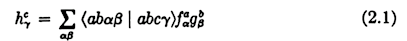

and these other two ones correspond to TSK 2.28 and TSK 2.29:

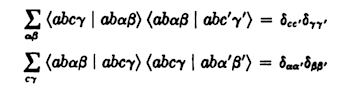

After having presented these equations, Griffith goes on to note that the first is only true when $c \in ab$, and he goes on to define $\delta(a,b,c)$ in order to explicitly take note of this factor.
What is confusing is that he's very specific in saying that *only* the first equation is multiplied by this factor, implying that the second one holds true even if $c \notin ab$.
This is confusing because what I would have thought that this is equivalent to, is to having made all the coupling coefficients 0 for which $c \notin ab$. However, I need to remember that in the second equation there is a sum over $c$, and whereas in my case I am making a restricted sum over the c that belong to ab, Griffith pictures this sum as running through all the irreducible representations of the group. So if the simple zereoing out the ones for $c \notin ab$ is done, then the unrestricted sum that he pictures would turn into the restricted sum that I'm currently doing. But then again, if this were the case then that factor $\delta(a,b,c)$ should have gone into the sum over c,gamma but it didn't. This would seem to imply that the coupling coefficient might NOT be zero for c not in ab: but I think this is nonsense.

About the phase convention, my current assumption as to how the coupling coeffients are related after switching Γ1 and Γ2, is what Griffith calls the usual ligand-field theory assumption. And while doing this he also communicates part of the rationale of picking a specific phase convention as a matter of it simplifying the analysis further down (with relationship to reduced matrix elements).

From his analysis of the consequence of the "reduced matrix elements" (Wigner-Eckart) relationship (eq. 2.3) for the coupling coefficients (for the O group), he reaches the conclusion that switching Γ1 and Γ2 can have (or not) the effect of changing sign. This is understood as a degree of freedom in defining the coefficients themselves. If switching changes no sign, this is called even, and if it does then it is called odd. In doing this a factor equal to the inverse of the square root of the order of the irreducible representation appears, which further motivates the convenience of defining the V coefficients as follows.

$$ V \begin{pmatrix}
a & b & c\\
\alpha & \beta & \gamma
\end{pmatrix} = \lambda(c)^{-1/2} \langle ab\alpha\beta | abc\gamma\rangle $$

The beauty about V coefficients is that they then allow for a very concise way of writing up all the coupling coefficients

In [10]:
irreps = group.irrep_labels
irreps

[A_1, A_2, E, T_1, T_2]

In [11]:
def Vsymb(v_args):
    latex_strings = list(map(sp.latex,v_args))
    return sp.Symbol(r'''V\begin{pmatrix}
    %s & %s & %s\\
    %s & %s & %s
    \end{pmatrix}''' % (*latex_strings[0::2],*latex_strings[1::2]))

In [161]:
V = {}
A1, A2, E, T1, T2 = irreps
A1_components = group.component_labels[A1]
iota1 = A1_components[0]
A2_components = group.component_labels[A2]
iota2 = A2_components[0]
E_components  = group.component_labels[E]
theta, epsilon = E_components
T1_components = group.component_labels[T1]
x1, y1, z1 = T1_components
T2_components = group.component_labels[T2]
x2, y2, z2 = T2_components

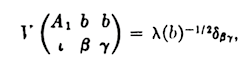

In [162]:
for irrep_1 in irreps:
    for comp_1 in group.component_labels[irrep_1]:
        for comp_2 in group.component_labels[irrep_1]:
            args = (A1,
                    iota1,
                    irrep_1,
                    comp_1,
                    irrep_1,
                    comp_2
                   )
            val = kronecker(comp_1, comp_2)/sp.sqrt(group.irrep_dims[irrep_1])
            V[args] = val

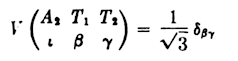

In [163]:
for comp_1 in group.component_labels[T1]:
    for comp_2 in group.component_labels[T2]:
        args = (A2, 
               iota2,
               T1,
               comp_1,
               T2,
               comp_2)
        val = kronecker(comp_1, comp_2)/sp.sqrt(3)
        V[args] = val

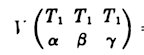

In [164]:
for idx_0, comp_0 in enumerate(group.component_labels[T1]):
    for idx_1, comp_1 in enumerate(group.component_labels[T1]):
        for idx_2, comp_2 in enumerate(group.component_labels[T1]):
            args = (T1,
                   comp_0,
                    T1,
                    comp_1,
                    T1,
                    comp_2)
            val = -sp.LeviCivita(idx_0, idx_1, idx_2)/sp.sqrt(6)
            V[args] = val

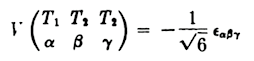

In [165]:
for idx_0, comp_0 in enumerate(group.component_labels[T1]):
    for idx_1, comp_1 in enumerate(group.component_labels[T2]):
        for idx_2, comp_2 in enumerate(group.component_labels[T2]):
            args = (T1,
                   comp_0,
                    T2,
                    comp_1,
                    T2,
                    comp_2)
            val = -sp.LeviCivita(idx_0, idx_1, idx_2)/sp.sqrt(6)
            V[args] = val

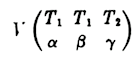

In [166]:
for idx_0, comp_0 in enumerate(group.component_labels[T1]):
    for idx_1, comp_1 in enumerate(group.component_labels[T1]):
        for idx_2, comp_2 in enumerate(group.component_labels[T2]):
            args = (T1,
                   comp_0,
                    T1,
                    comp_1,
                    T2,
                    comp_2)
            val = -sp.LeviCivita(idx_0, idx_1, idx_2)/sp.sqrt(6)
            V[args] = val

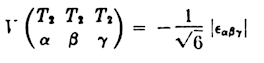

In [167]:
for idx_0, comp_0 in enumerate(group.component_labels[T2]):
    for idx_1, comp_1 in enumerate(group.component_labels[T2]):
        for idx_2, comp_2 in enumerate(group.component_labels[T2]):
            args = (T2,
                    comp_0,
                    T2,
                    comp_1,
                    T2,
                    comp_2)
            val = -abs(sp.LeviCivita(idx_0, idx_1, idx_2))/sp.sqrt(6)
            V[args] = val

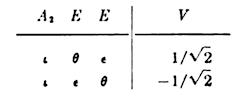

In [168]:
args = [A2,1,E,1,E,1]
extra_args_and_vals = [(iota2, theta, epsilon, 1/sp.sqrt(2)),
                       (iota2, epsilon, theta, -1/sp.sqrt(2))]
for extra in extra_args_and_vals:
    args[1], args[3], args[5] = extra[:3]
    V[tuple(args)] = extra[-1]

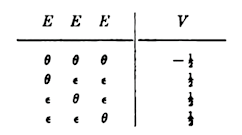

In [169]:
args = [E,1,E,1,E,1]
extra_args_and_vals = [(theta, theta, theta, -1/sp.S(2)),
                       (theta, epsilon, epsilon, 1/sp.S(2)),
                       (epsilon, theta, epsilon, 1/sp.S(2)),
                       (epsilon, epsilon, theta, 1/sp.S(2)),
                       ]
for extra in extra_args_and_vals:
    args[1], args[3], args[5] = extra[:3]
    V[tuple(args)] = extra[-1]


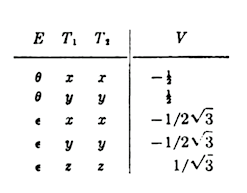

In [170]:
args = [E,1,T1,1,T2,1]
extra_args_and_vals = [(theta, x1, x2, -1/sp.S(2)),
                       (theta, y1, y2, 1/sp.S(2)),
                       (epsilon, x1, x2, -1/sp.S(2)/sp.sqrt(3)),
                       (epsilon, y1, y2, -1/sp.S(2)/sp.sqrt(3)),
                       (epsilon, z1, z2, 1/sp.sqrt(3)),
                       ]
for extra in extra_args_and_vals:
    args[1], args[3], args[5] = extra[:3]
    V[tuple(args)] = extra[-1]

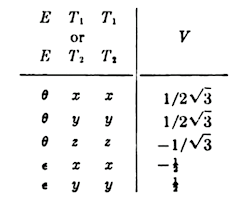

In [171]:
args = [E, 1, T1, 1, T1, 1]
extra_args_and_vals = [(theta, x1, x1, 1/sp.S(2)/sp.sqrt(3)),
                       (theta, y1, y1, 1/sp.S(2)/sp.sqrt(3)),
                       (theta, z1, z1, -1/sp.sqrt(3)),
                       (epsilon, x1, x1, -1/sp.S(2)),
                       (epsilon, y1, y1, 1/sp.S(2)),
                       ]
for extra in extra_args_and_vals:
    args[1], args[3], args[5] = extra[:3]
    V[tuple(args)] = extra[-1]

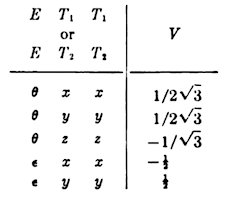

In [172]:
args = [E, 1, T2, 1, T2, 1]
extra_args_and_vals = [(theta, x2, x2, 1/sp.S(2)/sp.sqrt(3)),
                       (theta, y2, y2, 1/sp.S(2)/sp.sqrt(3)),
                       (theta, z2, z2, -1/sp.sqrt(3)),
                       (epsilon, x2, x2, -1/sp.S(2)),
                       (epsilon, y2, y2, 1/sp.S(2)),
                       ]
for extra in extra_args_and_vals:
    args[1], args[3], args[5] = extra[:3]
    V[tuple(args)] = extra[-1]

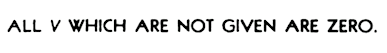

In [234]:
counter = 0
all_args = []
for irrep_0 in irreps:
    for irrep_1 in irreps:
        for irrep_2 in irreps:
            for comp_0 in group.component_labels[irrep_0]:
                for comp_1 in group.component_labels[irrep_1]:
                    for comp_2 in group.component_labels[irrep_2]:
                        counter += 1
                        args = (irrep_0, comp_0,
                                irrep_1, comp_1,
                                irrep_2, comp_2)
                        if args not in V.keys():
                            V[args] = 0
                        all_args.append(args)

In [235]:
pickle.dump(V,open('/Users/juan/Google Drive/Zia Lab/Codebase/qdef/data/Vcoeffs.pkl','wb'))

In [249]:
Vees = V_coefficients()

Loading coefficients...


In [251]:
Vees.calc(args)

0

In [159]:
Vsymb(list(V.keys())[0])

V\begin{pmatrix}
    A_{1} & A_{1} & A_{1}\\
    a_{A_1} & a_{A_1} & a_{A_1}
    \end{pmatrix}

In [99]:
group_label = 'O'
group = CPGs.get_group_by_label(group_label)

In [8]:
irreps = group.irrep_labels

In [9]:
all_cgs = []
for irrep_0 in irreps:
    for irrep_1 in irreps:
        all_cgs.append(group_clebsch_gordan_coeffs(group, irrep_0, irrep_1, rep_rules = True))

In [14]:
def from_component_label_to_tuple(label):
    astr = sp.latex(label)
    astr = astr.replace('{\\langle}','')
    astr = astr.replace('{\\rangle}','')
    bra, ket = astr.split('|')
    comp_0, comp_1 = bra.split(',')
    irrep_0 = re.findall('{(.*)}',comp_0)[0]
    irrep_1 = re.findall('{(.*)}',comp_1)[0]
    irrep_2, comp_2 = ket.split(',')
    return tuple(map(sp.Symbol, [irrep_0, comp_0, irrep_1, comp_1, irrep_2, comp_2]))

In [15]:
Vs = {}
for cgs in all_cgs:
    for cg in cgs:
        for cg_symbol, cg_value in cg.items():
            triple = from_component_label_to_tuple(cg_symbol)
            Vs[tuple(triple)] = cg_value

In [16]:
list(Vs.items())[0]

((A_1, a_{A_1}, A_1, a_{A_1}, A_1, a_{A_1}), -1)

In [17]:
len(Vs)

576

## all other groups

### see where errors are

In [5]:
all_group_labels = CPGs.all_group_labels
grup_ir = {k:CPGs.get_group_by_label(k).irrep_labels for k in CPGs.all_group_labels}

In [114]:
test_matrices = {}
good_counter = 0
bad_counter = 0
for group_label in all_group_labels:
    print(group_label,end='|')
    the_group = CPGs.get_group_by_label(group_label)
    the_irreps = the_group.irrep_labels
    test_mat = [[sp.Symbol(group_label)]+the_irreps]
    for irrep_0 in the_irreps:
        test_row = [irrep_0]
        for irrep_1 in the_irreps:
            try:
                cgs = group_clebsch_gordan_coeffs(the_group,
                                        irrep_0,
                                        irrep_1,
                                        rep_rules=False)[2]
                test_row.append(sp.Symbol(r'\checkmark'))
                good_counter += 1
            except:
                test_row.append(sp.Symbol(r'\times'))
                bad_counter += 1
        test_mat.append(test_row)
    test_matrices[group_label] = sp.Matrix(test_mat)

C_{1}|C_{i}|C_{2}|C_{s}|C_{2h}|D_{2}|C_{2v}|D_{2h}|C_{4}|S_{4}|C_{4h}|D_{4}|C_{4v}|D_{2d}|D_{4h}|C_{3}|S_{6}|D_{3}|C_{3v}|D_{3d}|C_{6}|C_{3h}|C_{6h}|D_{6}|C_{6v}|D_{3h}|D_{6h}|T|T_{h}|O|T_{d}|O_{h}|

In [40]:
grup_opts = {k:CPGs.get_group_by_label(k).irrep_labels for k in CPGs.all_group_labels}

def print_check(group):
    display(test_matrices[group])

def select_group(group):
    irrepW_0.options = grup_opts[group]
    irrepW_1.options = grup_opts[group]  

group_pick = widgets.Dropdown(options=CPGs.all_group_labels, value='O')
init = group_pick.value
# widgets.interactive(select_group, group=group_pick)
j = widgets.interactive(print_check, group=group_pick)
display(j)

interactive(children=(Dropdown(description='group', index=29, options=('C_{1}', 'C_{i}', 'C_{2}', 'C_{s}', 'C_…

In [44]:
import pyperclip

In [51]:
import os

In [ ]:
os.system('')

In [ ]:
def gen_latex_eqn(latex_code):
    

In [84]:
message = r'''\documentclass[convert={density=300,size=1080x800,outext=.png}]{standalone}
\usepackage{amsmath}
\usepackage{amsfonts}
\begin{document}
$\displaystyle
%s
$
\end{document}
''' % str(sp.latex(test_matrices['O']))

In [117]:
def gen_latex(latex_code, fname):
    temp_dir = '/Users/juan/Temp/latex'
    img_dir = '/Users/juan/Temp/latex/img'
    latex_f = os.path.join(temp_dir,'temp'+'.tex')
    latex_png = os.path.join(img_dir,fname+'.png')
    latex_pdf = os.path.join(temp_dir,'temp'+'.pdf')
    latex_code = r'''\documentclass[convert={density=300,size=1080x800,outext=.png}]{standalone}
\usepackage{amsmath}
\usepackage{amsfonts}
\begin{document}
$\displaystyle
%s
$
\end{document}''' % latex_code
    open(latex_f,'w').write(latex_code)
    !pdflatex -output-directory={temp_dir} -interaction=batchmode {latex_f}
    !convert -density 300 "{latex_pdf}" -quality 95 "{latex_png}"
    

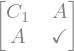

In [118]:
test_matrices[group_label]

In [120]:
for idx, group_label in enumerate(all_group_labels):
    astr = sp.latex(test_matrices[group_label])
    gen_latex(astr, str(idx))

This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2021) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
convert: profile 'icc': 'RGB ': RGB color space not permitted on grayscale PNG `/Users/juan/Temp/latex/img/0.png' @ warning/png.c/MagickPNGWarningHandler/1748.
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2021) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
convert: profile 'icc': 'RGB ': RGB color space not permitted on grayscale PNG `/Users/juan/Temp/latex/img/1.png' @ warning/png.c/MagickPNGWarningHandler/1748.
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2021) (preloaded format=pdflatex)
 restricted \write18 enabled.
entering extended mode
convert: profile 'icc': 'RGB ': RGB color space not permitted on grayscale PNG `/Users/juan/Temp/latex/img/2.png' @ warning/png.c/MagickPNGWarningHandler/1748.
This is pdfTeX, Version 3.141592653-2.6-1.40.22 (TeX Live 2021) (preloaded format=pdf

In [46]:
pyperclip.copy(str(sp.latex(test_matrices['O'])))

### dynamic

In [112]:
grup_opts = {k:CPGs.get_group_by_label(k).irrep_labels for k in CPGs.all_group_labels}

def print_cg(group, irrep_0, irrep_1):
    display(group_clebsch_gordan_coeffs(CPGs.get_group_by_label(group), irrep_0, irrep_1, rep_rules=False)[2])

def select_group(group):
    irrepW_0.options = grup_opts[group]
    irrepW_1.options = grup_opts[group]  

group_pick = widgets.Dropdown(options=CPGs.all_group_labels, value='O')
init = group_pick.value
irrepW_0 = widgets.Dropdown(options=grup_opts[init])
irrepW_1 = widgets.Dropdown(options=grup_opts[init])
widgets.interactive(select_group, group=group_pick)
j = widgets.interactive(print_cg, group=group_pick, irrep_0=irrepW_0, irrep_1=irrepW_1)
display(j)

interactive(children=(Dropdown(description='group', index=29, options=('C_{1}', 'C_{i}', 'C_{2}', 'C_{s}', 'C_…

In [26]:
group = CPGs.get_group_by_label('O')
irrep1, irrep2 = irreps[1], irreps[2]
print(irrep1, irrep2)
CGs = group_clebsch_gordan_coeffs(group, irrep1, irrep2)

A_2 E


## Spaguetti code

In [15]:
group = CPGs.get_group_by_label('O_{h}')
irreps = group.irrep_labels

In [17]:
all_irrep_labels = []
for group_idx, group in CPGs.groups.items():
#     all_irrep_labels.extend(group.irrep_labels)
#     display(sp.Symbol(group.label))
#     display(group.irrep_labels)
    all_irrep_labels.extend(group.irrep_labels)
    group.irrep_dims = {k: list(v.values())[0].shape[0] for k, v in group.irrep_matrices.items()}
# all_irrep_labels = list(set(all_irrep_labels))

In [18]:
def determinator(irrep_label):
    str_label = str(irrep_label)
    options = ['A', 'B', 'Gamma', 'E', 'T']  
    totals = sum(list(map(lambda x: 1 if x in str_label else 0, options)))
    if totals == 1:
        return True
    else:
        return str_label

In [19]:
def get_basis_function_labels(group):
    irrep_dims = group.irrep_dims
    components = {}
    for irrep_label, irrep_dim in irrep_dims.items():
        str_label = str(irrep_label)
        c_labels = []
        if irrep_dim == 1:
            c_labels = [sp.Symbol('a_{%s}' % str_label)]
        elif irrep_dim == 2:
            c_labels = [sp.Symbol('u_{%s}' % str_label), 
                        sp.Symbol('v_{%s}' % str_label)]
        elif irrep_dim == 3:
            c_labels = [sp.Symbol('x_{%s}' % str_label),
                        sp.Symbol('y_{%s}' % str_label),
                        sp.Symbol('z_{%s}' % str_label)]
        assert len(c_labels) != 0
        components[irrep_label] = c_labels
    return components

In [20]:
group = CPGs.get_group_by_label('O')
irreps = group.irrep_labels
irreps

In [22]:
for group_label, group in CPGs.groups.items():
    group.basis_function_labels = get_basis_function_labels(group)

In [21]:
group = CPGs.get_group_by_label('O')
irreps = group.irrep_labels
irep1, irep2 = irreps[3], irreps[3]
# must first find the resulting direct sum decomposition of their product
irep3s = list(group.product_table.odict[(irep1, irep2)].args)
# also need to grab the labels for a set of generators
generators = group.generators
# to understand the results it is also necessary to have
# a good set of labels for the basis functions is neede
# for each irreducible representations
# to make this compatible with the STK notation
# I shall make the following identification
# the ordering will most likely be off
all_labels = [[sp.Symbol("e_1")],
             [sp.Symbol("e_2")],
             [sp.Symbol("u"), sp.Symbol("v")],
             [sp.Symbol(r"\alpha"), sp.Symbol(r"\beta"), sp.Symbol(r"\gamma")],
             [sp.Symbol(r"\xi"), sp.Symbol(r"\eta"), sp.Symbol(r"\zeta")]]
basis_labels = {k: labels for k, labels in zip(irreps, all_labels)}
print("Grabbing the labels for the basis functions ...")
labels_1, labels_2 = basis_labels[irep1], basis_labels[irep2]
print("CG is a ({size},{size}) matrix ...".format(size=len(labels_1)*len(labels_2)))
generators_1 = [group.irrep_matrices[irep1][g] for g in generators]
generators_2 = [group.irrep_matrices[irep2][g] for g in generators]

# then create the list of linear constraints
print("Creating the set of linear constraints ...")
# In (2.31) there are five quantities that determine one constraints
all_eqns = []
for irep3 in irep3s:
    labels_3 = basis_labels[irep3]
    for generator in generators:
        D1, D2, D3 = [group.irrep_matrices[irep][generator] for irep in [irep1,irep2,irep3]]
        γ1s, γ2s, γ3s = [list(range(D.shape[0])) for D in [D1,D2,D3]]
        for γ1, γ2, γ3p in product(γ1s, γ2s, γ3s):
            lhs = []
            for γ1p in γ1s:
                for γ2p in γ2s:
                    symb_args = (labels_1[γ1p],labels_2[γ2p],irep3,labels_3[γ3p])
                    chevron = sp.Symbol(r"\langle%s,%s|%s,%s{\rangle}" % symb_args)     
                    coeff = D1[γ1, γ1p]*D2[γ2,γ2p]
                    if coeff:
                        lhs.append(coeff*chevron)
            lhs = sum(lhs)
            rhs = []
            for γ3 in γ3s:
                symb_args = (labels_1[γ1],labels_2[γ2],irep3,labels_3[γ3])
                chevron = sp.Symbol(r"\langle%s,%s|%s,%s{\rangle}" % symb_args)
                coeff = D3[γ3, γ3p]
                if coeff:
                    rhs.append(coeff*chevron)
            rhs = sum(rhs)
            eqn = rhs-lhs
            if (eqn not in all_eqns) and (-eqn not in all_eqns) and (eqn != 0):
                all_eqns.append(eqn)

# collect all the symbols included in all_eqns
free_symbols = set()
for eqn in all_eqns:
    free_symbols.update(eqn.free_symbols)
free_symbols = list(free_symbols)
print("There are %d different CGs in the linear constraint equations ..." % len(free_symbols))

# convert to matrix of coefficients
coef_matrix = Matrix([[eqn.coeff(cg) for cg in free_symbols] for eqn in all_eqns])
# and simplify using the rref
rref = coef_matrix.rref()[0]
# turn back to symbolic and solve
better_eqns = [r for r in rref*sp.Matrix(free_symbols) if r!=0]
better_sol = sp.solve(better_eqns, free_symbols)
# construct the unitary matrix with all the CGs
print("Building the big bad matrix ...")
U = []
for γ1 in labels_1:
    for γ2 in labels_2:
        row = []
        for irep3 in irep3s:
            labels_3 = basis_labels[irep3]
            for γ3 in labels_3:
                chevron = sp.Symbol(r"\langle%s,%s|%s,%s{\rangle}" % (γ1, γ2, irep3, γ3))
                row.append(chevron)
        U.append(row)
Usymbols = sp.Matrix(U)
# replace with the solution to the linear constraints
U = Usymbols.subs(better_sol)
# build the unitary constraints
print("Bulding the unitarity constraints and assuming U to be orthogonal ...")
unitary_constraints = U*U.T - eye(U.shape[0])
# flatten and pick the nontrivial ones
unitary_set = [f for f in flatten_matrix(unitary_constraints) if f!=0]
# solve
unitary_sol = sp.solve(unitary_set)
print("%d solutions found ..." % len(unitary_sol))
Usols = [U.subs(sol) for sol in unitary_sol]

Grabbing the labels for the basis functions ...
CG is a (9,9) matrix ...
Creating the set of linear constraints ...
There are 81 different CGs in the linear constraint equations ...
Building the big bad matrix ...
Bulding the unitarity constraints and assuming U to be orthogonal ...
16 solutions found ...
